<h1 style="font-size: 36px;">Prediction of Mackey-Glass Time Series</h1>

In this notebook we illustrate how we can test the reservoir for predicting the Mackey- Glass time series, described by the differential equation: 
$$
    \frac{dP(t)}{dt} = \frac{aP(t-\tau)}{1 + P(t-\tau)^n} - bP(t)
$$

where a = 0.2, b = 0.1, n = 10 and $\tau$ = 17

In [1]:
#Import packages
import sys
sys.path.append('..\..\QRC')
sys.path.append('..\..\QRC\Task_engine')
import numpy as np
import matplotlib.pyplot as plt

import importlib
import Task_runner
importlib.reload(Task_runner)
from Task_runner import Task_runner as Tr

<h1 style="font-size: 20px;">Examples</h1>

In [4]:
# Parameters for the Task_runner object
input_func_name = 'Mackey_glass' # Type of input
evolution_rate = 500 #Scaling of the Lindbladian
V = 5 #Mulitplexing value
training_split = 0.8 #Percentage of data used for training
steps = 2510*2 #Number of steps
reservoir_seed = 4810 #Seed for the reservoir

#Set in what range reservoir parameters are initialized
internal_weight_factor_o=10
internal_weight_factor_e=0.1
internal_weight_factor_c=0.2
input_weight_factor=3

# Create the Task_runner object
test_res = Tr(input_func_name,evolution_rate, V = V, steps = steps, training_split = training_split, 
              reservoir_seed = reservoir_seed, 
              internal_weight_factor_o=internal_weight_factor_o, 
              internal_weight_factor_e=internal_weight_factor_e, 
              internal_weight_factor_c=internal_weight_factor_c, 
              input_weight_factor=input_weight_factor)

# Define the tests
test_name = 'Prediction' #Type of test
prediction_steps = [5, 50] #Number of steps ahead to predict

# Run tests
ma_list, nmse_list, predictions_list, target_list = [], [], [], []

for i in range(len(prediction_steps)):
    ma, nmse, predictions, target = test_res.run_test(test_name, prediction_steps[i]) 
    ma_list.append(ma)
    nmse_list.append(nmse)
    predictions_list.append(predictions)
    target_list.append(target)

Time to solve ode:  8.620068073272705
Number of iterations (nfev):  25754
Total time to solve system:  5.575149059295654
Average time to solve system 0.00021647701558187677


Running Ridge-0: 100%|██████████| 1003/1003 [00:00<00:00, 209914.02it/s]


matrix: [[0.0576589  0.05763576]
 [0.05763576 0.05762568]]


Running Ridge-1: 100%|██████████| 1003/1003 [00:00<00:00, 72593.86it/s]

matrix: [[0.05472933 0.05518885]
 [0.05518885 0.05876161]]


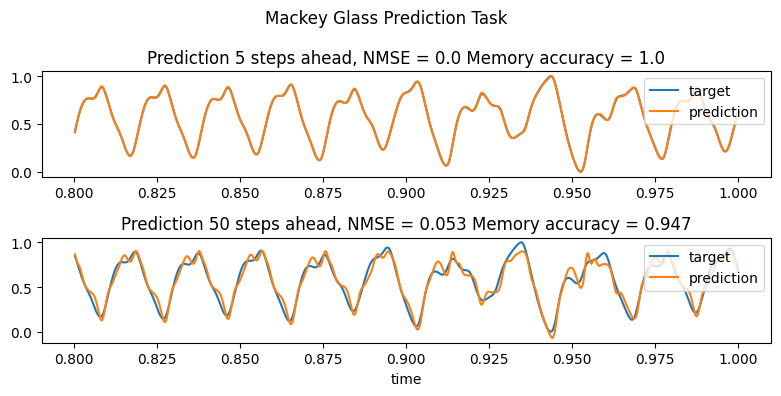

In [7]:
# Plot results
fig, axs = plt.subplots(len(prediction_steps), 1, figsize=(8, 4))
fig.suptitle('Mackey Glass Prediction Task')

for i in range(len(prediction_steps)):
    axs[i].plot(test_res.t_test, target_list[i], label = 'target')
    axs[i].plot(test_res.t_test, predictions_list[i], label = 'prediction')
    axs[i].legend(loc = 'upper right')
    axs[i].set_title(f'Prediction {str(prediction_steps[i])} steps ahead, NMSE = {np.round(nmse_list[i],3)} Memory accuracy = {np.round(ma_list[i],3)}')

axs[-1].set_xlabel('time')
fig.tight_layout()

<h1 style="font-size: 20px;">Performance of Predicting Mackey-Glass Time Series</h1>

In [8]:
test_name = 'Prediction' #Type of test
input_func_name = 'Mackey_glass' # Type of input
prediction_steps = range(1, 100) #Number of steps ahead to predict
nbr_reservoirs = 20 #Number of reservoirs to test
V = 5 #Multiplexing value
steps = 2510*2 #Number of steps
evolution_rate = 300 #Scaling of the Lindbladian

#Set in what range reservoir parameters are initialized
input_weight_factor = 3 
internal_weight_factor_o = 10  
internal_weight_factor_e = 0.1
internal_weight_factor_c = 0.2

reservoir_seeds = np.random.randint(0, 10000, nbr_reservoirs) # Seeds for the reservoirs to use the same reservoirs for all tests

#Run test

ma_list = np.zeros((nbr_reservoirs, len(prediction_steps)))
nmse_list = np.zeros((nbr_reservoirs, len(prediction_steps)))

#Test different reservoirs
for j in range(nbr_reservoirs):
    task_runner = Tr(input_func_name, evolution_rate, V=V, steps=steps, training_split=0.8,
                        reservoir_seed=int(reservoir_seeds[j]), input_weight_factor=input_weight_factor, 
                        internal_weight_factor_o=internal_weight_factor_o, 
                        internal_weight_factor_e=internal_weight_factor_e, 
                        internal_weight_factor_c=internal_weight_factor_c)
    
    # Test predicting different steps ahead
    for i in range(len(prediction_steps)):
        ma, nmse, predictions, test_target = task_runner.run_test(test_name, i)
        ma_list[j, i] = ma
        nmse_list[j, i] = nmse

Time to solve ode:  4.581405878067017
Number of iterations (nfev):  13916
Total time to solve system:  2.90505051612854
Average time to solve system 0.00020875614516589107


Running Ridge-2: 100%|██████████| 1003/1003 [00:00<00:00, 208819.96it/s]


matrix: [[0.05774318 0.05784062]
 [0.05784062 0.05795171]]


Running Ridge-3: 100%|██████████| 1003/1003 [00:00<00:00, 104612.50it/s]


matrix: [[0.05766543 0.0577534 ]
 [0.0577534  0.05785418]]


Running Ridge-4: 100%|██████████| 1003/1003 [00:00<00:00, 46458.24it/s]


matrix: [[0.0576072  0.05768353]
 [0.05768353 0.05777228]]


Running Ridge-5: 100%|██████████| 1003/1003 [00:00<00:00, 70642.24it/s]


matrix: [[0.057572   0.05763279]
 [0.05763279 0.05770697]]


Running Ridge-6: 100%|██████████| 1003/1003 [00:00<00:00, 51807.68it/s]


matrix: [[0.05756143 0.05760095]
 [0.05760095 0.05765831]]


Running Ridge-7: 100%|██████████| 1003/1003 [00:00<00:00, 58849.93it/s]


matrix: [[0.05757356 0.05758455]
 [0.05758455 0.05762568]]


Running Ridge-8: 100%|██████████| 1003/1003 [00:00<00:00, 68336.88it/s]


matrix: [[0.05760174 0.0575762 ]
 [0.0575762  0.05760796]]


Running Ridge-9: 100%|██████████| 1003/1003 [00:00<00:00, 55238.94it/s]

matrix: [[0.0576346  0.05756476]
 [0.05756476 0.05760371]]



Running Ridge-10: 100%|██████████| 1003/1003 [00:00<00:00, 55149.14it/s]


matrix: [[0.05765733 0.05753668]
 [0.05753668 0.05761127]]


Running Ridge-11: 100%|██████████| 1003/1003 [00:00<00:00, 74261.02it/s]


matrix: [[0.05765412 0.05747826]
 [0.05747826 0.05762887]]


Running Ridge-12: 100%|██████████| 1003/1003 [00:00<00:00, 55029.39it/s]


matrix: [[0.05761106 0.05737833]
 [0.05737833 0.05765469]]


Running Ridge-13: 100%|██████████| 1003/1003 [00:00<00:00, 60648.55it/s]


matrix: [[0.05751909 0.0572308 ]
 [0.0572308  0.0576869 ]]


Running Ridge-14: 100%|██████████| 1003/1003 [00:00<00:00, 86332.31it/s]


matrix: [[0.05737598 0.05703636]
 [0.05703636 0.05772372]]


Running Ridge-15: 100%|██████████| 1003/1003 [00:00<00:00, 60244.69it/s]


matrix: [[0.0571872  0.05680306]
 [0.05680306 0.05776347]]


Running Ridge-16: 100%|██████████| 1003/1003 [00:00<00:00, 60836.24it/s]


matrix: [[0.05696534 0.05654555]
 [0.05654555 0.05780462]]


Running Ridge-17: 100%|██████████| 1003/1003 [00:00<00:00, 75990.08it/s]


matrix: [[0.05672835 0.05628313]
 [0.05628313 0.05784586]]


Running Ridge-18: 100%|██████████| 1003/1003 [00:00<00:00, 59986.98it/s]


matrix: [[0.05649686 0.05603714]
 [0.05603714 0.0578861 ]]


Running Ridge-19: 100%|██████████| 1003/1003 [00:00<00:00, 75709.73it/s]


matrix: [[0.05629116 0.05582785]
 [0.05582785 0.05792453]]


Running Ridge-20: 100%|██████████| 1003/1003 [00:00<00:00, 51370.53it/s]


matrix: [[0.05612831 0.05567177]
 [0.05567177 0.0579606 ]]


Running Ridge-21: 100%|██████████| 1003/1003 [00:00<00:00, 99127.85it/s]


matrix: [[0.05601983 0.05557939]
 [0.05557939 0.05799406]]


Running Ridge-22: 100%|██████████| 1003/1003 [00:00<00:00, 137125.95it/s]


matrix: [[0.05597028 0.05555401]
 [0.05555401 0.05802494]]


Running Ridge-23: 100%|██████████| 1003/1003 [00:00<00:00, 67359.77it/s]


matrix: [[0.05597701 0.05559161]
 [0.05559161 0.05805351]]


Running Ridge-24: 100%|██████████| 1003/1003 [00:00<00:00, 76661.69it/s]


matrix: [[0.05603087 0.05568179]
 [0.05568179 0.05808028]]


Running Ridge-25: 100%|██████████| 1003/1003 [00:00<00:00, 73274.12it/s]


matrix: [[0.0561179  0.05580959]
 [0.05580959 0.05810596]]


Running Ridge-26: 100%|██████████| 1003/1003 [00:00<00:00, 89093.10it/s]


matrix: [[0.05622161 0.05595786]
 [0.05595786 0.05813144]]


Running Ridge-27: 100%|██████████| 1003/1003 [00:00<00:00, 71454.55it/s]


matrix: [[0.05632539 0.05610974]
 [0.05610974 0.05815773]]


Running Ridge-28: 100%|██████████| 1003/1003 [00:00<00:00, 41892.08it/s]


matrix: [[0.05641477 0.05625084]
 [0.05625084 0.05818594]]


Running Ridge-29: 100%|██████████| 1003/1003 [00:00<00:00, 64740.26it/s]


matrix: [[0.05647909 0.05637078]
 [0.05637078 0.0582172 ]]


Running Ridge-30: 100%|██████████| 1003/1003 [00:00<00:00, 73340.54it/s]


matrix: [[0.05651233 0.05646386]
 [0.05646386 0.05825266]]


Running Ridge-31: 100%|██████████| 1003/1003 [00:00<00:00, 55957.53it/s]


matrix: [[0.05651306 0.05652876]
 [0.05652876 0.05829337]]


Running Ridge-32: 100%|██████████| 1003/1003 [00:00<00:00, 51789.18it/s]


matrix: [[0.0564836  0.05656764]
 [0.05656764 0.05834027]]


Running Ridge-33: 100%|██████████| 1003/1003 [00:00<00:00, 42091.18it/s]


matrix: [[0.05642866 0.0565847 ]
 [0.0565847  0.05839405]]


Running Ridge-34: 100%|██████████| 1003/1003 [00:00<00:00, 78617.24it/s]


matrix: [[0.05635389 0.05658476]
 [0.05658476 0.05845503]]


Running Ridge-35: 100%|██████████| 1003/1003 [00:00<00:00, 66892.78it/s]


matrix: [[0.05626464 0.05657211]
 [0.05657211 0.05852309]]


Running Ridge-36: 100%|██████████| 1003/1003 [00:00<00:00, 68906.62it/s]

matrix: [[0.05616518 0.05654989]
 [0.05654989 0.05859749]]



Running Ridge-37: 100%|██████████| 1003/1003 [00:00<00:00, 67194.08it/s]


matrix: [[0.05605856 0.05651988]
 [0.05651988 0.05867678]]


Running Ridge-38: 100%|██████████| 1003/1003 [00:00<00:00, 70015.59it/s]


matrix: [[0.05594675 0.0564828 ]
 [0.0564828  0.05875875]]


Running Ridge-39: 100%|██████████| 1003/1003 [00:00<00:00, 60914.64it/s]


matrix: [[0.05583116 0.05643866]
 [0.05643866 0.05884044]]


Running Ridge-40: 100%|██████████| 1003/1003 [00:00<00:00, 43374.44it/s]


matrix: [[0.05571291 0.05638706]
 [0.05638706 0.05891826]]


Running Ridge-41: 100%|██████████| 1003/1003 [00:00<00:00, 60266.27it/s]


matrix: [[0.0555928  0.05632726]
 [0.05632726 0.05898828]]


Running Ridge-42: 100%|██████████| 1003/1003 [00:00<00:00, 71473.98it/s]


matrix: [[0.05547097 0.05625798]
 [0.05625798 0.05904657]]


Running Ridge-43: 100%|██████████| 1003/1003 [00:00<00:00, 60546.43it/s]


matrix: [[0.05534617 0.05617696]
 [0.05617696 0.05908958]]


Running Ridge-44: 100%|██████████| 1003/1003 [00:00<00:00, 66170.99it/s]


matrix: [[0.05521492 0.05608053]
 [0.05608053 0.05911466]]


Running Ridge-45: 100%|██████████| 1003/1003 [00:00<00:00, 56683.60it/s]


matrix: [[0.05507079 0.05596308]
 [0.05596308 0.05912033]]


Running Ridge-46: 100%|██████████| 1003/1003 [00:00<00:00, 58165.62it/s]


matrix: [[0.05490411 0.05581686]
 [0.05581686 0.05910657]]


Running Ridge-47: 100%|██████████| 1003/1003 [00:00<00:00, 87470.36it/s]


matrix: [[0.05470213 0.0556319 ]
 [0.0556319  0.05907479]]


Running Ridge-48: 100%|██████████| 1003/1003 [00:00<00:00, 124005.51it/s]


matrix: [[0.05444983 0.05539639]
 [0.05539639 0.05902766]]


Running Ridge-49: 100%|██████████| 1003/1003 [00:00<00:00, 105512.45it/s]


matrix: [[0.05413125 0.05509747]
 [0.05509747 0.05896876]]


Running Ridge-50: 100%|██████████| 1003/1003 [00:00<00:00, 123630.15it/s]


matrix: [[0.05373125 0.0547225 ]
 [0.0547225  0.05890212]]


Running Ridge-51: 100%|██████████| 1003/1003 [00:00<00:00, 71324.93it/s]

matrix: [[0.05323748 0.05426074]
 [0.05426074 0.05883181]]



Running Ridge-52: 100%|██████████| 1003/1003 [00:00<00:00, 58101.36it/s]


matrix: [[0.05264224 0.05370519]
 [0.05370519 0.05876161]]


Running Ridge-53: 100%|██████████| 1003/1003 [00:00<00:00, 59201.90it/s]


matrix: [[0.05194409 0.05305434]
 [0.05305434 0.05869476]]


Running Ridge-54: 100%|██████████| 1003/1003 [00:00<00:00, 61723.48it/s]


matrix: [[0.0511488  0.05231345]
 [0.05231345 0.05863386]]


Running Ridge-55: 100%|██████████| 1003/1003 [00:00<00:00, 42532.90it/s]


matrix: [[0.05026972 0.05149516]
 [0.05149516 0.05858085]]


Running Ridge-56: 100%|██████████| 1003/1003 [00:00<00:00, 498978.40it/s]


matrix: [[0.04932734 0.05061915]
 [0.05061915 0.05853703]]


Running Ridge-57: 100%|██████████| 1003/1003 [00:00<00:00, 86682.74it/s]


matrix: [[0.04834812 0.04971094]
 [0.04971094 0.05850314]]


Running Ridge-58: 100%|██████████| 1003/1003 [00:00<00:00, 664490.11it/s]


matrix: [[0.04736273 0.04880002]
 [0.04880002 0.05847949]]


Running Ridge-59: 100%|██████████| 1003/1003 [00:00<00:00, 105411.99it/s]


matrix: [[0.04640387 0.0479174 ]
 [0.0479174  0.05846603]]


Running Ridge-60: 100%|██████████| 1003/1003 [00:00<00:00, 17460.67it/s]


matrix: [[0.04550397 0.04709322]
 [0.04709322 0.05846249]]


Running Ridge-61: 100%|██████████| 1003/1003 [00:00<00:00, 78900.33it/s]


matrix: [[0.0446929  0.04635439]
 [0.04635439 0.05846846]]


Running Ridge-62: 100%|██████████| 1003/1003 [00:00<00:00, 62021.95it/s]


matrix: [[0.04399615 0.04572288]
 [0.04572288 0.05848349]]


Running Ridge-63: 100%|██████████| 1003/1003 [00:00<00:00, 51342.32it/s]


matrix: [[0.04343343 0.04521456]
 [0.04521456 0.05850717]]


Running Ridge-64: 100%|██████████| 1003/1003 [00:00<00:00, 70832.55it/s]


matrix: [[0.04301794 0.04483884]
 [0.04483884 0.05853919]]


Running Ridge-65: 100%|██████████| 1003/1003 [00:00<00:00, 55659.17it/s]


matrix: [[0.0427562  0.04459881]
 [0.04459881 0.05857937]]


Running Ridge-66: 100%|██████████| 1003/1003 [00:00<00:00, 71970.42it/s]


matrix: [[0.0426483  0.04449192]
 [0.04449192 0.05862772]]


Running Ridge-67: 100%|██████████| 1003/1003 [00:00<00:00, 51672.77it/s]


matrix: [[0.04268846 0.04451072]
 [0.04451072 0.0586844 ]]


Running Ridge-68: 100%|██████████| 1003/1003 [00:00<00:00, 179199.48it/s]


matrix: [[0.04286567 0.04464374]
 [0.04464374 0.05874973]]


Running Ridge-69: 100%|██████████| 1003/1003 [00:00<00:00, 17855.37it/s]


matrix: [[0.0431642  0.04487608]
 [0.04487608 0.05882415]]


Running Ridge-70: 100%|██████████| 1003/1003 [00:00<00:00, 57467.99it/s]

matrix: [[0.04356402 0.04518984]
 [0.04518984 0.05890812]]



Running Ridge-71: 100%|██████████| 1003/1003 [00:00<00:00, 48030.40it/s]


matrix: [[0.04404101 0.04556426]
 [0.04556426 0.05900209]]


Running Ridge-72: 100%|██████████| 1003/1003 [00:00<00:00, 55317.38it/s]


matrix: [[0.04456719 0.045976  ]
 [0.045976   0.05910637]]


Running Ridge-73: 100%|██████████| 1003/1003 [00:00<00:00, 85613.72it/s]


matrix: [[0.04511112 0.04639935]
 [0.04639935 0.0592211 ]]


Running Ridge-74: 100%|██████████| 1003/1003 [00:00<00:00, 58143.11it/s]


matrix: [[0.04563879 0.04680701]
 [0.04680701 0.05934612]]


Running Ridge-75: 100%|██████████| 1003/1003 [00:00<00:00, 48417.35it/s]


matrix: [[0.0461151  0.04717131]
 [0.04717131 0.05948094]]


Running Ridge-76: 100%|██████████| 1003/1003 [00:00<00:00, 197617.76it/s]

matrix: [[0.04650607 0.04746592]
 [0.04746592 0.05962468]]



Running Ridge-77: 100%|██████████| 1003/1003 [00:00<00:00, 63499.22it/s]


matrix: [[0.04678157 0.0476681 ]
 [0.0476681  0.05977598]]


Running Ridge-78: 100%|██████████| 1003/1003 [00:00<00:00, 91101.54it/s]


matrix: [[0.04691828 0.04776091]
 [0.04776091 0.05993308]]


Running Ridge-79: 100%|██████████| 1003/1003 [00:00<00:00, 48334.47it/s]


matrix: [[0.04690236 0.04773528]
 [0.04773528 0.06009371]]


Running Ridge-80: 100%|██████████| 1003/1003 [00:00<00:00, 106798.18it/s]


matrix: [[0.04673143 0.04759129]
 [0.04759129 0.06025516]]


Running Ridge-81: 100%|██████████| 1003/1003 [00:00<00:00, 79393.20it/s]


matrix: [[0.04641514 0.04733844]
 [0.04733844 0.06041427]]


Running Ridge-82: 100%|██████████| 1003/1003 [00:00<00:00, 247799.19it/s]


matrix: [[0.0459744  0.04699471]
 [0.04699471 0.06056749]]


Running Ridge-83: 100%|██████████| 1003/1003 [00:00<00:00, 51202.97it/s]

matrix: [[0.04543905 0.04658453]
 [0.04658453 0.06071091]]



Running Ridge-84: 100%|██████████| 1003/1003 [00:00<00:00, 65196.77it/s]


matrix: [[0.0448444  0.04613577]
 [0.04613577 0.06084037]]


Running Ridge-85: 100%|██████████| 1003/1003 [00:00<00:00, 60040.92it/s]

matrix: [[0.04422714 0.04567647]
 [0.04567647 0.06095169]]



Running Ridge-86: 100%|██████████| 1003/1003 [00:00<00:00, 117767.40it/s]


matrix: [[0.04362127 0.04523156]
 [0.04523156 0.06104088]]


Running Ridge-87: 100%|██████████| 1003/1003 [00:00<00:00, 82122.45it/s]


matrix: [[0.04305458 0.0448203 ]
 [0.0448203  0.06110457]]


Running Ridge-88: 100%|██████████| 1003/1003 [00:00<00:00, 55070.45it/s]

matrix: [[0.04254636 0.0444546 ]
 [0.0444546  0.06114037]]



Running Ridge-89: 100%|██████████| 1003/1003 [00:00<00:00, 110012.73it/s]


matrix: [[0.04210626 0.04413842]
 [0.04413842 0.06114727]]


Running Ridge-90: 100%|██████████| 1003/1003 [00:00<00:00, 88944.29it/s]


matrix: [[0.04173464 0.04386835]
 [0.04386835 0.06112586]]


Running Ridge-91: 100%|██████████| 1003/1003 [00:00<00:00, 63529.91it/s]


matrix: [[0.04142398 0.04363497]
 [0.04363497 0.0610784 ]]


Running Ridge-92: 100%|██████████| 1003/1003 [00:00<00:00, 55937.44it/s]


matrix: [[0.04116109 0.04342491]
 [0.04342491 0.06100865]]


Running Ridge-93: 100%|██████████| 1003/1003 [00:00<00:00, 53712.71it/s]


matrix: [[0.04092973 0.04322313]
 [0.04322313 0.06092157]]


Running Ridge-94: 100%|██████████| 1003/1003 [00:00<00:00, 107332.23it/s]


matrix: [[0.04071328 0.04301526]
 [0.04301526 0.0608228 ]]


Running Ridge-95: 100%|██████████| 1003/1003 [00:00<00:00, 55178.08it/s]

matrix: [[0.04049693 0.04278958]
 [0.04278958 0.0607182 ]]



Running Ridge-96: 100%|██████████| 1003/1003 [00:00<00:00, 57284.88it/s]


matrix: [[0.04026942 0.0425384 ]
 [0.0425384  0.06061339]]


Running Ridge-97: 100%|██████████| 1003/1003 [00:00<00:00, 81352.24it/s]

matrix: [[0.04002393 0.0422589 ]
 [0.0422589  0.06051328]]



Running Ridge-98: 100%|██████████| 1003/1003 [00:00<00:00, 60016.08it/s]


matrix: [[0.03975832 0.04195303]
 [0.04195303 0.06042188]]


Running Ridge-99: 100%|██████████| 1003/1003 [00:00<00:00, 56901.34it/s]


matrix: [[0.0394746  0.04162678]
 [0.04162678 0.06034206]]


Running Ridge-100: 100%|██████████| 1003/1003 [00:00<00:00, 82254.12it/s]


matrix: [[0.03917797 0.04128889]
 [0.04128889 0.06027558]]
Time to solve ode:  5.721404552459717
Number of iterations (nfev):  16112
Total time to solve system:  3.821120023727417
Average time to solve system 0.00023715988230681585


Running Ridge-101: 100%|██████████| 1003/1003 [00:00<00:00, 65959.34it/s]


matrix: [[0.05793689 0.05794381]
 [0.05794381 0.05795171]]


Running Ridge-102: 100%|██████████| 1003/1003 [00:00<00:00, 66964.12it/s]


matrix: [[0.05783809 0.05784562]
 [0.05784562 0.05785418]]


Running Ridge-103: 100%|██████████| 1003/1003 [00:00<00:00, 103835.29it/s]


matrix: [[0.05775891 0.05776494]
 [0.05776494 0.05777228]]


Running Ridge-104: 100%|██████████| 1003/1003 [00:00<00:00, 49338.39it/s]


matrix: [[0.05769951 0.05770189]
 [0.05770189 0.05770697]]


Running Ridge-105: 100%|██████████| 1003/1003 [00:00<00:00, 81342.80it/s]

matrix: [[0.05765556 0.05765319]
 [0.05765319 0.05765831]]



Running Ridge-106: 100%|██████████| 1003/1003 [00:00<00:00, 78455.96it/s]


matrix: [[0.05761794 0.05761184]
 [0.05761184 0.05762568]]


Running Ridge-107: 100%|██████████| 1003/1003 [00:00<00:00, 84198.36it/s]


matrix: [[0.0575736  0.05756768]
 [0.05756768 0.05760796]]


Running Ridge-108: 100%|██████████| 1003/1003 [00:00<00:00, 77460.63it/s]


matrix: [[0.05750774 0.05750904]
 [0.05750904 0.05760371]]


Running Ridge-109: 100%|██████████| 1003/1003 [00:00<00:00, 97111.89it/s]

matrix: [[0.05740681 0.0574252 ]
 [0.0574252  0.05761127]]



Running Ridge-110: 100%|██████████| 1003/1003 [00:00<00:00, 51665.16it/s]


matrix: [[0.05726177 0.05730911]
 [0.05730911 0.05762887]]


Running Ridge-111: 100%|██████████| 1003/1003 [00:00<00:00, 67232.74it/s]

matrix: [[0.05707055 0.05715947]
 [0.05715947 0.05765469]]



Running Ridge-112: 100%|██████████| 1003/1003 [00:00<00:00, 73968.54it/s]


matrix: [[0.05683917 0.05698162]
 [0.05698162 0.0576869 ]]


Running Ridge-113: 100%|██████████| 1003/1003 [00:00<00:00, 81928.93it/s]


matrix: [[0.05658101 0.0567869 ]
 [0.0567869  0.05772372]]


Running Ridge-114: 100%|██████████| 1003/1003 [00:00<00:00, 102151.06it/s]


matrix: [[0.05631446 0.05659051]
 [0.05659051 0.05776347]]


Running Ridge-115: 100%|██████████| 1003/1003 [00:00<00:00, 46265.62it/s]

matrix: [[0.05605954 0.05640856]
 [0.05640856 0.05780462]]



Running Ridge-116: 100%|██████████| 1003/1003 [00:00<00:00, 69383.94it/s]


matrix: [[0.05583426 0.05625489]
 [0.05625489 0.05784586]]


Running Ridge-117: 100%|██████████| 1003/1003 [00:00<00:00, 67616.36it/s]

matrix: [[0.05565159 0.05613854]
 [0.05613854 0.0578861 ]]



Running Ridge-118: 100%|██████████| 1003/1003 [00:00<00:00, 73135.27it/s]


matrix: [[0.05551762 0.05606243]
 [0.05606243 0.05792453]]


Running Ridge-119: 100%|██████████| 1003/1003 [00:00<00:00, 69511.19it/s]

matrix: [[0.05543123 0.05602333]
 [0.05602333 0.0579606 ]]



Running Ridge-120: 100%|██████████| 1003/1003 [00:00<00:00, 80284.10it/s]


matrix: [[0.05538516 0.05601319]
 [0.05601319 0.05799406]]


Running Ridge-121: 100%|██████████| 1003/1003 [00:00<00:00, 74652.40it/s]


matrix: [[0.05536817 0.05602127]
 [0.05602127 0.05802494]]


Running Ridge-122: 100%|██████████| 1003/1003 [00:00<00:00, 71312.84it/s]

matrix: [[0.05536771 0.05603664]
 [0.05603664 0.05805351]]



Running Ridge-123: 100%|██████████| 1003/1003 [00:00<00:00, 65597.31it/s]


matrix: [[0.05537243 0.05605034]
 [0.05605034 0.05808028]]


Running Ridge-124: 100%|██████████| 1003/1003 [00:00<00:00, 93727.99it/s]

matrix: [[0.05537416 0.05605695]
 [0.05605695 0.05810596]]



Running Ridge-125: 100%|██████████| 1003/1003 [00:00<00:00, 52039.03it/s]


matrix: [[0.05536901 0.05605512]
 [0.05605512 0.05813144]]


Running Ridge-126: 100%|██████████| 1003/1003 [00:00<00:00, 90278.48it/s]

matrix: [[0.05535737 0.0560473 ]
 [0.0560473  0.05815773]]



Running Ridge-127: 100%|██████████| 1003/1003 [00:00<00:00, 66739.96it/s]


matrix: [[0.05534314 0.05603865]
 [0.05603865 0.05818594]]


Running Ridge-128: 100%|██████████| 1003/1003 [00:00<00:00, 76021.67it/s]


matrix: [[0.05533226 0.0560356 ]
 [0.0560356  0.0582172 ]]


Running Ridge-129: 100%|██████████| 1003/1003 [00:00<00:00, 52464.11it/s]


matrix: [[0.05533106 0.05604433]
 [0.05604433 0.05825266]]


Running Ridge-130: 100%|██████████| 1003/1003 [00:00<00:00, 41534.73it/s]


matrix: [[0.05534464 0.05606945]
 [0.05606945 0.05829337]]


Running Ridge-131: 100%|██████████| 1003/1003 [00:00<00:00, 79898.33it/s]


matrix: [[0.05537576 0.05611321]
 [0.05611321 0.05834027]]


Running Ridge-132: 100%|██████████| 1003/1003 [00:00<00:00, 77662.26it/s]

matrix: [[0.05542429 0.05617517]
 [0.05617517 0.05839405]]



Running Ridge-133: 100%|██████████| 1003/1003 [00:00<00:00, 73938.64it/s]


matrix: [[0.05548734 0.05625253]
 [0.05625253 0.05845503]]


Running Ridge-134: 100%|██████████| 1003/1003 [00:00<00:00, 69445.79it/s]


matrix: [[0.05556007 0.05634072]
 [0.05634072 0.05852309]]


Running Ridge-135: 100%|██████████| 1003/1003 [00:00<00:00, 67053.78it/s]

matrix: [[0.0556367  0.05643436]
 [0.05643436 0.05859749]]



Running Ridge-136: 100%|██████████| 1003/1003 [00:00<00:00, 84358.76it/s]


matrix: [[0.05571172 0.05652812]
 [0.05652812 0.05867678]]


Running Ridge-137: 100%|██████████| 1003/1003 [00:00<00:00, 61119.96it/s]

matrix: [[0.05578076 0.05661736]
 [0.05661736 0.05875875]]



Running Ridge-138: 100%|██████████| 1003/1003 [00:00<00:00, 84920.71it/s]


matrix: [[0.05584094 0.05669837]
 [0.05669837 0.05884044]]


Running Ridge-139: 100%|██████████| 1003/1003 [00:00<00:00, 42902.90it/s]


matrix: [[0.05589077 0.05676829]
 [0.05676829 0.05891826]]


Running Ridge-140: 100%|██████████| 1003/1003 [00:00<00:00, 86738.15it/s]


matrix: [[0.05592958 0.05682465]
 [0.05682465 0.05898828]]


Running Ridge-141: 100%|██████████| 1003/1003 [00:00<00:00, 70797.98it/s]


matrix: [[0.05595666 0.0568649 ]
 [0.0568649  0.05904657]]


Running Ridge-142: 100%|██████████| 1003/1003 [00:00<00:00, 85716.64it/s]

matrix: [[0.05597041 0.05688581]
 [0.05688581 0.05908958]]



Running Ridge-143: 100%|██████████| 1003/1003 [00:00<00:00, 56752.42it/s]


matrix: [[0.05596745 0.056883  ]
 [0.056883   0.05911466]]


Running Ridge-144: 100%|██████████| 1003/1003 [00:00<00:00, 107529.76it/s]


matrix: [[0.055942   0.0568505 ]
 [0.0568505  0.05912033]]


Running Ridge-145: 100%|██████████| 1003/1003 [00:00<00:00, 77698.12it/s]

matrix: [[0.05588537 0.05678028]
 [0.05678028 0.05910657]]



Running Ridge-146: 100%|██████████| 1003/1003 [00:00<00:00, 76334.80it/s]


matrix: [[0.05578579 0.05666199]
 [0.05666199 0.05907479]]


Running Ridge-147: 100%|██████████| 1003/1003 [00:00<00:00, 65591.18it/s]


matrix: [[0.05562858 0.0564829 ]
 [0.0564829  0.05902766]]


Running Ridge-148: 100%|██████████| 1003/1003 [00:00<00:00, 72076.46it/s]


matrix: [[0.05539688 0.05622822]
 [0.05622822 0.05896876]]


Running Ridge-149: 100%|██████████| 1003/1003 [00:00<00:00, 77576.33it/s]


matrix: [[0.05507274 0.05588208]
 [0.05588208 0.05890212]]


Running Ridge-150: 100%|██████████| 1003/1003 [00:00<00:00, 77070.38it/s]


matrix: [[0.05463882 0.05542902]
 [0.05542902 0.05883181]]


Running Ridge-151: 100%|██████████| 1003/1003 [00:00<00:00, 77457.78it/s]


matrix: [[0.05408026 0.0548559 ]
 [0.0548559  0.05876161]]


Running Ridge-152: 100%|██████████| 1003/1003 [00:00<00:00, 64625.89it/s]


matrix: [[0.05338671 0.05415407]
 [0.05415407 0.05869476]]


Running Ridge-153: 100%|██████████| 1003/1003 [00:00<00:00, 78229.82it/s]


matrix: [[0.05255414 0.0533213 ]
 [0.0533213  0.05863386]]


Running Ridge-154: 100%|██████████| 1003/1003 [00:00<00:00, 63206.33it/s]


matrix: [[0.05158625 0.05236323]
 [0.05236323 0.05858085]]


Running Ridge-155: 100%|██████████| 1003/1003 [00:00<00:00, 81520.92it/s]


matrix: [[0.05049507 0.05129395]
 [0.05129395 0.05853703]]


Running Ridge-156: 100%|██████████| 1003/1003 [00:00<00:00, 58229.23it/s]

matrix: [[0.04930066 0.05013546]
 [0.05013546 0.05850314]]



Running Ridge-157: 100%|██████████| 1003/1003 [00:00<00:00, 86468.94it/s]


matrix: [[0.04802983 0.04891613]
 [0.04891613 0.05847949]]


Running Ridge-158: 100%|██████████| 1003/1003 [00:00<00:00, 107048.19it/s]


matrix: [[0.04671388 0.04766808]
 [0.04766808 0.05846603]]


Running Ridge-159: 100%|██████████| 1003/1003 [00:00<00:00, 58943.10it/s]


matrix: [[0.04538581 0.04642404]
 [0.04642404 0.05846249]]


Running Ridge-160: 100%|██████████| 1003/1003 [00:00<00:00, 75683.85it/s]


matrix: [[0.04407726 0.04521417]
 [0.04521417 0.05846846]]


Running Ridge-161: 100%|██████████| 1003/1003 [00:00<00:00, 76822.68it/s]


matrix: [[0.04281577 0.04406326]
 [0.04406326 0.05848349]]


Running Ridge-162: 100%|██████████| 1003/1003 [00:00<00:00, 85233.85it/s]


matrix: [[0.04162281 0.042989  ]
 [0.042989   0.05850717]]


Running Ridge-163: 100%|██████████| 1003/1003 [00:00<00:00, 80499.18it/s]


matrix: [[0.04051282 0.0420014 ]
 [0.0420014  0.05853919]]


Running Ridge-164: 100%|██████████| 1003/1003 [00:00<00:00, 71410.89it/s]

matrix: [[0.0394935  0.04110359]
 [0.04110359 0.05857937]]



Running Ridge-165: 100%|██████████| 1003/1003 [00:00<00:00, 57437.39it/s]


matrix: [[0.03856706 0.0402936 ]
 [0.0402936  0.05862772]]


Running Ridge-166: 100%|██████████| 1003/1003 [00:00<00:00, 71913.83it/s]

matrix: [[0.03773212 0.03956678]
 [0.03956678 0.0586844 ]]



Running Ridge-167: 100%|██████████| 1003/1003 [00:00<00:00, 83932.94it/s]


matrix: [[0.03698584 0.03891822]
 [0.03891822 0.05874973]]


Running Ridge-168: 100%|██████████| 1003/1003 [00:00<00:00, 59608.74it/s]

matrix: [[0.0363256  0.03834464]
 [0.03834464 0.05882415]]



Running Ridge-169: 100%|██████████| 1003/1003 [00:00<00:00, 90164.32it/s]


matrix: [[0.03575013 0.03784535]
 [0.03784535 0.05890812]]


Running Ridge-170: 100%|██████████| 1003/1003 [00:00<00:00, 73816.69it/s]

matrix: [[0.03525956 0.0374222 ]
 [0.0374222  0.05900209]]



Running Ridge-171: 100%|██████████| 1003/1003 [00:00<00:00, 51484.95it/s]


matrix: [[0.03485488 0.03707863]
 [0.03707863 0.05910637]]


Running Ridge-172: 100%|██████████| 1003/1003 [00:00<00:00, 67846.45it/s]


matrix: [[0.03453677 0.03681815]
 [0.03681815 0.0592211 ]]


Running Ridge-173: 100%|██████████| 1003/1003 [00:00<00:00, 59997.25it/s]


matrix: [[0.03430431 0.03664266]
 [0.03664266 0.05934612]]


Running Ridge-174: 100%|██████████| 1003/1003 [00:00<00:00, 64350.09it/s]


matrix: [[0.03415399 0.03655107]
 [0.03655107 0.05948094]]


Running Ridge-175: 100%|██████████| 1003/1003 [00:00<00:00, 76260.07it/s]

matrix: [[0.03407924 0.03653855]
 [0.03653855 0.05962468]]



Running Ridge-176: 100%|██████████| 1003/1003 [00:00<00:00, 80170.88it/s]


matrix: [[0.03407058 0.03659645]
 [0.03659645 0.05977598]]


Running Ridge-177: 100%|██████████| 1003/1003 [00:00<00:00, 93039.78it/s]

matrix: [[0.03411642 0.036713  ]
 [0.036713   0.05993308]]



Running Ridge-178: 100%|██████████| 1003/1003 [00:00<00:00, 76456.88it/s]


matrix: [[0.03420425 0.03687455]
 [0.03687455 0.06009371]]


Running Ridge-179: 100%|██████████| 1003/1003 [00:00<00:00, 78321.58it/s]


matrix: [[0.03432194 0.03706695]
 [0.03706695 0.06025516]]


Running Ridge-180: 100%|██████████| 1003/1003 [00:00<00:00, 69596.29it/s]


matrix: [[0.0344588  0.03727687]
 [0.03727687 0.06041427]]


Running Ridge-181: 100%|██████████| 1003/1003 [00:00<00:00, 86647.04it/s]


matrix: [[0.03460608 0.03749251]
 [0.03749251 0.06056749]]


Running Ridge-182: 100%|██████████| 1003/1003 [00:00<00:00, 70093.75it/s]

matrix: [[0.03475691 0.03770392]
 [0.03770392 0.06071091]]



Running Ridge-183: 100%|██████████| 1003/1003 [00:00<00:00, 73478.89it/s]


matrix: [[0.03490567 0.03790262]
 [0.03790262 0.06084037]]


Running Ridge-184: 100%|██████████| 1003/1003 [00:00<00:00, 74188.99it/s]


matrix: [[0.03504709 0.03808102]
 [0.03808102 0.06095169]]


Running Ridge-185: 100%|██████████| 1003/1003 [00:00<00:00, 66957.73it/s]


matrix: [[0.03517546 0.03823181]
 [0.03823181 0.06104088]]


Running Ridge-186: 100%|██████████| 1003/1003 [00:00<00:00, 69512.34it/s]


matrix: [[0.0352841  0.03834775]
 [0.03834775 0.06110457]]


Running Ridge-187: 100%|██████████| 1003/1003 [00:00<00:00, 53420.79it/s]


matrix: [[0.03536551 0.03842177]
 [0.03842177 0.06114037]]


Running Ridge-188: 100%|██████████| 1003/1003 [00:00<00:00, 75113.59it/s]


matrix: [[0.035412   0.03844769]
 [0.03844769 0.06114727]]


Running Ridge-189: 100%|██████████| 1003/1003 [00:00<00:00, 69297.08it/s]


matrix: [[0.0354168  0.03842099]
 [0.03842099 0.06112586]]


Running Ridge-190: 100%|██████████| 1003/1003 [00:00<00:00, 72900.81it/s]

matrix: [[0.03537526 0.03833978]
 [0.03833978 0.0610784 ]]



Running Ridge-191: 100%|██████████| 1003/1003 [00:00<00:00, 73359.73it/s]


matrix: [[0.03528595 0.0382054 ]
 [0.0382054  0.06100865]]


Running Ridge-192: 100%|██████████| 1003/1003 [00:00<00:00, 67491.61it/s]


matrix: [[0.03515128 0.03802266]
 [0.03802266 0.06092157]]


Running Ridge-193: 100%|██████████| 1003/1003 [00:00<00:00, 188278.15it/s]


matrix: [[0.03497761 0.03779954]
 [0.03779954 0.0608228 ]]


Running Ridge-194: 100%|██████████| 1003/1003 [00:00<00:00, 101214.68it/s]


matrix: [[0.03477471 0.03754648]
 [0.03754648 0.0607182 ]]


Running Ridge-195: 100%|██████████| 1003/1003 [00:00<00:00, 57185.98it/s]

matrix: [[0.03455464 0.03727531]
 [0.03727531 0.06061339]]



Running Ridge-196: 100%|██████████| 1003/1003 [00:00<00:00, 81854.01it/s]


matrix: [[0.03433032 0.03699798]
 [0.03699798 0.06051328]]


Running Ridge-197: 100%|██████████| 1003/1003 [00:00<00:00, 63139.92it/s]


matrix: [[0.03411381 0.03672515]
 [0.03672515 0.06042188]]


Running Ridge-198: 100%|██████████| 1003/1003 [00:00<00:00, 114832.45it/s]


matrix: [[0.03391475 0.03646501]
 [0.03646501 0.06034206]]


Running Ridge-199: 100%|██████████| 1003/1003 [00:00<00:00, 73825.76it/s]

matrix: [[0.033739   0.03622223]
 [0.03622223 0.06027558]]


Time to solve ode:  4.147569894790649
Number of iterations (nfev):  12587
Total time to solve system:  2.7873382568359375
Average time to solve system 0.00022144579779422718


Running Ridge-200: 100%|██████████| 1003/1003 [00:00<00:00, 74995.76it/s]


matrix: [[0.0578183  0.05788026]
 [0.05788026 0.05795171]]


Running Ridge-201: 100%|██████████| 1003/1003 [00:00<00:00, 70823.01it/s]


matrix: [[0.05772819 0.05778611]
 [0.05778611 0.05785418]]


Running Ridge-202: 100%|██████████| 1003/1003 [00:00<00:00, 82815.99it/s]


matrix: [[0.05765996 0.05771105]
 [0.05771105 0.05777228]]


Running Ridge-203: 100%|██████████| 1003/1003 [00:00<00:00, 65400.50it/s]


matrix: [[0.05761563 0.05765644]
 [0.05765644 0.05770697]]


Running Ridge-204: 100%|██████████| 1003/1003 [00:00<00:00, 60993.24it/s]


matrix: [[0.05759318 0.05762025]
 [0.05762025 0.05765831]]


Running Ridge-205: 100%|██████████| 1003/1003 [00:00<00:00, 64626.88it/s]


matrix: [[0.05758536 0.05759612]
 [0.05759612 0.05762568]]


Running Ridge-206: 100%|██████████| 1003/1003 [00:00<00:00, 64645.75it/s]


matrix: [[0.05757953 0.05757316]
 [0.05757316 0.05760796]]


Running Ridge-207: 100%|██████████| 1003/1003 [00:00<00:00, 82557.59it/s]

matrix: [[0.05755871 0.05753685]
 [0.05753685 0.05760371]]



Running Ridge-208: 100%|██████████| 1003/1003 [00:00<00:00, 94162.25it/s]


matrix: [[0.05750388 0.05747117]
 [0.05747117 0.05761127]]


Running Ridge-209: 100%|██████████| 1003/1003 [00:00<00:00, 75151.16it/s]


matrix: [[0.05739719 0.05736138]
 [0.05736138 0.05762887]]


Running Ridge-210: 100%|██████████| 1003/1003 [00:00<00:00, 71967.96it/s]


matrix: [[0.05722525 0.05719698]
 [0.05719698 0.05765469]]


Running Ridge-211: 100%|██████████| 1003/1003 [00:00<00:00, 76127.59it/s]


matrix: [[0.05698167 0.05697395]
 [0.05697395 0.0576869 ]]


Running Ridge-212: 100%|██████████| 1003/1003 [00:00<00:00, 78968.46it/s]


matrix: [[0.05666841 0.05669583]
 [0.05669583 0.05772372]]


Running Ridge-213: 100%|██████████| 1003/1003 [00:00<00:00, 86426.31it/s]

matrix: [[0.05629546 0.05637323]
 [0.05637323 0.05776347]]



Running Ridge-214: 100%|██████████| 1003/1003 [00:00<00:00, 69700.07it/s]


matrix: [[0.05587905 0.05602209]
 [0.05602209 0.05780462]]


Running Ridge-215: 100%|██████████| 1003/1003 [00:00<00:00, 53597.06it/s]

matrix: [[0.05543883 0.05566087]
 [0.05566087 0.05784586]]



Running Ridge-216: 100%|██████████| 1003/1003 [00:00<00:00, 74981.05it/s]


matrix: [[0.05499461 0.05530753]
 [0.05530753 0.0578861 ]]


Running Ridge-217: 100%|██████████| 1003/1003 [00:00<00:00, 57955.68it/s]


matrix: [[0.05456332 0.05497668]
 [0.05497668 0.05792453]]


Running Ridge-218: 100%|██████████| 1003/1003 [00:00<00:00, 80143.39it/s]


matrix: [[0.05415681 0.05467763]
 [0.05467763 0.0579606 ]]


Running Ridge-219: 100%|██████████| 1003/1003 [00:00<00:00, 76326.49it/s]


matrix: [[0.05378081 0.05441362]
 [0.05441362 0.05799406]]


Running Ridge-220: 100%|██████████| 1003/1003 [00:00<00:00, 77596.36it/s]


matrix: [[0.05343521 0.05418226]
 [0.05418226 0.05802494]]


Running Ridge-221: 100%|██████████| 1003/1003 [00:00<00:00, 67524.11it/s]


matrix: [[0.05311549 0.05397704]
 [0.05397704 0.05805351]]


Running Ridge-222: 100%|██████████| 1003/1003 [00:00<00:00, 76569.60it/s]

matrix: [[0.05281488 0.05378957]
 [0.05378957 0.05808028]]



Running Ridge-223: 100%|██████████| 1003/1003 [00:00<00:00, 62082.36it/s]


matrix: [[0.05252688 0.053612  ]
 [0.053612   0.05810596]]


Running Ridge-224: 100%|██████████| 1003/1003 [00:00<00:00, 62441.73it/s]


matrix: [[0.0522474  0.0534391 ]
 [0.0534391  0.05813144]]


Running Ridge-225: 100%|██████████| 1003/1003 [00:00<00:00, 81467.24it/s]


matrix: [[0.05197623 0.05326959]
 [0.05326959 0.05815773]]


Running Ridge-226: 100%|██████████| 1003/1003 [00:00<00:00, 94807.36it/s]


matrix: [[0.05171741 0.05310648]
 [0.05310648 0.05818594]]


Running Ridge-227: 100%|██████████| 1003/1003 [00:00<00:00, 106331.18it/s]


matrix: [[0.05147846 0.05295629]
 [0.05295629 0.0582172 ]]


Running Ridge-228: 100%|██████████| 1003/1003 [00:00<00:00, 73882.80it/s]

matrix: [[0.05126873 0.05282748]
 [0.05282748 0.05825266]]



Running Ridge-229: 100%|██████████| 1003/1003 [00:00<00:00, 88861.62it/s]


matrix: [[0.05109715 0.05272837]
 [0.05272837 0.05829337]]


Running Ridge-230: 100%|██████████| 1003/1003 [00:00<00:00, 96421.89it/s]


matrix: [[0.05097006 0.05266513]
 [0.05266513 0.05834027]]


Running Ridge-231: 100%|██████████| 1003/1003 [00:00<00:00, 52778.73it/s]


matrix: [[0.05088955 0.05264029]
 [0.05264029 0.05839405]]


Running Ridge-232: 100%|██████████| 1003/1003 [00:00<00:00, 64073.70it/s]

matrix: [[0.05085281 0.0526521 ]
 [0.0526521  0.05845503]]



Running Ridge-233: 100%|██████████| 1003/1003 [00:00<00:00, 73485.31it/s]


matrix: [[0.05085252 0.05269491]
 [0.05269491 0.05852309]]


Running Ridge-234: 100%|██████████| 1003/1003 [00:00<00:00, 60646.80it/s]


matrix: [[0.0508783  0.05276029]
 [0.05276029 0.05859749]]


Running Ridge-235: 100%|██████████| 1003/1003 [00:00<00:00, 67801.62it/s]


matrix: [[0.05091874 0.05283872]
 [0.05283872 0.05867678]]


Running Ridge-236: 100%|██████████| 1003/1003 [00:00<00:00, 59152.78it/s]

matrix: [[0.05096353 0.05292126]
 [0.05292126 0.05875875]]



Running Ridge-237: 100%|██████████| 1003/1003 [00:00<00:00, 88620.15it/s]


matrix: [[0.05100517 0.05300092]
 [0.05300092 0.05884044]]


Running Ridge-238: 100%|██████████| 1003/1003 [00:00<00:00, 57604.91it/s]


matrix: [[0.05104    0.05307343]
 [0.05307343 0.05891826]]


Running Ridge-239: 100%|██████████| 1003/1003 [00:00<00:00, 66251.23it/s]


matrix: [[0.05106822 0.05313729]
 [0.05313729 0.05898828]]


Running Ridge-240: 100%|██████████| 1003/1003 [00:00<00:00, 66574.15it/s]


matrix: [[0.05109314 0.05319325]
 [0.05319325 0.05904657]]


Running Ridge-241: 100%|██████████| 1003/1003 [00:00<00:00, 77625.00it/s]

matrix: [[0.05111986 0.05324339]
 [0.05324339 0.05908958]]



Running Ridge-242: 100%|██████████| 1003/1003 [00:00<00:00, 83245.35it/s]


matrix: [[0.05115349 0.05328992]
 [0.05328992 0.05911466]]


Running Ridge-243: 100%|██████████| 1003/1003 [00:00<00:00, 66079.53it/s]

matrix: [[0.05119754 0.05333398]
 [0.05333398 0.05912033]]



Running Ridge-244: 100%|██████████| 1003/1003 [00:00<00:00, 85666.02it/s]


matrix: [[0.05125245 0.05337449]
 [0.05337449 0.05910657]]


Running Ridge-245: 100%|██████████| 1003/1003 [00:00<00:00, 79207.84it/s]

matrix: [[0.0513147  0.0534073 ]
 [0.0534073  0.05907479]]



Running Ridge-246: 100%|██████████| 1003/1003 [00:00<00:00, 40065.97it/s]


matrix: [[0.05137651 0.05342472]
 [0.05342472 0.05902766]]


Running Ridge-247: 100%|██████████| 1003/1003 [00:00<00:00, 64284.20it/s]

matrix: [[0.0514263  0.05341567]
 [0.05341567 0.05896876]]



Running Ridge-248: 100%|██████████| 1003/1003 [00:00<00:00, 67743.75it/s]


matrix: [[0.05144983 0.05336654]
 [0.05336654 0.05890212]]


Running Ridge-249: 100%|██████████| 1003/1003 [00:00<00:00, 92801.71it/s]


matrix: [[0.05143182 0.05326257]
 [0.05326257 0.05883181]]


Running Ridge-250: 100%|██████████| 1003/1003 [00:00<00:00, 75561.51it/s]

matrix: [[0.05135781 0.05308979]
 [0.05308979 0.05876161]]



Running Ridge-251: 100%|██████████| 1003/1003 [00:00<00:00, 92387.99it/s]


matrix: [[0.05121591 0.05283689]
 [0.05283689 0.05869476]]


Running Ridge-252: 100%|██████████| 1003/1003 [00:00<00:00, 53981.51it/s]


matrix: [[0.05099816 0.05249688]
 [0.05249688 0.05863386]]


Running Ridge-253: 100%|██████████| 1003/1003 [00:00<00:00, 80855.02it/s]


matrix: [[0.05070132 0.05206805]
 [0.05206805 0.05858085]]


Running Ridge-254: 100%|██████████| 1003/1003 [00:00<00:00, 83092.44it/s]


matrix: [[0.05032697 0.05155417]
 [0.05155417 0.05853703]]


Running Ridge-255: 100%|██████████| 1003/1003 [00:00<00:00, 39836.81it/s]


matrix: [[0.04988097 0.05096392]
 [0.05096392 0.05850314]]


Running Ridge-256: 100%|██████████| 1003/1003 [00:00<00:00, 61354.40it/s]


matrix: [[0.04937239 0.05030961]
 [0.05030961 0.05847949]]


Running Ridge-257: 100%|██████████| 1003/1003 [00:00<00:00, 79871.03it/s]

matrix: [[0.04881212 0.04960549]
 [0.04960549 0.05846603]]



Running Ridge-258: 100%|██████████| 1003/1003 [00:00<00:00, 61207.11it/s]


matrix: [[0.04821129 0.04886596]
 [0.04886596 0.05846249]]


Running Ridge-259: 100%|██████████| 1003/1003 [00:00<00:00, 69082.01it/s]


matrix: [[0.04757978 0.04810388]
 [0.04810388 0.05846846]]


Running Ridge-260: 100%|██████████| 1003/1003 [00:00<00:00, 97816.38it/s]


matrix: [[0.04692501 0.04732927]
 [0.04732927 0.05848349]]


Running Ridge-261: 100%|██████████| 1003/1003 [00:00<00:00, 79157.17it/s]


matrix: [[0.04625098 0.04654843]
 [0.04654843 0.05850717]]


Running Ridge-262: 100%|██████████| 1003/1003 [00:00<00:00, 67023.86it/s]


matrix: [[0.04555786 0.04576358]
 [0.04576358 0.05853919]]


Running Ridge-263: 100%|██████████| 1003/1003 [00:00<00:00, 60983.52it/s]


matrix: [[0.04484196 0.04497304]
 [0.04497304 0.05857937]]


Running Ridge-264: 100%|██████████| 1003/1003 [00:00<00:00, 63131.40it/s]

matrix: [[0.04409625 0.04417183]
 [0.04417183 0.05862772]]



Running Ridge-265: 100%|██████████| 1003/1003 [00:00<00:00, 59903.27it/s]


matrix: [[0.04331123 0.04335263]
 [0.04335263 0.0586844 ]]


Running Ridge-266: 100%|██████████| 1003/1003 [00:00<00:00, 72825.09it/s]

matrix: [[0.04247628 0.04250723]
 [0.04250723 0.05874973]]



Running Ridge-267: 100%|██████████| 1003/1003 [00:00<00:00, 76754.00it/s]


matrix: [[0.04158135 0.04162805]
 [0.04162805 0.05882415]]


Running Ridge-268: 100%|██████████| 1003/1003 [00:00<00:00, 57117.66it/s]


matrix: [[0.04061885 0.04071004]
 [0.04071004 0.05890812]]


Running Ridge-269: 100%|██████████| 1003/1003 [00:00<00:00, 71775.18it/s]


matrix: [[0.03958567 0.03975251]
 [0.03975251 0.05900209]]


Running Ridge-270: 100%|██████████| 1003/1003 [00:00<00:00, 73079.37it/s]


matrix: [[0.03848502 0.03876082]
 [0.03876082 0.05910637]]


Running Ridge-271: 100%|██████████| 1003/1003 [00:00<00:00, 73249.88it/s]


matrix: [[0.037328   0.03774767]
 [0.03774767 0.0592211 ]]


Running Ridge-272: 100%|██████████| 1003/1003 [00:00<00:00, 77938.51it/s]


matrix: [[0.03613437 0.03673372]
 [0.03673372 0.05934612]]


Running Ridge-273: 100%|██████████| 1003/1003 [00:00<00:00, 90669.57it/s]


matrix: [[0.03493257 0.03574724]
 [0.03574724 0.05948094]]


Running Ridge-274: 100%|██████████| 1003/1003 [00:00<00:00, 109894.91it/s]


matrix: [[0.03375851 0.0348228 ]
 [0.0348228  0.05962468]]


Running Ridge-275: 100%|██████████| 1003/1003 [00:00<00:00, 72555.05it/s]


matrix: [[0.0326534  0.03399881]
 [0.03399881 0.05977598]]


Running Ridge-276: 100%|██████████| 1003/1003 [00:00<00:00, 81303.50it/s]

matrix: [[0.03166049 0.03331429]
 [0.03331429 0.05993308]]



Running Ridge-277: 100%|██████████| 1003/1003 [00:00<00:00, 68349.10it/s]


matrix: [[0.0308213  0.03280505]
 [0.03280505 0.06009371]]


Running Ridge-278: 100%|██████████| 1003/1003 [00:00<00:00, 68335.77it/s]

matrix: [[0.03017157 0.03249985]
 [0.03249985 0.06025516]]



Running Ridge-279: 100%|██████████| 1003/1003 [00:00<00:00, 83516.38it/s]


matrix: [[0.02973774 0.03241704]
 [0.03241704 0.06041427]]


Running Ridge-280: 100%|██████████| 1003/1003 [00:00<00:00, 74504.33it/s]


matrix: [[0.02953419 0.03256209]
 [0.03256209 0.06056749]]


Running Ridge-281: 100%|██████████| 1003/1003 [00:00<00:00, 81007.60it/s]


matrix: [[0.02956188 0.03292664]
 [0.03292664 0.06071091]]


Running Ridge-282: 100%|██████████| 1003/1003 [00:00<00:00, 79275.01it/s]

matrix: [[0.02980847 0.03348892]
 [0.03348892 0.06084037]]



Running Ridge-283: 100%|██████████| 1003/1003 [00:00<00:00, 89506.33it/s]


matrix: [[0.03024995 0.0342159 ]
 [0.0342159  0.06095169]]


Running Ridge-284: 100%|██████████| 1003/1003 [00:00<00:00, 77665.13it/s]


matrix: [[0.03085346 0.03506659]
 [0.03506659 0.06104088]]


Running Ridge-285: 100%|██████████| 1003/1003 [00:00<00:00, 81283.08it/s]


matrix: [[0.03158092 0.03599613]
 [0.03599613 0.06110457]]


Running Ridge-286: 100%|██████████| 1003/1003 [00:00<00:00, 80082.37it/s]


matrix: [[0.03239285 0.03696005]
 [0.03696005 0.06114037]]


Running Ridge-287: 100%|██████████| 1003/1003 [00:00<00:00, 76880.24it/s]


matrix: [[0.03325177 0.03791793]
 [0.03791793 0.06114727]]


Running Ridge-288: 100%|██████████| 1003/1003 [00:00<00:00, 72011.07it/s]

matrix: [[0.03412493 0.03883623]
 [0.03883623 0.06112586]]



Running Ridge-289: 100%|██████████| 1003/1003 [00:00<00:00, 71538.40it/s]


matrix: [[0.03498591 0.03968974]
 [0.03968974 0.0610784 ]]


Running Ridge-290: 100%|██████████| 1003/1003 [00:00<00:00, 81308.21it/s]

matrix: [[0.03581527 0.04046194]
 [0.04046194 0.06100865]]



Running Ridge-291: 100%|██████████| 1003/1003 [00:00<00:00, 69798.36it/s]


matrix: [[0.03660026 0.0411443 ]
 [0.0411443  0.06092157]]


Running Ridge-292: 100%|██████████| 1003/1003 [00:00<00:00, 65069.71it/s]

matrix: [[0.037334   0.04173494]
 [0.04173494 0.0608228 ]]



Running Ridge-293: 100%|██████████| 1003/1003 [00:00<00:00, 90570.02it/s]


matrix: [[0.03801416 0.04223699]
 [0.04223699 0.0607182 ]]


Running Ridge-294: 100%|██████████| 1003/1003 [00:00<00:00, 82822.52it/s]

matrix: [[0.03864159 0.04265687]
 [0.04265687 0.06061339]]



Running Ridge-295: 100%|██████████| 1003/1003 [00:00<00:00, 79966.68it/s]


matrix: [[0.03921879 0.04300266]
 [0.04300266 0.06051328]]


Running Ridge-296: 100%|██████████| 1003/1003 [00:00<00:00, 63249.09it/s]


matrix: [[0.03974847 0.04328256]
 [0.04328256 0.06042188]]


Running Ridge-297: 100%|██████████| 1003/1003 [00:00<00:00, 58611.33it/s]


matrix: [[0.04023219 0.04350348]
 [0.04350348 0.06034206]]


Running Ridge-298: 100%|██████████| 1003/1003 [00:00<00:00, 178856.64it/s]


matrix: [[0.04066911 0.04366989]
 [0.04366989 0.06027558]]
Time to solve ode:  2.9501054286956787
Number of iterations (nfev):  8204
Total time to solve system:  1.9235749244689941
Average time to solve system 0.00023446793326048197


Running Ridge-299: 100%|██████████| 1003/1003 [00:00<00:00, 56883.65it/s]


matrix: [[0.05802897 0.05798769]
 [0.05798769 0.05795171]]


Running Ridge-300: 100%|██████████| 1003/1003 [00:00<00:00, 47663.63it/s]


matrix: [[0.05792887 0.05788884]
 [0.05788884 0.05785418]]


Running Ridge-301: 100%|██████████| 1003/1003 [00:00<00:00, 74181.14it/s]


matrix: [[0.05785321 0.05781021]
 [0.05781021 0.05777228]]


Running Ridge-302: 100%|██████████| 1003/1003 [00:00<00:00, 35230.02it/s]


matrix: [[0.05780862 0.0577554 ]
 [0.0577554  0.05770697]]


Running Ridge-303: 100%|██████████| 1003/1003 [00:00<00:00, 54317.46it/s]


matrix: [[0.05779787 0.05772478]
 [0.05772478 0.05765831]]


Running Ridge-304: 100%|██████████| 1003/1003 [00:00<00:00, 79358.75it/s]


matrix: [[0.05781775 0.05771389]
 [0.05771389 0.05762568]]


Running Ridge-305: 100%|██████████| 1003/1003 [00:00<00:00, 72638.99it/s]


matrix: [[0.05785746 0.05771215]
 [0.05771215 0.05760796]]


Running Ridge-306: 100%|██████████| 1003/1003 [00:00<00:00, 64656.68it/s]


matrix: [[0.05789813 0.0577026 ]
 [0.0577026  0.05760371]]


Running Ridge-307: 100%|██████████| 1003/1003 [00:00<00:00, 83436.87it/s]


matrix: [[0.05791379 0.05766268]
 [0.05766268 0.05761127]]


Running Ridge-308: 100%|██████████| 1003/1003 [00:00<00:00, 80847.25it/s]

matrix: [[0.0578736  0.05756623]
 [0.05756623 0.05762887]]



Running Ridge-309: 100%|██████████| 1003/1003 [00:00<00:00, 89354.24it/s]


matrix: [[0.0577452  0.05738632]
 [0.05738632 0.05765469]]


Running Ridge-310: 100%|██████████| 1003/1003 [00:00<00:00, 71570.04it/s]


matrix: [[0.0574984  0.05709841]
 [0.05709841 0.0576869 ]]


Running Ridge-311: 100%|██████████| 1003/1003 [00:00<00:00, 60325.90it/s]


matrix: [[0.05710878 0.05668342]
 [0.05668342 0.05772372]]


Running Ridge-312: 100%|██████████| 1003/1003 [00:00<00:00, 96694.48it/s]


matrix: [[0.05656073 0.05613026]
 [0.05613026 0.05776347]]


Running Ridge-313: 100%|██████████| 1003/1003 [00:00<00:00, 46538.42it/s]


matrix: [[0.05584948 0.05543748]
 [0.05543748 0.05780462]]


Running Ridge-314: 100%|██████████| 1003/1003 [00:00<00:00, 65778.86it/s]


matrix: [[0.05498218 0.05461399]
 [0.05461399 0.05784586]]


Running Ridge-315: 100%|██████████| 1003/1003 [00:00<00:00, 77824.61it/s]


matrix: [[0.05397781 0.05367885]
 [0.05367885 0.0578861 ]]


Running Ridge-316: 100%|██████████| 1003/1003 [00:00<00:00, 111240.33it/s]

matrix: [[0.05286616 0.05266015]
 [0.05266015 0.05792453]]



Running Ridge-317: 100%|██████████| 1003/1003 [00:00<00:00, 66265.84it/s]


matrix: [[0.05168592 0.05159316]
 [0.05159316 0.0579606 ]]


Running Ridge-318: 100%|██████████| 1003/1003 [00:00<00:00, 70131.15it/s]


matrix: [[0.050482   0.05051799]
 [0.05051799 0.05799406]]


Running Ridge-319: 100%|██████████| 1003/1003 [00:00<00:00, 59201.07it/s]

matrix: [[0.04930247 0.04947682]
 [0.04947682 0.05802494]]



Running Ridge-320: 100%|██████████| 1003/1003 [00:00<00:00, 72595.11it/s]


matrix: [[0.04819512 0.04851101]
 [0.04851101 0.05805351]]


Running Ridge-321: 100%|██████████| 1003/1003 [00:00<00:00, 52676.95it/s]


matrix: [[0.04720408 0.04765833]
 [0.04765833 0.05808028]]


Running Ridge-322: 100%|██████████| 1003/1003 [00:00<00:00, 73516.13it/s]

matrix: [[0.04636667 0.04695038]
 [0.04695038 0.05810596]]



Running Ridge-323: 100%|██████████| 1003/1003 [00:00<00:00, 75847.60it/s]


matrix: [[0.0457109  0.04641068]
 [0.04641068 0.05813144]]


Running Ridge-324: 100%|██████████| 1003/1003 [00:00<00:00, 57715.56it/s]


matrix: [[0.04525366 0.0460533 ]
 [0.0460533  0.05815773]]


Running Ridge-325: 100%|██████████| 1003/1003 [00:00<00:00, 60389.98it/s]


matrix: [[0.04499998 0.0458823 ]
 [0.0458823  0.05818594]]


Running Ridge-326: 100%|██████████| 1003/1003 [00:00<00:00, 50817.02it/s]


matrix: [[0.0449431  0.04589188]
 [0.04589188 0.0582172 ]]


Running Ridge-327: 100%|██████████| 1003/1003 [00:00<00:00, 77006.90it/s]


matrix: [[0.04506558 0.04606719]
 [0.04606719 0.05825266]]


Running Ridge-328: 100%|██████████| 1003/1003 [00:00<00:00, 79460.68it/s]


matrix: [[0.04534106 0.04638566]
 [0.04638566 0.05829337]]


Running Ridge-329: 100%|██████████| 1003/1003 [00:00<00:00, 41320.15it/s]

matrix: [[0.04573664 0.04681879]
 [0.04681879 0.05834027]]



Running Ridge-330: 100%|██████████| 1003/1003 [00:00<00:00, 251367.53it/s]


matrix: [[0.04621557 0.04733425]
 [0.04733425 0.05839405]]


Running Ridge-331: 100%|██████████| 1003/1003 [00:00<00:00, 73246.05it/s]


matrix: [[0.04674019 0.04789813]
 [0.04789813 0.05845503]]


Running Ridge-332: 100%|██████████| 1003/1003 [00:00<00:00, 65419.82it/s]


matrix: [[0.04727476 0.04847737]
 [0.04847737 0.05852309]]


Running Ridge-333: 100%|██████████| 1003/1003 [00:00<00:00, 81176.42it/s]


matrix: [[0.04778801 0.04904203]
 [0.04904203 0.05859749]]


Running Ridge-334: 100%|██████████| 1003/1003 [00:00<00:00, 64986.28it/s]


matrix: [[0.0482551  0.04956731]
 [0.04956731 0.05867678]]


Running Ridge-335: 100%|██████████| 1003/1003 [00:00<00:00, 65172.53it/s]

matrix: [[0.04865895 0.05003504]
 [0.05003504 0.05875875]]



Running Ridge-336: 100%|██████████| 1003/1003 [00:00<00:00, 63852.94it/s]


matrix: [[0.0489905  0.05043433]
 [0.05043433 0.05884044]]


Running Ridge-337: 100%|██████████| 1003/1003 [00:00<00:00, 91392.47it/s]


matrix: [[0.04924807 0.05076142]
 [0.05076142 0.05891826]]


Running Ridge-338: 100%|██████████| 1003/1003 [00:00<00:00, 90387.10it/s]


matrix: [[0.04943596 0.05101847]
 [0.05101847 0.05898828]]


Running Ridge-339: 100%|██████████| 1003/1003 [00:00<00:00, 79280.99it/s]


matrix: [[0.04956218 0.05121156]
 [0.05121156 0.05904657]]


Running Ridge-340: 100%|██████████| 1003/1003 [00:00<00:00, 89268.92it/s]


matrix: [[0.04963608 0.05134825]
 [0.05134825 0.05908958]]


Running Ridge-341: 100%|██████████| 1003/1003 [00:00<00:00, 63971.40it/s]

matrix: [[0.04966588 0.05143502]
 [0.05143502 0.05911466]]



Running Ridge-342: 100%|██████████| 1003/1003 [00:00<00:00, 99296.31it/s]


matrix: [[0.04965679 0.05147516]
 [0.05147516 0.05912033]]


Running Ridge-343: 100%|██████████| 1003/1003 [00:00<00:00, 67393.22it/s]


matrix: [[0.04960981 0.05146756]
 [0.05146756 0.05910657]]


Running Ridge-344: 100%|██████████| 1003/1003 [00:00<00:00, 40822.95it/s]


matrix: [[0.04952159 0.05140651]
 [0.05140651 0.05907479]]


Running Ridge-345: 100%|██████████| 1003/1003 [00:00<00:00, 42979.61it/s]


matrix: [[0.04938511 0.05128259]
 [0.05128259 0.05902766]]


Running Ridge-346: 100%|██████████| 1003/1003 [00:00<00:00, 60130.17it/s]


matrix: [[0.04919111 0.05108453]
 [0.05108453 0.05896876]]


Running Ridge-347: 100%|██████████| 1003/1003 [00:00<00:00, 80488.39it/s]


matrix: [[0.04892994 0.05080133]
 [0.05080133 0.05890212]]


Running Ridge-348: 100%|██████████| 1003/1003 [00:00<00:00, 79636.67it/s]


matrix: [[0.04859322 0.0504245 ]
 [0.0504245  0.05883181]]


Running Ridge-349: 100%|██████████| 1003/1003 [00:00<00:00, 59089.64it/s]


matrix: [[0.04817536 0.04994976]
 [0.04994976 0.05876161]]


Running Ridge-350: 100%|██████████| 1003/1003 [00:00<00:00, 69557.17it/s]


matrix: [[0.04767429 0.04937798]
 [0.04937798 0.05869476]]


Running Ridge-351: 100%|██████████| 1003/1003 [00:00<00:00, 51533.51it/s]


matrix: [[0.04709183 0.04871534]
 [0.04871534 0.05863386]]


Running Ridge-352: 100%|██████████| 1003/1003 [00:00<00:00, 45897.15it/s]


matrix: [[0.04643336 0.04797266]
 [0.04797266 0.05858085]]


Running Ridge-353: 100%|██████████| 1003/1003 [00:00<00:00, 47484.47it/s]


matrix: [[0.04570728 0.04716417]
 [0.04716417 0.05853703]]


Running Ridge-354: 100%|██████████| 1003/1003 [00:00<00:00, 63586.56it/s]


matrix: [[0.04492407 0.04630596]
 [0.04630596 0.05850314]]


Running Ridge-355: 100%|██████████| 1003/1003 [00:00<00:00, 61201.76it/s]


matrix: [[0.04409545 0.04541438]
 [0.04541438 0.05847949]]


Running Ridge-356: 100%|██████████| 1003/1003 [00:00<00:00, 60782.62it/s]


matrix: [[0.04323338 0.04450467]
 [0.04450467 0.05846603]]


Running Ridge-357: 100%|██████████| 1003/1003 [00:00<00:00, 66355.73it/s]


matrix: [[0.04234927 0.04358979]
 [0.04358979 0.05846249]]


Running Ridge-358: 100%|██████████| 1003/1003 [00:00<00:00, 71154.83it/s]


matrix: [[0.04145335 0.04267985]
 [0.04267985 0.05846846]]


Running Ridge-359: 100%|██████████| 1003/1003 [00:00<00:00, 59409.24it/s]


matrix: [[0.04055427 0.04178194]
 [0.04178194 0.05848349]]


Running Ridge-360: 100%|██████████| 1003/1003 [00:00<00:00, 60447.25it/s]


matrix: [[0.03965898 0.04090045]
 [0.04090045 0.05850717]]


Running Ridge-361: 100%|██████████| 1003/1003 [00:00<00:00, 59929.73it/s]


matrix: [[0.03877297 0.04003777]
 [0.04003777 0.05853919]]


Running Ridge-362: 100%|██████████| 1003/1003 [00:00<00:00, 63802.58it/s]


matrix: [[0.03790068 0.03919527]
 [0.03919527 0.05857937]]


Running Ridge-363: 100%|██████████| 1003/1003 [00:00<00:00, 64814.07it/s]


matrix: [[0.03704619 0.03837445]
 [0.03837445 0.05862772]]


Running Ridge-364: 100%|██████████| 1003/1003 [00:00<00:00, 51858.77it/s]


matrix: [[0.0362139  0.03757792]
 [0.03757792 0.0586844 ]]


Running Ridge-365: 100%|██████████| 1003/1003 [00:00<00:00, 66059.81it/s]


matrix: [[0.0354091  0.03681022]
 [0.03681022 0.05874973]]


Running Ridge-366: 100%|██████████| 1003/1003 [00:00<00:00, 71966.73it/s]


matrix: [[0.03463837 0.03607819]
 [0.03607819 0.05882415]]


Running Ridge-367: 100%|██████████| 1003/1003 [00:00<00:00, 93196.43it/s]


matrix: [[0.03390952 0.03539084]
 [0.03539084 0.05890812]]


Running Ridge-368: 100%|██████████| 1003/1003 [00:00<00:00, 67815.83it/s]


matrix: [[0.03323128 0.03475878]
 [0.03475878 0.05900209]]


Running Ridge-369: 100%|██████████| 1003/1003 [00:00<00:00, 55190.38it/s]


matrix: [[0.03261254 0.03419315]
 [0.03419315 0.05910637]]


Running Ridge-370: 100%|██████████| 1003/1003 [00:00<00:00, 59695.86it/s]


matrix: [[0.03206149 0.03370444]
 [0.03370444 0.0592211 ]]


Running Ridge-371: 100%|██████████| 1003/1003 [00:00<00:00, 93274.95it/s]


matrix: [[0.03158469 0.03330126]
 [0.03330126 0.05934612]]


Running Ridge-372: 100%|██████████| 1003/1003 [00:00<00:00, 149402.90it/s]


matrix: [[0.03118629 0.03298936]
 [0.03298936 0.05948094]]


Running Ridge-373: 100%|██████████| 1003/1003 [00:00<00:00, 69619.32it/s]


matrix: [[0.03086764 0.03277103]
 [0.03277103 0.05962468]]


Running Ridge-374: 100%|██████████| 1003/1003 [00:00<00:00, 71792.33it/s]

matrix: [[0.03062713 0.03264489]
 [0.03264489 0.05977598]]



Running Ridge-375: 100%|██████████| 1003/1003 [00:00<00:00, 74007.58it/s]


matrix: [[0.03046047 0.03260609]
 [0.03260609 0.05993308]]


Running Ridge-376: 100%|██████████| 1003/1003 [00:00<00:00, 75550.65it/s]


matrix: [[0.03036101 0.03264669]
 [0.03264669 0.06009371]]


Running Ridge-377: 100%|██████████| 1003/1003 [00:00<00:00, 66248.10it/s]


matrix: [[0.0303203  0.03275612]
 [0.03275612 0.06025516]]


Running Ridge-378: 100%|██████████| 1003/1003 [00:00<00:00, 119602.18it/s]


matrix: [[0.03032847 0.03292173]
 [0.03292173 0.06041427]]


Running Ridge-379: 100%|██████████| 1003/1003 [00:00<00:00, 68373.54it/s]


matrix: [[0.0303747  0.0331292 ]
 [0.0331292  0.06056749]]


Running Ridge-380: 100%|██████████| 1003/1003 [00:00<00:00, 62767.81it/s]


matrix: [[0.03044756 0.03336319]
 [0.03336319 0.06071091]]


Running Ridge-381: 100%|██████████| 1003/1003 [00:00<00:00, 71286.25it/s]


matrix: [[0.03053557 0.03360794]
 [0.03360794 0.06084037]]


Running Ridge-382: 100%|██████████| 1003/1003 [00:00<00:00, 64295.01it/s]


matrix: [[0.03062769 0.03384819]
 [0.03384819 0.06095169]]


Running Ridge-383: 100%|██████████| 1003/1003 [00:00<00:00, 67967.02it/s]


matrix: [[0.030714   0.03407004]
 [0.03407004 0.06104088]]


Running Ridge-384: 100%|██████████| 1003/1003 [00:00<00:00, 60969.38it/s]


matrix: [[0.03078621 0.03426185]
 [0.03426185 0.06110457]]


Running Ridge-385: 100%|██████████| 1003/1003 [00:00<00:00, 63752.30it/s]


matrix: [[0.03083805 0.0344148 ]
 [0.0344148  0.06114037]]


Running Ridge-386: 100%|██████████| 1003/1003 [00:00<00:00, 47878.44it/s]


matrix: [[0.0308653  0.03452313]
 [0.03452313 0.06114727]]


Running Ridge-387: 100%|██████████| 1003/1003 [00:00<00:00, 57284.10it/s]


matrix: [[0.0308657  0.03458396]
 [0.03458396 0.06112586]]


Running Ridge-388: 100%|██████████| 1003/1003 [00:00<00:00, 52733.08it/s]


matrix: [[0.0308385  0.03459679]
 [0.03459679 0.0610784 ]]


Running Ridge-389: 100%|██████████| 1003/1003 [00:00<00:00, 49939.30it/s]


matrix: [[0.03078423 0.03456292]
 [0.03456292 0.06100865]]


Running Ridge-390: 100%|██████████| 1003/1003 [00:00<00:00, 87171.30it/s]


matrix: [[0.03070449 0.03448501]
 [0.03448501 0.06092157]]


Running Ridge-391: 100%|██████████| 1003/1003 [00:00<00:00, 101925.83it/s]


matrix: [[0.03060202 0.03436685]
 [0.03436685 0.0608228 ]]


Running Ridge-392: 100%|██████████| 1003/1003 [00:00<00:00, 69072.93it/s]


matrix: [[0.03048096 0.03421345]
 [0.03421345 0.0607182 ]]


Running Ridge-393: 100%|██████████| 1003/1003 [00:00<00:00, 78036.82it/s]


matrix: [[0.03034712 0.03403123]
 [0.03403123 0.06061339]]


Running Ridge-394: 100%|██████████| 1003/1003 [00:00<00:00, 52306.25it/s]


matrix: [[0.03020817 0.03382828]
 [0.03382828 0.06051328]]


Running Ridge-395: 100%|██████████| 1003/1003 [00:00<00:00, 61237.40it/s]


matrix: [[0.03007338 0.0336143 ]
 [0.0336143  0.06042188]]


Running Ridge-396: 100%|██████████| 1003/1003 [00:00<00:00, 57350.48it/s]


matrix: [[0.02995312 0.03340019]
 [0.03340019 0.06034206]]


Running Ridge-397: 100%|██████████| 1003/1003 [00:00<00:00, 54709.50it/s]


matrix: [[0.02985789 0.03319736]
 [0.03319736 0.06027558]]
Time to solve ode:  5.872725009918213
Number of iterations (nfev):  17237
Total time to solve system:  3.798523187637329
Average time to solve system 0.00022037031894397687


Running Ridge-398: 100%|██████████| 1003/1003 [00:00<00:00, 89777.56it/s]


matrix: [[0.05791886 0.05793432]
 [0.05793432 0.05795171]]


Running Ridge-399: 100%|██████████| 1003/1003 [00:00<00:00, 60421.21it/s]


matrix: [[0.0578279  0.05784012]
 [0.05784012 0.05785418]]


Running Ridge-400: 100%|██████████| 1003/1003 [00:00<00:00, 86679.17it/s]


matrix: [[0.0577591  0.05776479]
 [0.05776479 0.05777228]]


Running Ridge-401: 100%|██████████| 1003/1003 [00:00<00:00, 67296.19it/s]


matrix: [[0.05771653 0.05771045]
 [0.05771045 0.05770697]]


Running Ridge-402: 100%|██████████| 1003/1003 [00:00<00:00, 103089.76it/s]

matrix: [[0.05770075 0.0576763 ]
 [0.0576763  0.05765831]]



Running Ridge-403: 100%|██████████| 1003/1003 [00:00<00:00, 68745.60it/s]


matrix: [[0.05770746 0.0576576 ]
 [0.0576576  0.05762568]]


Running Ridge-404: 100%|██████████| 1003/1003 [00:00<00:00, 82874.73it/s]


matrix: [[0.05772701 0.05764541]
 [0.05764541 0.05760796]]


Running Ridge-405: 100%|██████████| 1003/1003 [00:00<00:00, 76494.42it/s]


matrix: [[0.05774524 0.05762741]
 [0.05762741 0.05760371]]


Running Ridge-406: 100%|██████████| 1003/1003 [00:00<00:00, 94143.29it/s]


matrix: [[0.05774555 0.05758976]
 [0.05758976 0.05761127]]


Running Ridge-407: 100%|██████████| 1003/1003 [00:00<00:00, 104500.76it/s]

matrix: [[0.05771172 0.05751963]
 [0.05751963 0.05762887]]



Running Ridge-408: 100%|██████████| 1003/1003 [00:00<00:00, 107329.50it/s]

matrix: [[0.05763079 0.05740769]
 [0.05740769 0.05765469]]



Running Ridge-409: 100%|██████████| 1003/1003 [00:00<00:00, 144995.07it/s]


matrix: [[0.0574953  0.05725006]
 [0.05725006 0.0576869 ]]


Running Ridge-410: 100%|██████████| 1003/1003 [00:00<00:00, 105700.68it/s]

matrix: [[0.05730442 0.05704912]
 [0.05704912 0.05772372]]



Running Ridge-411: 100%|██████████| 1003/1003 [00:00<00:00, 69460.69it/s]

matrix: [[0.05706382 0.05681316]
 [0.05681316 0.05776347]]



Running Ridge-412: 100%|██████████| 1003/1003 [00:00<00:00, 75297.78it/s]


matrix: [[0.0567844  0.05655486]
 [0.05655486 0.05780462]]


Running Ridge-413: 100%|██████████| 1003/1003 [00:00<00:00, 58070.08it/s]

matrix: [[0.05648033 0.05628921]
 [0.05628921 0.05784586]]



Running Ridge-414: 100%|██████████| 1003/1003 [00:00<00:00, 50976.50it/s]


matrix: [[0.05616676 0.05603116]
 [0.05603116 0.0578861 ]]


Running Ridge-415: 100%|██████████| 1003/1003 [00:00<00:00, 72518.78it/s]


matrix: [[0.05585781 0.05579356]
 [0.05579356 0.05792453]]


Running Ridge-416: 100%|██████████| 1003/1003 [00:00<00:00, 65843.72it/s]


matrix: [[0.05556513 0.05558575]
 [0.05558575 0.0579606 ]]


Running Ridge-417: 100%|██████████| 1003/1003 [00:00<00:00, 77059.09it/s]


matrix: [[0.05529707 0.05541295]
 [0.05541295 0.05799406]]


Running Ridge-418: 100%|██████████| 1003/1003 [00:00<00:00, 60278.36it/s]


matrix: [[0.05505866 0.0552764 ]
 [0.0552764  0.05802494]]


Running Ridge-419: 100%|██████████| 1003/1003 [00:00<00:00, 74871.63it/s]


matrix: [[0.05485215 0.05517426]
 [0.05517426 0.05805351]]


Running Ridge-420: 100%|██████████| 1003/1003 [00:00<00:00, 70746.79it/s]


matrix: [[0.05467789 0.0551028 ]
 [0.0551028  0.05808028]]


Running Ridge-421: 100%|██████████| 1003/1003 [00:00<00:00, 85285.68it/s]

matrix: [[0.05453531 0.05505773]
 [0.05505773 0.05810596]]



Running Ridge-422: 100%|██████████| 1003/1003 [00:00<00:00, 80577.81it/s]


matrix: [[0.05442381 0.05503542]
 [0.05503542 0.05813144]]


Running Ridge-423: 100%|██████████| 1003/1003 [00:00<00:00, 49684.51it/s]


matrix: [[0.05434329 0.05503356]
 [0.05503356 0.05815773]]


Running Ridge-424: 100%|██████████| 1003/1003 [00:00<00:00, 69994.62it/s]


matrix: [[0.05429426 0.05505145]
 [0.05505145 0.05818594]]


Running Ridge-425: 100%|██████████| 1003/1003 [00:00<00:00, 63384.41it/s]


matrix: [[0.05427752 0.05508958]
 [0.05508958 0.0582172 ]]


Running Ridge-426: 100%|██████████| 1003/1003 [00:00<00:00, 77211.84it/s]


matrix: [[0.05429355 0.05514891]
 [0.05514891 0.05825266]]


Running Ridge-427: 100%|██████████| 1003/1003 [00:00<00:00, 69015.14it/s]


matrix: [[0.05434169 0.05522988]
 [0.05522988 0.05829337]]


Running Ridge-428: 100%|██████████| 1003/1003 [00:00<00:00, 68579.74it/s]


matrix: [[0.05441939 0.05533151]
 [0.05533151 0.05834027]]


Running Ridge-429: 100%|██████████| 1003/1003 [00:00<00:00, 76362.51it/s]


matrix: [[0.05452189 0.0554509 ]
 [0.0554509  0.05839405]]


Running Ridge-430: 100%|██████████| 1003/1003 [00:00<00:00, 95331.57it/s]


matrix: [[0.05464228 0.0555832 ]
 [0.0555832  0.05845503]]


Running Ridge-431: 100%|██████████| 1003/1003 [00:00<00:00, 73376.36it/s]

matrix: [[0.05477221 0.05572215]
 [0.05572215 0.05852309]]



Running Ridge-432: 100%|██████████| 1003/1003 [00:00<00:00, 70488.37it/s]


matrix: [[0.05490298 0.05586103]
 [0.05586103 0.05859749]]


Running Ridge-433: 100%|██████████| 1003/1003 [00:00<00:00, 52552.58it/s]


matrix: [[0.05502682 0.05599377]
 [0.05599377 0.05867678]]


Running Ridge-434: 100%|██████████| 1003/1003 [00:00<00:00, 80279.51it/s]


matrix: [[0.05513796 0.05611583]
 [0.05611583 0.05875875]]


Running Ridge-435: 100%|██████████| 1003/1003 [00:00<00:00, 61364.24it/s]


matrix: [[0.05523336 0.05622466]
 [0.05622466 0.05884044]]


Running Ridge-436: 100%|██████████| 1003/1003 [00:00<00:00, 73288.16it/s]


matrix: [[0.05531267 0.05631963]
 [0.05631963 0.05891826]]


Running Ridge-437: 100%|██████████| 1003/1003 [00:00<00:00, 82886.16it/s]


matrix: [[0.05537756 0.05640136]
 [0.05640136 0.05898828]]


Running Ridge-438: 100%|██████████| 1003/1003 [00:00<00:00, 61382.15it/s]


matrix: [[0.05543051 0.05647075]
 [0.05647075 0.05904657]]


Running Ridge-439: 100%|██████████| 1003/1003 [00:00<00:00, 66604.71it/s]


matrix: [[0.05547335 0.05652786]
 [0.05652786 0.05908958]]


Running Ridge-440: 100%|██████████| 1003/1003 [00:00<00:00, 81593.65it/s]


matrix: [[0.05550581 0.05657086]
 [0.05657086 0.05911466]]


Running Ridge-441: 100%|██████████| 1003/1003 [00:00<00:00, 67023.86it/s]

matrix: [[0.05552429 0.05659527]
 [0.05659527 0.05912033]]



Running Ridge-442: 100%|██████████| 1003/1003 [00:00<00:00, 82891.06it/s]


matrix: [[0.05552115 0.05659337]
 [0.05659337 0.05910657]]


Running Ridge-443: 100%|██████████| 1003/1003 [00:00<00:00, 31767.59it/s]


matrix: [[0.05548454 0.0565541 ]
 [0.0565541  0.05907479]]


Running Ridge-444: 100%|██████████| 1003/1003 [00:00<00:00, 77577.76it/s]


matrix: [[0.05539882 0.05646315]
 [0.05646315 0.05902766]]


Running Ridge-445: 100%|██████████| 1003/1003 [00:00<00:00, 76547.31it/s]


matrix: [[0.05524553 0.05630357]
 [0.05630357 0.05896876]]


Running Ridge-446: 100%|██████████| 1003/1003 [00:00<00:00, 66231.41it/s]


matrix: [[0.05500481 0.05605676]
 [0.05605676 0.05890212]]


Running Ridge-447: 100%|██████████| 1003/1003 [00:00<00:00, 70701.61it/s]


matrix: [[0.0546572  0.0557039 ]
 [0.0557039  0.05883181]]


Running Ridge-448: 100%|██████████| 1003/1003 [00:00<00:00, 74765.18it/s]


matrix: [[0.05418562 0.05522787]
 [0.05522787 0.05876161]]


Running Ridge-449: 100%|██████████| 1003/1003 [00:00<00:00, 76120.71it/s]

matrix: [[0.05357736 0.05461529]
 [0.05461529 0.05869476]]



Running Ridge-450: 100%|██████████| 1003/1003 [00:00<00:00, 55236.04it/s]


matrix: [[0.05282593 0.05385865]
 [0.05385865 0.05863386]]


Running Ridge-451: 100%|██████████| 1003/1003 [00:00<00:00, 43535.58it/s]


matrix: [[0.05193248 0.05295814]
 [0.05295814 0.05858085]]


Running Ridge-452: 100%|██████████| 1003/1003 [00:00<00:00, 129216.05it/s]


matrix: [[0.05090663 0.05192292]
 [0.05192292 0.05853703]]


Running Ridge-453: 100%|██████████| 1003/1003 [00:00<00:00, 66848.14it/s]


matrix: [[0.0497666  0.05077151]
 [0.05077151 0.05850314]]


Running Ridge-454: 100%|██████████| 1003/1003 [00:00<00:00, 82270.20it/s]

matrix: [[0.0485384  0.04953116]
 [0.04953116 0.05847949]]



Running Ridge-455: 100%|██████████| 1003/1003 [00:00<00:00, 87685.49it/s]


matrix: [[0.04725417 0.0482362 ]
 [0.0482362  0.05846603]]


Running Ridge-456: 100%|██████████| 1003/1003 [00:00<00:00, 67893.53it/s]

matrix: [[0.0459498  0.04692539]
 [0.04692539 0.05846249]]



Running Ridge-457: 100%|██████████| 1003/1003 [00:00<00:00, 82109.63it/s]

matrix: [[0.04466208 0.04563871]
 [0.04563871 0.05846846]]



Running Ridge-458: 100%|██████████| 1003/1003 [00:00<00:00, 78003.54it/s]


matrix: [[0.04342567 0.04441387]
 [0.04441387 0.05848349]]


Running Ridge-459: 100%|██████████| 1003/1003 [00:00<00:00, 66602.60it/s]


matrix: [[0.04227045 0.04328313]
 [0.04328313 0.05850717]]


Running Ridge-460: 100%|██████████| 1003/1003 [00:00<00:00, 66974.78it/s]


matrix: [[0.0412194  0.0422708 ]
 [0.0422708  0.05853919]]


Running Ridge-461: 100%|██████████| 1003/1003 [00:00<00:00, 82953.17it/s]


matrix: [[0.04028742 0.04139178]
 [0.04139178 0.05857937]]


Running Ridge-462: 100%|██████████| 1003/1003 [00:00<00:00, 41026.79it/s]


matrix: [[0.03948112 0.04065125]
 [0.04065125 0.05862772]]


Running Ridge-463: 100%|██████████| 1003/1003 [00:00<00:00, 62284.57it/s]


matrix: [[0.03879948 0.04004553]
 [0.04004553 0.0586844 ]]


Running Ridge-464: 100%|██████████| 1003/1003 [00:00<00:00, 76904.14it/s]


matrix: [[0.03823533 0.03956382]
 [0.03956382 0.05874973]]


Running Ridge-465: 100%|██████████| 1003/1003 [00:00<00:00, 75353.08it/s]


matrix: [[0.03777715 0.03919056]
 [0.03919056 0.05882415]]


Running Ridge-466: 100%|██████████| 1003/1003 [00:00<00:00, 70777.73it/s]


matrix: [[0.03741098 0.03890797]
 [0.03890797 0.05890812]]


Running Ridge-467: 100%|██████████| 1003/1003 [00:00<00:00, 76798.84it/s]


matrix: [[0.03712214 0.0386984 ]
 [0.0386984  0.05900209]]


Running Ridge-468: 100%|██████████| 1003/1003 [00:00<00:00, 60890.84it/s]

matrix: [[0.03689651 0.03854622]
 [0.03854622 0.05910637]]



Running Ridge-469: 100%|██████████| 1003/1003 [00:00<00:00, 92002.08it/s]


matrix: [[0.03672136 0.03843905]
 [0.03843905 0.0592211 ]]


Running Ridge-470: 100%|██████████| 1003/1003 [00:00<00:00, 53218.72it/s]


matrix: [[0.03658571 0.0383683 ]
 [0.0383683  0.05934612]]


Running Ridge-471: 100%|██████████| 1003/1003 [00:00<00:00, 74969.03it/s]


matrix: [[0.03648045 0.0383291 ]
 [0.0383291  0.05948094]]


Running Ridge-472: 100%|██████████| 1003/1003 [00:00<00:00, 76481.90it/s]


matrix: [[0.03639834 0.03831979]
 [0.03831979 0.05962468]]


Running Ridge-473: 100%|██████████| 1003/1003 [00:00<00:00, 80105.24it/s]

matrix: [[0.03633406 0.03834104]
 [0.03834104 0.05977598]]



Running Ridge-474: 100%|██████████| 1003/1003 [00:00<00:00, 75222.38it/s]


matrix: [[0.03628429 0.03839498]
 [0.03839498 0.05993308]]


Running Ridge-475: 100%|██████████| 1003/1003 [00:00<00:00, 80611.78it/s]

matrix: [[0.03624794 0.03848431]
 [0.03848431 0.06009371]]



Running Ridge-476: 100%|██████████| 1003/1003 [00:00<00:00, 47206.86it/s]

matrix: [[0.03622627 0.03861153]
 [0.03861153 0.06025516]]



Running Ridge-477: 100%|██████████| 1003/1003 [00:00<00:00, 83207.48it/s]


matrix: [[0.03622283 0.03877832]
 [0.03877832 0.06041427]]


Running Ridge-478: 100%|██████████| 1003/1003 [00:00<00:00, 74875.62it/s]


matrix: [[0.03624302 0.03898508]
 [0.03898508 0.06056749]]


Running Ridge-479: 100%|██████████| 1003/1003 [00:00<00:00, 77788.63it/s]


matrix: [[0.03629329 0.03923041]
 [0.03923041 0.06071091]]


Running Ridge-480: 100%|██████████| 1003/1003 [00:00<00:00, 74551.86it/s]


matrix: [[0.03637983 0.03951073]
 [0.03951073 0.06084037]]


Running Ridge-481: 100%|██████████| 1003/1003 [00:00<00:00, 55709.29it/s]


matrix: [[0.03650711 0.03981978]
 [0.03981978 0.06095169]]


Running Ridge-482: 100%|██████████| 1003/1003 [00:00<00:00, 106105.90it/s]


matrix: [[0.03667625 0.04014817]
 [0.04014817 0.06104088]]


Running Ridge-483: 100%|██████████| 1003/1003 [00:00<00:00, 85853.08it/s]


matrix: [[0.03688374 0.04048323]
 [0.04048323 0.06110457]]


Running Ridge-484: 100%|██████████| 1003/1003 [00:00<00:00, 74446.32it/s]


matrix: [[0.03712061 0.04080901]
 [0.04080901 0.06114037]]


Running Ridge-485: 100%|██████████| 1003/1003 [00:00<00:00, 77767.06it/s]


matrix: [[0.03737252 0.04110688]
 [0.04110688 0.06114727]]


Running Ridge-486: 100%|██████████| 1003/1003 [00:00<00:00, 128431.03it/s]


matrix: [[0.03762069 0.04135676]
 [0.04135676 0.06112586]]


Running Ridge-487: 100%|██████████| 1003/1003 [00:00<00:00, 69511.19it/s]


matrix: [[0.03784388 0.04153884]
 [0.04153884 0.0610784 ]]


Running Ridge-488: 100%|██████████| 1003/1003 [00:00<00:00, 68885.18it/s]


matrix: [[0.03802093 0.0416358 ]
 [0.0416358  0.06100865]]


Running Ridge-489: 100%|██████████| 1003/1003 [00:00<00:00, 36408.76it/s]


matrix: [[0.0381336  0.04163506]
 [0.04163506 0.06092157]]


Running Ridge-490: 100%|██████████| 1003/1003 [00:00<00:00, 73425.03it/s]


matrix: [[0.03816918 0.04153073]
 [0.04153073 0.0608228 ]]


Running Ridge-491: 100%|██████████| 1003/1003 [00:00<00:00, 116968.44it/s]


matrix: [[0.03812229 0.04132487]
 [0.04132487 0.0607182 ]]


Running Ridge-492: 100%|██████████| 1003/1003 [00:00<00:00, 80311.69it/s]


matrix: [[0.03799558 0.04102762]
 [0.04102762 0.06061339]]


Running Ridge-493: 100%|██████████| 1003/1003 [00:00<00:00, 82671.15it/s]

matrix: [[0.03779923 0.04065628]
 [0.04065628 0.06051328]]



Running Ridge-494: 100%|██████████| 1003/1003 [00:00<00:00, 93780.22it/s]


matrix: [[0.03754926 0.0402333 ]
 [0.0402333  0.06042188]]


Running Ridge-495: 100%|██████████| 1003/1003 [00:00<00:00, 74040.14it/s]

matrix: [[0.03726509 0.03978357]
 [0.03978357 0.06034206]]



Running Ridge-496: 100%|██████████| 1003/1003 [00:00<00:00, 86180.21it/s]

matrix: [[0.03696686 0.03933138]
 [0.03933138 0.06027558]]


Time to solve ode:  4.221112489700317
Number of iterations (nfev):  12260
Total time to solve system:  2.7030985355377197
Average time to solve system 0.00022048112035381073


Running Ridge-497: 100%|██████████| 1003/1003 [00:00<00:00, 120313.65it/s]


matrix: [[0.05773608 0.05783742]
 [0.05783742 0.05795171]]


Running Ridge-498: 100%|██████████| 1003/1003 [00:00<00:00, 73916.56it/s]


matrix: [[0.05763437 0.05773817]
 [0.05773817 0.05785418]]


Running Ridge-499: 100%|██████████| 1003/1003 [00:00<00:00, 74212.55it/s]


matrix: [[0.05755662 0.05765896]
 [0.05765896 0.05777228]]


Running Ridge-500: 100%|██████████| 1003/1003 [00:00<00:00, 82931.91it/s]


matrix: [[0.05750996 0.05760362]
 [0.05760362 0.05770697]]


Running Ridge-501: 100%|██████████| 1003/1003 [00:00<00:00, 79307.89it/s]


matrix: [[0.05749983 0.05757396]
 [0.05757396 0.05765831]]


Running Ridge-502: 100%|██████████| 1003/1003 [00:00<00:00, 80906.34it/s]


matrix: [[0.05752823 0.05756872]
 [0.05756872 0.05762568]]


Running Ridge-503: 100%|██████████| 1003/1003 [00:00<00:00, 71444.85it/s]


matrix: [[0.05759254 0.0575831 ]
 [0.0575831  0.05760796]]


Running Ridge-504: 100%|██████████| 1003/1003 [00:00<00:00, 78359.51it/s]


matrix: [[0.05768553 0.05760913]
 [0.05760913 0.05760371]]


Running Ridge-505: 100%|██████████| 1003/1003 [00:00<00:00, 78593.74it/s]


matrix: [[0.05779632 0.057637  ]
 [0.057637   0.05761127]]


Running Ridge-506: 100%|██████████| 1003/1003 [00:00<00:00, 62949.08it/s]

matrix: [[0.05791215 0.05765676]
 [0.05765676 0.05762887]]



Running Ridge-507: 100%|██████████| 1003/1003 [00:00<00:00, 66956.66it/s]


matrix: [[0.05802031 0.05765998]
 [0.05765998 0.05765469]]


Running Ridge-508: 100%|██████████| 1003/1003 [00:00<00:00, 81905.01it/s]

matrix: [[0.0581097  0.05764094]
 [0.05764094 0.0576869 ]]



Running Ridge-509: 100%|██████████| 1003/1003 [00:00<00:00, 55451.54it/s]


matrix: [[0.05817176 0.05759694]
 [0.05759694 0.05772372]]


Running Ridge-510: 100%|██████████| 1003/1003 [00:00<00:00, 75086.78it/s]


matrix: [[0.05820068 0.05752805]
 [0.05752805 0.05776347]]


Running Ridge-511: 100%|██████████| 1003/1003 [00:00<00:00, 35966.14it/s]


matrix: [[0.05819319 0.05743639]
 [0.05743639 0.05780462]]


Running Ridge-512: 100%|██████████| 1003/1003 [00:00<00:00, 97900.61it/s]


matrix: [[0.05814822 0.05732533]
 [0.05732533 0.05784586]]


Running Ridge-513: 100%|██████████| 1003/1003 [00:00<00:00, 77084.51it/s]


matrix: [[0.05806667 0.05719898]
 [0.05719898 0.0578861 ]]


Running Ridge-514: 100%|██████████| 1003/1003 [00:00<00:00, 94666.55it/s]

matrix: [[0.05795125 0.05706193]
 [0.05706193 0.05792453]]



Running Ridge-515: 100%|██████████| 1003/1003 [00:00<00:00, 71692.01it/s]


matrix: [[0.05780655 0.05691921]
 [0.05691921 0.0579606 ]]


Running Ridge-516: 100%|██████████| 1003/1003 [00:00<00:00, 72570.07it/s]

matrix: [[0.05763883 0.05677634]
 [0.05677634 0.05799406]]



Running Ridge-517: 100%|██████████| 1003/1003 [00:00<00:00, 68039.57it/s]


matrix: [[0.05745578 0.05663911]
 [0.05663911 0.05802494]]


Running Ridge-518: 100%|██████████| 1003/1003 [00:00<00:00, 83896.12it/s]


matrix: [[0.05726584 0.05651331]
 [0.05651331 0.05805351]]


Running Ridge-519: 100%|██████████| 1003/1003 [00:00<00:00, 51845.35it/s]


matrix: [[0.05707745 0.05640413]
 [0.05640413 0.05808028]]


Running Ridge-520: 100%|██████████| 1003/1003 [00:00<00:00, 83232.17it/s]


matrix: [[0.05689829 0.05631567]
 [0.05631567 0.05810596]]


Running Ridge-521: 100%|██████████| 1003/1003 [00:00<00:00, 68396.88it/s]


matrix: [[0.05673474 0.05625061]
 [0.05625061 0.05813144]]


Running Ridge-522: 100%|██████████| 1003/1003 [00:00<00:00, 76420.77it/s]


matrix: [[0.05659164 0.05621008]
 [0.05621008 0.05815773]]


Running Ridge-523: 100%|██████████| 1003/1003 [00:00<00:00, 75384.13it/s]


matrix: [[0.05647234 0.05619394]
 [0.05619394 0.05818594]]


Running Ridge-524: 100%|██████████| 1003/1003 [00:00<00:00, 75041.24it/s]


matrix: [[0.05637897 0.05620109]
 [0.05620109 0.0582172 ]]


Running Ridge-525: 100%|██████████| 1003/1003 [00:00<00:00, 86536.53it/s]

matrix: [[0.05631262 0.05622995]
 [0.05622995 0.05825266]]



Running Ridge-526: 100%|██████████| 1003/1003 [00:00<00:00, 74570.36it/s]


matrix: [[0.05627338 0.05627859]
 [0.05627859 0.05829337]]


Running Ridge-527: 100%|██████████| 1003/1003 [00:00<00:00, 75141.77it/s]

matrix: [[0.05626027 0.05634487]
 [0.05634487 0.05834027]]



Running Ridge-528: 100%|██████████| 1003/1003 [00:00<00:00, 72922.29it/s]


matrix: [[0.05627099 0.05642627]
 [0.05642627 0.05839405]]


Running Ridge-529: 100%|██████████| 1003/1003 [00:00<00:00, 48165.13it/s]

matrix: [[0.05630187 0.05651978]
 [0.05651978 0.05845503]]



Running Ridge-530: 100%|██████████| 1003/1003 [00:00<00:00, 79066.42it/s]


matrix: [[0.05634802 0.05662188]
 [0.05662188 0.05852309]]


Running Ridge-531: 100%|██████████| 1003/1003 [00:00<00:00, 48448.58it/s]


matrix: [[0.05640383 0.05672866]
 [0.05672866 0.05859749]]


Running Ridge-532: 100%|██████████| 1003/1003 [00:00<00:00, 75225.07it/s]


matrix: [[0.05646368 0.05683609]
 [0.05683609 0.05867678]]


Running Ridge-533: 100%|██████████| 1003/1003 [00:00<00:00, 66878.96it/s]

matrix: [[0.05652276 0.05694042]
 [0.05694042 0.05875875]]



Running Ridge-534: 100%|██████████| 1003/1003 [00:00<00:00, 74168.07it/s]


matrix: [[0.05657759 0.05703837]
 [0.05703837 0.05884044]]


Running Ridge-535: 100%|██████████| 1003/1003 [00:00<00:00, 75349.03it/s]

matrix: [[0.05662625 0.05712721]
 [0.05712721 0.05891826]]



Running Ridge-536: 100%|██████████| 1003/1003 [00:00<00:00, 68893.08it/s]


matrix: [[0.05666806 0.0572046 ]
 [0.0572046  0.05898828]]


Running Ridge-537: 100%|██████████| 1003/1003 [00:00<00:00, 49644.06it/s]


matrix: [[0.05670288 0.05726815]
 [0.05726815 0.05904657]]


Running Ridge-538: 100%|██████████| 1003/1003 [00:00<00:00, 80636.50it/s]

matrix: [[0.05673008 0.05731492]
 [0.05731492 0.05908958]]



Running Ridge-539: 100%|██████████| 1003/1003 [00:00<00:00, 63700.17it/s]


matrix: [[0.05674745 0.05734083]
 [0.05734083 0.05911466]]


Running Ridge-540: 100%|██████████| 1003/1003 [00:00<00:00, 78315.75it/s]


matrix: [[0.05675013 0.05734006]
 [0.05734006 0.05912033]]


Running Ridge-541: 100%|██████████| 1003/1003 [00:00<00:00, 75363.88it/s]


matrix: [[0.05672982 0.05730458]
 [0.05730458 0.05910657]]


Running Ridge-542: 100%|██████████| 1003/1003 [00:00<00:00, 84499.40it/s]


matrix: [[0.05667436 0.05722368]
 [0.05722368 0.05907479]]


Running Ridge-543: 100%|██████████| 1003/1003 [00:00<00:00, 74795.75it/s]


matrix: [[0.05656785 0.057084  ]
 [0.057084   0.05902766]]


Running Ridge-544: 100%|██████████| 1003/1003 [00:00<00:00, 99186.28it/s]

matrix: [[0.05639141 0.05686986]
 [0.05686986 0.05896876]]



Running Ridge-545: 100%|██████████| 1003/1003 [00:00<00:00, 81940.10it/s]


matrix: [[0.05612472 0.05656446]
 [0.05656446 0.05890212]]


Running Ridge-546: 100%|██████████| 1003/1003 [00:00<00:00, 65826.20it/s]

matrix: [[0.05574811 0.0561516 ]
 [0.0561516  0.05883181]]



Running Ridge-547: 100%|██████████| 1003/1003 [00:00<00:00, 77121.25it/s]


matrix: [[0.05524507 0.05561795]
 [0.05561795 0.05876161]]


Running Ridge-548: 100%|██████████| 1003/1003 [00:00<00:00, 59414.27it/s]


matrix: [[0.05460464 0.05495538]
 [0.05495538 0.05869476]]


Running Ridge-549: 100%|██████████| 1003/1003 [00:00<00:00, 95881.28it/s]


matrix: [[0.05382341 0.05416298]
 [0.05416298 0.05863386]]


Running Ridge-550: 100%|██████████| 1003/1003 [00:00<00:00, 74555.82it/s]


matrix: [[0.05290675 0.05324824]
 [0.05324824 0.05858085]]


Running Ridge-551: 100%|██████████| 1003/1003 [00:00<00:00, 82287.91it/s]


matrix: [[0.05186903 0.05222726]
 [0.05222726 0.05853703]]


Running Ridge-552: 100%|██████████| 1003/1003 [00:00<00:00, 82225.18it/s]


matrix: [[0.0507328  0.05112383]
 [0.05112383 0.05850314]]


Running Ridge-553: 100%|██████████| 1003/1003 [00:00<00:00, 69087.68it/s]

matrix: [[0.04952715 0.04996766]
 [0.04996766 0.05847949]]



Running Ridge-554: 100%|██████████| 1003/1003 [00:00<00:00, 74257.09it/s]


matrix: [[0.04828544 0.04879195]
 [0.04879195 0.05846603]]


Running Ridge-555: 100%|██████████| 1003/1003 [00:00<00:00, 63292.87it/s]


matrix: [[0.04704279 0.04763077]
 [0.04763077 0.05846249]]


Running Ridge-556: 100%|██████████| 1003/1003 [00:00<00:00, 108388.60it/s]


matrix: [[0.04583353 0.04651653]
 [0.04651653 0.05846846]]


Running Ridge-557: 100%|██████████| 1003/1003 [00:00<00:00, 83953.04it/s]


matrix: [[0.04468907 0.04547798]
 [0.04547798 0.05848349]]


Running Ridge-558: 100%|██████████| 1003/1003 [00:00<00:00, 70132.31it/s]

matrix: [[0.04363625 0.04453868]
 [0.04453868 0.05850717]]



Running Ridge-559: 100%|██████████| 1003/1003 [00:00<00:00, 65894.25it/s]

matrix: [[0.04269624 0.04371619]
 [0.04371619 0.05853919]]



Running Ridge-560: 100%|██████████| 1003/1003 [00:00<00:00, 75030.53it/s]


matrix: [[0.04188411 0.04302188]
 [0.04302188 0.05857937]]


Running Ridge-561: 100%|██████████| 1003/1003 [00:00<00:00, 77039.33it/s]

matrix: [[0.04120889 0.04246119]
 [0.04246119 0.05862772]]



Running Ridge-562: 100%|██████████| 1003/1003 [00:00<00:00, 69880.68it/s]


matrix: [[0.04067398 0.04203421]
 [0.04203421 0.0586844 ]]


Running Ridge-563: 100%|██████████| 1003/1003 [00:00<00:00, 102752.35it/s]


matrix: [[0.0402778  0.04173649]
 [0.04173649 0.05874973]]


Running Ridge-564: 100%|██████████| 1003/1003 [00:00<00:00, 107127.25it/s]


matrix: [[0.04001452 0.04155983]
 [0.04155983 0.05882415]]


Running Ridge-565: 100%|██████████| 1003/1003 [00:00<00:00, 75965.38it/s]


matrix: [[0.0398747  0.041493  ]
 [0.041493   0.05890812]]


Running Ridge-566: 100%|██████████| 1003/1003 [00:00<00:00, 87059.45it/s]

matrix: [[0.03984581 0.04152241]
 [0.04152241 0.05900209]]



Running Ridge-567: 100%|██████████| 1003/1003 [00:00<00:00, 66153.30it/s]


matrix: [[0.03991267 0.04163256]
 [0.04163256 0.05910637]]


Running Ridge-568: 100%|██████████| 1003/1003 [00:00<00:00, 52643.34it/s]


matrix: [[0.04005776 0.04180647]
 [0.04180647 0.0592211 ]]


Running Ridge-569: 100%|██████████| 1003/1003 [00:00<00:00, 62138.30it/s]


matrix: [[0.0402616  0.0420261 ]
 [0.0420261  0.05934612]]


Running Ridge-570: 100%|██████████| 1003/1003 [00:00<00:00, 91030.57it/s]


matrix: [[0.04050326 0.04227274]
 [0.04227274 0.05948094]]


Running Ridge-571: 100%|██████████| 1003/1003 [00:00<00:00, 54976.18it/s]


matrix: [[0.04076111 0.04252762]
 [0.04252762 0.05962468]]


Running Ridge-572: 100%|██████████| 1003/1003 [00:00<00:00, 63033.02it/s]

matrix: [[0.04101381 0.04277264]
 [0.04277264 0.05977598]]



Running Ridge-573: 100%|██████████| 1003/1003 [00:00<00:00, 71097.11it/s]


matrix: [[0.04124158 0.04299131]
 [0.04299131 0.05993308]]


Running Ridge-574: 100%|██████████| 1003/1003 [00:00<00:00, 60899.65it/s]


matrix: [[0.04142757 0.04316963]
 [0.04316963 0.06009371]]


Running Ridge-575: 100%|██████████| 1003/1003 [00:00<00:00, 45788.75it/s]


matrix: [[0.04155905 0.04329705]
 [0.04329705 0.06025516]]


Running Ridge-576: 100%|██████████| 1003/1003 [00:00<00:00, 74462.13it/s]


matrix: [[0.04162827 0.04336701]
 [0.04336701 0.06041427]]


Running Ridge-577: 100%|██████████| 1003/1003 [00:00<00:00, 62746.28it/s]


matrix: [[0.04163278 0.04337705]
 [0.04337705 0.06056749]]


Running Ridge-578: 100%|██████████| 1003/1003 [00:00<00:00, 77410.74it/s]


matrix: [[0.04157493 0.04332841]
 [0.04332841 0.06071091]]


Running Ridge-579: 100%|██████████| 1003/1003 [00:00<00:00, 94282.54it/s]


matrix: [[0.04146085 0.04322512]
 [0.04322512 0.06084037]]


Running Ridge-580: 100%|██████████| 1003/1003 [00:00<00:00, 82072.79it/s]


matrix: [[0.04129896 0.04307279]
 [0.04307279 0.06095169]]


Running Ridge-581: 100%|██████████| 1003/1003 [00:00<00:00, 68950.66it/s]


matrix: [[0.04109838 0.04287734]
 [0.04287734 0.06104088]]


Running Ridge-582: 100%|██████████| 1003/1003 [00:00<00:00, 53762.82it/s]


matrix: [[0.04086751 0.0426441 ]
 [0.0426441  0.06110457]]


Running Ridge-583: 100%|██████████| 1003/1003 [00:00<00:00, 85884.63it/s]


matrix: [[0.04061307 0.04237713]
 [0.04237713 0.06114037]]


Running Ridge-584: 100%|██████████| 1003/1003 [00:00<00:00, 56907.50it/s]


matrix: [[0.04033963 0.04207913]
 [0.04207913 0.06114727]]


Running Ridge-585: 100%|██████████| 1003/1003 [00:00<00:00, 176248.98it/s]


matrix: [[0.04004974 0.04175168]
 [0.04175168 0.06112586]]


Running Ridge-586: 100%|██████████| 1003/1003 [00:00<00:00, 90985.29it/s]


matrix: [[0.03974434 0.0413958 ]
 [0.0413958  0.0610784 ]]


Running Ridge-587: 100%|██████████| 1003/1003 [00:00<00:00, 73193.80it/s]


matrix: [[0.03942348 0.04101249]
 [0.04101249 0.06100865]]


Running Ridge-588: 100%|██████████| 1003/1003 [00:00<00:00, 48275.67it/s]


matrix: [[0.03908709 0.04060338]
 [0.04060338 0.06092157]]


Running Ridge-589: 100%|██████████| 1003/1003 [00:00<00:00, 52106.06it/s]


matrix: [[0.03873569 0.04017119]
 [0.04017119 0.0608228 ]]


Running Ridge-590: 100%|██████████| 1003/1003 [00:00<00:00, 61433.24it/s]


matrix: [[0.03837094 0.03972009]
 [0.03972009 0.0607182 ]]


Running Ridge-591: 100%|██████████| 1003/1003 [00:00<00:00, 77617.84it/s]


matrix: [[0.03799599 0.03925578]
 [0.03925578 0.06061339]]


Running Ridge-592: 100%|██████████| 1003/1003 [00:00<00:00, 106684.42it/s]


matrix: [[0.03761546 0.03878546]
 [0.03878546 0.06051328]]


Running Ridge-593: 100%|██████████| 1003/1003 [00:00<00:00, 55828.32it/s]


matrix: [[0.03723525 0.03831746]
 [0.03831746 0.06042188]]


Running Ridge-594: 100%|██████████| 1003/1003 [00:00<00:00, 66747.38it/s]


matrix: [[0.03686188 0.03786054]
 [0.03786054 0.06034206]]


Running Ridge-595: 100%|██████████| 1003/1003 [00:00<00:00, 77076.03it/s]


matrix: [[0.03650174 0.03742312]
 [0.03742312 0.06027558]]
Time to solve ode:  6.047845125198364
Number of iterations (nfev):  17612
Total time to solve system:  3.909665584564209
Average time to solve system 0.00022198873407700483


Running Ridge-596: 100%|██████████| 1003/1003 [00:00<00:00, 50815.18it/s]


matrix: [[0.05803142 0.05798435]
 [0.05798435 0.05795171]]


Running Ridge-597: 100%|██████████| 1003/1003 [00:00<00:00, 68036.27it/s]


matrix: [[0.05791344 0.05787678]
 [0.05787678 0.05785418]]


Running Ridge-598: 100%|██████████| 1003/1003 [00:00<00:00, 55056.04it/s]


matrix: [[0.05781381 0.05778584]
 [0.05778584 0.05777228]]


Running Ridge-599: 100%|██████████| 1003/1003 [00:00<00:00, 82674.40it/s]


matrix: [[0.05773398 0.0577123 ]
 [0.0577123  0.05770697]]


Running Ridge-600: 100%|██████████| 1003/1003 [00:00<00:00, 84502.79it/s]


matrix: [[0.05767214 0.05765442]
 [0.05765442 0.05765831]]


Running Ridge-601: 100%|██████████| 1003/1003 [00:00<00:00, 98386.00it/s]


matrix: [[0.05762305 0.05760763]
 [0.05760763 0.05762568]]


Running Ridge-602: 100%|██████████| 1003/1003 [00:00<00:00, 72706.78it/s]


matrix: [[0.05757863 0.05756498]
 [0.05756498 0.05760796]]


Running Ridge-603: 100%|██████████| 1003/1003 [00:00<00:00, 76200.68it/s]


matrix: [[0.05752938 0.05751821]
 [0.05751821 0.05760371]]


Running Ridge-604: 100%|██████████| 1003/1003 [00:00<00:00, 109159.21it/s]


matrix: [[0.05746649 0.05745957]
 [0.05745957 0.05761127]]


Running Ridge-605: 100%|██████████| 1003/1003 [00:00<00:00, 67484.03it/s]


matrix: [[0.05738411 0.05738381]
 [0.05738381 0.05762887]]


Running Ridge-606: 100%|██████████| 1003/1003 [00:00<00:00, 72627.70it/s]


matrix: [[0.05728118 0.05728984]
 [0.05728984 0.05765469]]


Running Ridge-607: 100%|██████████| 1003/1003 [00:00<00:00, 55361.06it/s]


matrix: [[0.05716225 0.05718154]
 [0.05718154 0.0576869 ]]


Running Ridge-608: 100%|██████████| 1003/1003 [00:00<00:00, 71739.69it/s]


matrix: [[0.05703703 0.05706733]
 [0.05706733 0.05772372]]


Running Ridge-609: 100%|██████████| 1003/1003 [00:00<00:00, 66981.18it/s]


matrix: [[0.05691867 0.05695867]
 [0.05695867 0.05776347]]


Running Ridge-610: 100%|██████████| 1003/1003 [00:00<00:00, 95898.76it/s]


matrix: [[0.05682119 0.05686763]
 [0.05686763 0.05780462]]


Running Ridge-611: 100%|██████████| 1003/1003 [00:00<00:00, 71427.86it/s]


matrix: [[0.05675665 0.05680429]
 [0.05680429 0.05784586]]


Running Ridge-612: 100%|██████████| 1003/1003 [00:00<00:00, 73521.27it/s]


matrix: [[0.05673277 0.05677458]
 [0.05677458 0.0578861 ]]


Running Ridge-613: 100%|██████████| 1003/1003 [00:00<00:00, 71182.52it/s]


matrix: [[0.05675149 0.05677899]
 [0.05677899 0.05792453]]


Running Ridge-614: 100%|██████████| 1003/1003 [00:00<00:00, 59267.79it/s]


matrix: [[0.05680883 0.05681264]
 [0.05681264 0.0579606 ]]


Running Ridge-615: 100%|██████████| 1003/1003 [00:00<00:00, 61708.08it/s]


matrix: [[0.056896   0.05686646]
 [0.05686646 0.05799406]]


Running Ridge-616: 100%|██████████| 1003/1003 [00:00<00:00, 75905.07it/s]


matrix: [[0.05700147 0.0569293 ]
 [0.0569293  0.05802494]]


Running Ridge-617: 100%|██████████| 1003/1003 [00:00<00:00, 111959.73it/s]


matrix: [[0.05711339 0.05699038]
 [0.05699038 0.05805351]]


Running Ridge-618: 100%|██████████| 1003/1003 [00:00<00:00, 75330.14it/s]


matrix: [[0.05722187 0.05704151]
 [0.05704151 0.05808028]]


Running Ridge-619: 100%|██████████| 1003/1003 [00:00<00:00, 102344.90it/s]


matrix: [[0.05732056 0.05707849]
 [0.05707849 0.05810596]]


Running Ridge-620: 100%|██████████| 1003/1003 [00:00<00:00, 72908.39it/s]

matrix: [[0.0574073  0.05710159]
 [0.05710159 0.05813144]]



Running Ridge-621: 100%|██████████| 1003/1003 [00:00<00:00, 70090.25it/s]


matrix: [[0.05748369 0.05711502]
 [0.05711502 0.05815773]]


Running Ridge-622: 100%|██████████| 1003/1003 [00:00<00:00, 180747.02it/s]


matrix: [[0.05755408 0.05712564]
 [0.05712564 0.05818594]]


Running Ridge-623: 100%|██████████| 1003/1003 [00:00<00:00, 254223.28it/s]


matrix: [[0.05762402 0.05714124]
 [0.05714124 0.0582172 ]]


Running Ridge-624: 100%|██████████| 1003/1003 [00:00<00:00, 171011.66it/s]


matrix: [[0.05769884 0.05716898]
 [0.05716898 0.05825266]]


Running Ridge-625: 100%|██████████| 1003/1003 [00:00<00:00, 141128.08it/s]


matrix: [[0.0577824  0.05721405]
 [0.05721405 0.05829337]]


Running Ridge-626: 100%|██████████| 1003/1003 [00:00<00:00, 86153.74it/s]


matrix: [[0.05787643 0.0572789 ]
 [0.0572789  0.05834027]]


Running Ridge-627: 100%|██████████| 1003/1003 [00:00<00:00, 55103.63it/s]

matrix: [[0.05798033 0.05736303]
 [0.05736303 0.05839405]]



Running Ridge-628: 100%|██████████| 1003/1003 [00:00<00:00, 76892.89it/s]


matrix: [[0.05809141 0.05746326]
 [0.05746326 0.05845503]]


Running Ridge-629: 100%|██████████| 1003/1003 [00:00<00:00, 82271.81it/s]

matrix: [[0.05820544 0.05757437]
 [0.05757437 0.05852309]]



Running Ridge-630: 100%|██████████| 1003/1003 [00:00<00:00, 157833.23it/s]


matrix: [[0.05831731 0.05768996]
 [0.05768996 0.05859749]]


Running Ridge-631: 100%|██████████| 1003/1003 [00:00<00:00, 70600.75it/s]


matrix: [[0.05842171 0.05780331]
 [0.05780331 0.05867678]]


Running Ridge-632: 100%|██████████| 1003/1003 [00:00<00:00, 90820.30it/s]


matrix: [[0.05851355 0.05790811]
 [0.05790811 0.05875875]]


Running Ridge-633: 100%|██████████| 1003/1003 [00:00<00:00, 77886.56it/s]


matrix: [[0.05858822 0.05799898]
 [0.05799898 0.05884044]]


Running Ridge-634: 100%|██████████| 1003/1003 [00:00<00:00, 279211.98it/s]


matrix: [[0.05864155 0.05807155]
 [0.05807155 0.05891826]]


Running Ridge-635: 100%|██████████| 1003/1003 [00:00<00:00, 322638.77it/s]


matrix: [[0.05866958 0.05812239]
 [0.05812239 0.05898828]]


Running Ridge-636: 100%|██████████| 1003/1003 [00:00<00:00, 48134.82it/s]

matrix: [[0.05866821 0.05814853]
 [0.05814853 0.05904657]]



Running Ridge-637: 100%|██████████| 1003/1003 [00:00<00:00, 143692.55it/s]


matrix: [[0.0586328  0.05814694]
 [0.05814694 0.05908958]]


Running Ridge-638: 100%|██████████| 1003/1003 [00:00<00:00, 96313.72it/s]


matrix: [[0.05855779 0.05811382]
 [0.05811382 0.05911466]]


Running Ridge-639: 100%|██████████| 1003/1003 [00:00<00:00, 55288.30it/s]

matrix: [[0.05843629 0.05804394]
 [0.05804394 0.05912033]]



Running Ridge-640: 100%|██████████| 1003/1003 [00:00<00:00, 82454.03it/s]


matrix: [[0.05825973 0.05792997]
 [0.05792997 0.05910657]]


Running Ridge-641: 100%|██████████| 1003/1003 [00:00<00:00, 188413.06it/s]


matrix: [[0.05801763 0.05776193]
 [0.05776193 0.05907479]]


Running Ridge-642: 100%|██████████| 1003/1003 [00:00<00:00, 120444.54it/s]


matrix: [[0.05769762 0.05752701]
 [0.05752701 0.05902766]]


Running Ridge-643: 100%|██████████| 1003/1003 [00:00<00:00, 79118.46it/s]


matrix: [[0.05728583 0.0572099 ]
 [0.0572099  0.05896876]]


Running Ridge-644: 100%|██████████| 1003/1003 [00:00<00:00, 96915.01it/s]


matrix: [[0.05676795 0.05679394]
 [0.05679394 0.05890212]]


Running Ridge-645: 100%|██████████| 1003/1003 [00:00<00:00, 71604.15it/s]


matrix: [[0.05613084 0.05626302]
 [0.05626302 0.05883181]]


Running Ridge-646: 100%|██████████| 1003/1003 [00:00<00:00, 292104.35it/s]


matrix: [[0.05536458 0.05560414]
 [0.05560414 0.05876161]]


Running Ridge-647: 100%|██████████| 1003/1003 [00:00<00:00, 282038.54it/s]

matrix: [[0.0544648  0.05481028]
 [0.05481028 0.05869476]]



Running Ridge-648: 100%|██████████| 1003/1003 [00:00<00:00, 47815.31it/s]


matrix: [[0.05343471 0.05388297]
 [0.05388297 0.05863386]]


Running Ridge-649: 100%|██████████| 1003/1003 [00:00<00:00, 192314.83it/s]


matrix: [[0.05228671 0.05283428]
 [0.05283428 0.05858085]]


Running Ridge-650: 100%|██████████| 1003/1003 [00:00<00:00, 66236.63it/s]

matrix: [[0.05104296 0.05168753]
 [0.05168753 0.05853703]]



Running Ridge-651: 100%|██████████| 1003/1003 [00:00<00:00, 111837.70it/s]


matrix: [[0.049735   0.05047675]
 [0.05047675 0.05850314]]


Running Ridge-652: 100%|██████████| 1003/1003 [00:00<00:00, 81830.13it/s]


matrix: [[0.04840216 0.04924463]
 [0.04924463 0.05847949]]


Running Ridge-653: 100%|██████████| 1003/1003 [00:00<00:00, 71857.32it/s]


matrix: [[0.04708902 0.04803936]
 [0.04803936 0.05846603]]


Running Ridge-654: 100%|██████████| 1003/1003 [00:00<00:00, 76970.27it/s]


matrix: [[0.04584215 0.04691056]
 [0.04691056 0.05846249]]


Running Ridge-655: 100%|██████████| 1003/1003 [00:00<00:00, 240228.81it/s]


matrix: [[0.04470645 0.0459049 ]
 [0.0459049  0.05846846]]


Running Ridge-656: 100%|██████████| 1003/1003 [00:00<00:00, 124115.27it/s]


matrix: [[0.0437217  0.045062  ]
 [0.045062   0.05848349]]


Running Ridge-657: 100%|██████████| 1003/1003 [00:00<00:00, 54580.31it/s]


matrix: [[0.04291946 0.044411  ]
 [0.044411   0.05850717]]


Running Ridge-658: 100%|██████████| 1003/1003 [00:00<00:00, 64287.15it/s]


matrix: [[0.04232099 0.04396838]
 [0.04396838 0.05853919]]


Running Ridge-659: 100%|██████████| 1003/1003 [00:00<00:00, 66108.60it/s]


matrix: [[0.04193615 0.04373725]
 [0.04373725 0.05857937]]


Running Ridge-660: 100%|██████████| 1003/1003 [00:00<00:00, 80802.22it/s]


matrix: [[0.04176353 0.04370808]
 [0.04370808 0.05862772]]


Running Ridge-661: 100%|██████████| 1003/1003 [00:00<00:00, 64956.18it/s]


matrix: [[0.04179171 0.04386082]
 [0.04386082 0.0586844 ]]


Running Ridge-662: 100%|██████████| 1003/1003 [00:00<00:00, 60591.77it/s]


matrix: [[0.04200138 0.04416794]
 [0.04416794 0.05874973]]


Running Ridge-663: 100%|██████████| 1003/1003 [00:00<00:00, 59387.43it/s]


matrix: [[0.04236794 0.04459799]
 [0.04459799 0.05882415]]


Running Ridge-664: 100%|██████████| 1003/1003 [00:00<00:00, 48916.72it/s]


matrix: [[0.04286427 0.04511902]
 [0.04511902 0.05890812]]


Running Ridge-665: 100%|██████████| 1003/1003 [00:00<00:00, 259844.78it/s]


matrix: [[0.04346317 0.04570147]
 [0.04570147 0.05900209]]


Running Ridge-666: 100%|██████████| 1003/1003 [00:00<00:00, 46594.60it/s]

matrix: [[0.04413918 0.04632014]
 [0.04632014 0.05910637]]



Running Ridge-667: 100%|██████████| 1003/1003 [00:00<00:00, 117909.33it/s]


matrix: [[0.04486964 0.04695505]
 [0.04695505 0.0592211 ]]


Running Ridge-668: 100%|██████████| 1003/1003 [00:00<00:00, 251683.33it/s]


matrix: [[0.0456349  0.0475912 ]
 [0.0475912  0.05934612]]


Running Ridge-669: 100%|██████████| 1003/1003 [00:00<00:00, 116389.18it/s]


matrix: [[0.04641788 0.04821759]
 [0.04821759 0.05948094]]


Running Ridge-670: 100%|██████████| 1003/1003 [00:00<00:00, 50605.51it/s]


matrix: [[0.04720318 0.04882568]
 [0.04882568 0.05962468]]


Running Ridge-671: 100%|██████████| 1003/1003 [00:00<00:00, 63065.15it/s]


matrix: [[0.04797608 0.04940786]
 [0.04940786 0.05977598]]


Running Ridge-672: 100%|██████████| 1003/1003 [00:00<00:00, 159927.27it/s]


matrix: [[0.04872176 0.04995616]
 [0.04995616 0.05993308]]


Running Ridge-673: 100%|██████████| 1003/1003 [00:00<00:00, 409190.44it/s]


matrix: [[0.04942481 0.05046148]
 [0.05046148 0.06009371]]


Running Ridge-674: 100%|██████████| 1003/1003 [00:00<00:00, 87466.72it/s]


matrix: [[0.05006919 0.05091333]
 [0.05091333 0.06025516]]


Running Ridge-675: 100%|██████████| 1003/1003 [00:00<00:00, 253182.89it/s]


matrix: [[0.05063853 0.05130002]
 [0.05130002 0.06041427]]


Running Ridge-676: 100%|██████████| 1003/1003 [00:00<00:00, 42357.32it/s]


matrix: [[0.05111659 0.05160918]
 [0.05160918 0.06056749]]


Running Ridge-677: 100%|██████████| 1003/1003 [00:00<00:00, 68754.59it/s]


matrix: [[0.0514878  0.05182824]
 [0.05182824 0.06071091]]


Running Ridge-678: 100%|██████████| 1003/1003 [00:00<00:00, 78709.90it/s]


matrix: [[0.05173778 0.05194508]
 [0.05194508 0.06084037]]


Running Ridge-679: 100%|██████████| 1003/1003 [00:00<00:00, 255675.64it/s]


matrix: [[0.05185376 0.05194852]
 [0.05194852 0.06095169]]


Running Ridge-680: 100%|██████████| 1003/1003 [00:00<00:00, 77736.88it/s]


matrix: [[0.05182503 0.05182883]
 [0.05182883 0.06104088]]


Running Ridge-681: 100%|██████████| 1003/1003 [00:00<00:00, 501237.57it/s]


matrix: [[0.0516435  0.05157842]
 [0.05157842 0.06110457]]


Running Ridge-682: 100%|██████████| 1003/1003 [00:00<00:00, 52203.69it/s]


matrix: [[0.05130426 0.05119242]
 [0.05119242 0.06114037]]


Running Ridge-683: 100%|██████████| 1003/1003 [00:00<00:00, 119296.93it/s]


matrix: [[0.05080617 0.05066942]
 [0.05066942 0.06114727]]


Running Ridge-684: 100%|██████████| 1003/1003 [00:00<00:00, 77906.76it/s]


matrix: [[0.05015245 0.05001213]
 [0.05001213 0.06112586]]


Running Ridge-685: 100%|██████████| 1003/1003 [00:00<00:00, 314910.32it/s]


matrix: [[0.04935108 0.04922781]
 [0.04922781 0.0610784 ]]


Running Ridge-686: 100%|██████████| 1003/1003 [00:00<00:00, 62198.93it/s]


matrix: [[0.04841495 0.04832847]
 [0.04832847 0.06100865]]


Running Ridge-687: 100%|██████████| 1003/1003 [00:00<00:00, 65576.86it/s]


matrix: [[0.04736162 0.04733067]
 [0.04733067 0.06092157]]


Running Ridge-688: 100%|██████████| 1003/1003 [00:00<00:00, 64427.94it/s]


matrix: [[0.0462128  0.04625498]
 [0.04625498 0.0608228 ]]


Running Ridge-689: 100%|██████████| 1003/1003 [00:00<00:00, 78683.40it/s]


matrix: [[0.04499343 0.045125  ]
 [0.045125   0.0607182 ]]


Running Ridge-690: 100%|██████████| 1003/1003 [00:00<00:00, 68733.24it/s]


matrix: [[0.04373048 0.04396616]
 [0.04396616 0.06061339]]


Running Ridge-691: 100%|██████████| 1003/1003 [00:00<00:00, 65682.32it/s]


matrix: [[0.04245157 0.04280429]
 [0.04280429 0.06051328]]


Running Ridge-692: 100%|██████████| 1003/1003 [00:00<00:00, 49957.69it/s]


matrix: [[0.04118353 0.04166421]
 [0.04166421 0.06042188]]


Running Ridge-693: 100%|██████████| 1003/1003 [00:00<00:00, 105364.46it/s]


matrix: [[0.03995108 0.04056838]
 [0.04056838 0.06034206]]


Running Ridge-694: 100%|██████████| 1003/1003 [00:00<00:00, 43270.49it/s]


matrix: [[0.03877564 0.03953576]
 [0.03953576 0.06027558]]
Time to solve ode:  5.350250720977783
Number of iterations (nfev):  16229
Total time to solve system:  3.672801971435547
Average time to solve system 0.00022631104636364205


Running Ridge-695: 100%|██████████| 1003/1003 [00:00<00:00, 77680.90it/s]


matrix: [[0.05833857 0.05811843]
 [0.05811843 0.05795171]]


Running Ridge-696: 100%|██████████| 1003/1003 [00:00<00:00, 74607.39it/s]


matrix: [[0.05821403 0.05801   ]
 [0.05801    0.05785418]]


Running Ridge-697: 100%|██████████| 1003/1003 [00:00<00:00, 48610.37it/s]


matrix: [[0.05810756 0.05791826]
 [0.05791826 0.05777228]]


Running Ridge-698: 100%|██████████| 1003/1003 [00:00<00:00, 208117.49it/s]


matrix: [[0.05802096 0.05784446]
 [0.05784446 0.05770697]]


Running Ridge-699: 100%|██████████| 1003/1003 [00:00<00:00, 47397.80it/s]


matrix: [[0.05795389 0.05778785]
 [0.05778785 0.05765831]]


Running Ridge-700: 100%|██████████| 1003/1003 [00:00<00:00, 75786.11it/s]


matrix: [[0.05790307 0.05774496]
 [0.05774496 0.05762568]]


Running Ridge-701: 100%|██████████| 1003/1003 [00:00<00:00, 60091.52it/s]


matrix: [[0.0578621  0.05770956]
 [0.05770956 0.05760796]]


Running Ridge-702: 100%|██████████| 1003/1003 [00:00<00:00, 63761.96it/s]


matrix: [[0.05782234 0.05767352]
 [0.05767352 0.05760371]]


Running Ridge-703: 100%|██████████| 1003/1003 [00:00<00:00, 75168.62it/s]


matrix: [[0.05777476 0.05762847]
 [0.05762847 0.05761127]]


Running Ridge-704: 100%|██████████| 1003/1003 [00:00<00:00, 73233.30it/s]


matrix: [[0.05771239 0.05756802]
 [0.05756802 0.05762887]]


Running Ridge-705: 100%|██████████| 1003/1003 [00:00<00:00, 180467.89it/s]

matrix: [[0.05763258 0.05748985]
 [0.05748985 0.05765469]]



Running Ridge-706: 100%|██████████| 1003/1003 [00:00<00:00, 72703.01it/s]


matrix: [[0.05753841 0.05739687]
 [0.05739687 0.0576869 ]]


Running Ridge-707: 100%|██████████| 1003/1003 [00:00<00:00, 57746.45it/s]


matrix: [[0.05743862 0.0572972 ]
 [0.0572972  0.05772372]]


Running Ridge-708: 100%|██████████| 1003/1003 [00:00<00:00, 75141.77it/s]


matrix: [[0.05734606 0.05720268]
 [0.05720268 0.05776347]]


Running Ridge-709: 100%|██████████| 1003/1003 [00:00<00:00, 92998.65it/s]


matrix: [[0.05727486 0.05712636]
 [0.05712636 0.05780462]]


Running Ridge-710: 100%|██████████| 1003/1003 [00:00<00:00, 74847.65it/s]


matrix: [[0.05723716 0.05707947]
 [0.05707947 0.05784586]]


Running Ridge-711: 100%|██████████| 1003/1003 [00:00<00:00, 80149.50it/s]


matrix: [[0.05724006 0.05706865]
 [0.05706865 0.0578861 ]]


Running Ridge-712: 100%|██████████| 1003/1003 [00:00<00:00, 111302.14it/s]


matrix: [[0.05728357 0.05709416]
 [0.05709416 0.05792453]]


Running Ridge-713: 100%|██████████| 1003/1003 [00:00<00:00, 59756.92it/s]


matrix: [[0.05736006 0.05714945]
 [0.05714945 0.0579606 ]]


Running Ridge-714: 100%|██████████| 1003/1003 [00:00<00:00, 176938.38it/s]


matrix: [[0.05745531 0.05722209]
 [0.05722209 0.05799406]]


Running Ridge-715: 100%|██████████| 1003/1003 [00:00<00:00, 75098.84it/s]

matrix: [[0.05755086 0.05729605]
 [0.05729605 0.05802494]]



Running Ridge-716: 100%|██████████| 1003/1003 [00:00<00:00, 74896.95it/s]


matrix: [[0.05762716 0.05735456]
 [0.05735456 0.05805351]]


Running Ridge-717: 100%|██████████| 1003/1003 [00:00<00:00, 81795.13it/s]


matrix: [[0.05766697 0.0573831 ]
 [0.0573831  0.05808028]]


Running Ridge-718: 100%|██████████| 1003/1003 [00:00<00:00, 20835.46it/s]


matrix: [[0.05765805 0.05737181]
 [0.05737181 0.05810596]]


Running Ridge-719: 100%|██████████| 1003/1003 [00:00<00:00, 89983.04it/s]

matrix: [[0.05759507 0.05731704]
 [0.05731704 0.05813144]]



Running Ridge-720: 100%|██████████| 1003/1003 [00:00<00:00, 69221.82it/s]


matrix: [[0.05748007 0.05722165]
 [0.05722165 0.05815773]]


Running Ridge-721: 100%|██████████| 1003/1003 [00:00<00:00, 59398.33it/s]


matrix: [[0.0573218  0.05709422]
 [0.05709422 0.05818594]]


Running Ridge-722: 100%|██████████| 1003/1003 [00:00<00:00, 62684.57it/s]


matrix: [[0.05713402 0.05694748]
 [0.05694748 0.0582172 ]]


Running Ridge-723: 100%|██████████| 1003/1003 [00:00<00:00, 72024.64it/s]


matrix: [[0.05693315 0.05679611]
 [0.05679611 0.05825266]]


Running Ridge-724: 100%|██████████| 1003/1003 [00:00<00:00, 82053.58it/s]


matrix: [[0.05673569 0.05665456]
 [0.05665456 0.05829337]]


Running Ridge-725: 100%|██████████| 1003/1003 [00:00<00:00, 71482.48it/s]


matrix: [[0.05655596 0.05653504]
 [0.05653504 0.05834027]]


Running Ridge-726: 100%|██████████| 1003/1003 [00:00<00:00, 37955.28it/s]


matrix: [[0.05640436 0.05644611]
 [0.05644611 0.05839405]]


Running Ridge-727: 100%|██████████| 1003/1003 [00:00<00:00, 68107.87it/s]


matrix: [[0.05628642 0.05639195]
 [0.05639195 0.05845503]]


Running Ridge-728: 100%|██████████| 1003/1003 [00:00<00:00, 128548.77it/s]


matrix: [[0.05620284 0.0563724 ]
 [0.0563724  0.05852309]]


Running Ridge-729: 100%|██████████| 1003/1003 [00:00<00:00, 60521.17it/s]


matrix: [[0.05615025 0.05638362]
 [0.05638362 0.05859749]]


Running Ridge-730: 100%|██████████| 1003/1003 [00:00<00:00, 92230.00it/s]


matrix: [[0.05612256 0.05641923]
 [0.05641923 0.05867678]]


Running Ridge-731: 100%|██████████| 1003/1003 [00:00<00:00, 123195.70it/s]


matrix: [[0.05611258 0.05647158]
 [0.05647158 0.05875875]]


Running Ridge-732: 100%|██████████| 1003/1003 [00:00<00:00, 61538.38it/s]


matrix: [[0.05611338 0.05653301]
 [0.05653301 0.05884044]]


Running Ridge-733: 100%|██████████| 1003/1003 [00:00<00:00, 94468.85it/s]


matrix: [[0.05611937 0.05659673]
 [0.05659673 0.05891826]]


Running Ridge-734: 100%|██████████| 1003/1003 [00:00<00:00, 59543.78it/s]


matrix: [[0.05612666 0.05665721]
 [0.05665721 0.05898828]]


Running Ridge-735: 100%|██████████| 1003/1003 [00:00<00:00, 81404.19it/s]

matrix: [[0.05613294 0.05671024]
 [0.05671024 0.05904657]]



Running Ridge-736: 100%|██████████| 1003/1003 [00:00<00:00, 63898.52it/s]


matrix: [[0.05613673 0.05675247]
 [0.05675247 0.05908958]]


Running Ridge-737: 100%|██████████| 1003/1003 [00:00<00:00, 69178.57it/s]


matrix: [[0.05613639 0.05678072]
 [0.05678072 0.05911466]]


Running Ridge-738: 100%|██████████| 1003/1003 [00:00<00:00, 96890.46it/s]


matrix: [[0.05612887 0.05679109]
 [0.05679109 0.05912033]]


Running Ridge-739: 100%|██████████| 1003/1003 [00:00<00:00, 64197.88it/s]


matrix: [[0.0561085  0.05677793]
 [0.05677793 0.05910657]]


Running Ridge-740: 100%|██████████| 1003/1003 [00:00<00:00, 55957.53it/s]


matrix: [[0.05606601 0.05673287]
 [0.05673287 0.05907479]]


Running Ridge-741: 100%|██████████| 1003/1003 [00:00<00:00, 204436.14it/s]


matrix: [[0.055988   0.0566442 ]
 [0.0566442  0.05902766]]


Running Ridge-742: 100%|██████████| 1003/1003 [00:00<00:00, 60686.17it/s]


matrix: [[0.05585714 0.05649673]
 [0.05649673 0.05896876]]


Running Ridge-743: 100%|██████████| 1003/1003 [00:00<00:00, 706208.98it/s]


matrix: [[0.0556532  0.05627256]
 [0.05627256 0.05890212]]


Running Ridge-744: 100%|██████████| 1003/1003 [00:00<00:00, 57364.55it/s]


matrix: [[0.05535509 0.05595272]
 [0.05595272 0.05883181]]


Running Ridge-745: 100%|██████████| 1003/1003 [00:00<00:00, 77856.29it/s]

matrix: [[0.05494336 0.05551969]
 [0.05551969 0.05876161]]



Running Ridge-746: 100%|██████████| 1003/1003 [00:00<00:00, 56748.60it/s]


matrix: [[0.05440311 0.05496024]
 [0.05496024 0.05869476]]


Running Ridge-747: 100%|██████████| 1003/1003 [00:00<00:00, 92605.59it/s]

matrix: [[0.05372649 0.05426814]
 [0.05426814 0.05863386]]



Running Ridge-748: 100%|██████████| 1003/1003 [00:00<00:00, 67687.07it/s]


matrix: [[0.05291448 0.05344605]
 [0.05344605 0.05858085]]


Running Ridge-749: 100%|██████████| 1003/1003 [00:00<00:00, 84877.87it/s]


matrix: [[0.05197754 0.05250632]
 [0.05250632 0.05853703]]


Running Ridge-750: 100%|██████████| 1003/1003 [00:00<00:00, 65069.71it/s]


matrix: [[0.05093498 0.05147033]
 [0.05147033 0.05850314]]


Running Ridge-751: 100%|██████████| 1003/1003 [00:00<00:00, 55360.33it/s]


matrix: [[0.04981329 0.05036663]
 [0.05036663 0.05847949]]


Running Ridge-752: 100%|██████████| 1003/1003 [00:00<00:00, 57022.43it/s]


matrix: [[0.04864353 0.04922813]
 [0.04922813 0.05846603]]


Running Ridge-753: 100%|██████████| 1003/1003 [00:00<00:00, 70458.86it/s]


matrix: [[0.04745849 0.04808894]
 [0.04808894 0.05846249]]


Running Ridge-754: 100%|██████████| 1003/1003 [00:00<00:00, 76320.95it/s]


matrix: [[0.04628979 0.04698129]
 [0.04698129 0.05846846]]


Running Ridge-755: 100%|██████████| 1003/1003 [00:00<00:00, 72955.17it/s]


matrix: [[0.04516565 0.04593315]
 [0.04593315 0.05848349]]


Running Ridge-756: 100%|██████████| 1003/1003 [00:00<00:00, 33145.97it/s]


matrix: [[0.04410933 0.04496669]
 [0.04496669 0.05850717]]


Running Ridge-757: 100%|██████████| 1003/1003 [00:00<00:00, 64681.53it/s]


matrix: [[0.04313853 0.04409781]
 [0.04409781 0.05853919]]


Running Ridge-758: 100%|██████████| 1003/1003 [00:00<00:00, 60785.26it/s]


matrix: [[0.04226569 0.04333659]
 [0.04333659 0.05857937]]


Running Ridge-759: 100%|██████████| 1003/1003 [00:00<00:00, 62990.55it/s]


matrix: [[0.0414989  0.04268839]
 [0.04268839 0.05862772]]


Running Ridge-760: 100%|██████████| 1003/1003 [00:00<00:00, 69318.77it/s]


matrix: [[0.0408432  0.04215527]
 [0.04215527 0.0586844 ]]


Running Ridge-761: 100%|██████████| 1003/1003 [00:00<00:00, 76699.43it/s]


matrix: [[0.04030191 0.04173744]
 [0.04173744 0.05874973]]


Running Ridge-762: 100%|██████████| 1003/1003 [00:00<00:00, 60934.93it/s]


matrix: [[0.03987766 0.04143426]
 [0.04143426 0.05882415]]


Running Ridge-763: 100%|██████████| 1003/1003 [00:00<00:00, 63202.53it/s]


matrix: [[0.03957293 0.04124481]
 [0.04124481 0.05890812]]


Running Ridge-764: 100%|██████████| 1003/1003 [00:00<00:00, 69568.67it/s]

matrix: [[0.03938994 0.04116784]
 [0.04116784 0.05900209]]



Running Ridge-765: 100%|██████████| 1003/1003 [00:00<00:00, 64681.53it/s]


matrix: [[0.03933014 0.04120135]
 [0.04120135 0.05910637]]


Running Ridge-766: 100%|██████████| 1003/1003 [00:00<00:00, 67544.71it/s]


matrix: [[0.0393933  0.04134194]
 [0.04134194 0.0592211 ]]


Running Ridge-767: 100%|██████████| 1003/1003 [00:00<00:00, 65386.27it/s]


matrix: [[0.03957672 0.04158427]
 [0.04158427 0.05934612]]


Running Ridge-768: 100%|██████████| 1003/1003 [00:00<00:00, 100021.09it/s]


matrix: [[0.03987474 0.04192087]
 [0.04192087 0.05948094]]


Running Ridge-769: 100%|██████████| 1003/1003 [00:00<00:00, 38970.70it/s]


matrix: [[0.0402787  0.04234243]
 [0.04234243 0.05962468]]


Running Ridge-770: 100%|██████████| 1003/1003 [00:00<00:00, 79681.92it/s]


matrix: [[0.04077751 0.04283835]
 [0.04283835 0.05977598]]


Running Ridge-771: 100%|██████████| 1003/1003 [00:00<00:00, 57750.42it/s]


matrix: [[0.04135847 0.04339753]
 [0.04339753 0.05993308]]


Running Ridge-772: 100%|██████████| 1003/1003 [00:00<00:00, 66410.20it/s]


matrix: [[0.04200821 0.04400907]
 [0.04400907 0.06009371]]


Running Ridge-773: 100%|██████████| 1003/1003 [00:00<00:00, 49037.60it/s]


matrix: [[0.04271337 0.04466251]
 [0.04466251 0.06025516]]


Running Ridge-774: 100%|██████████| 1003/1003 [00:00<00:00, 56214.00it/s]


matrix: [[0.04346077 0.04534758]
 [0.04534758 0.06041427]]


Running Ridge-775: 100%|██████████| 1003/1003 [00:00<00:00, 60955.24it/s]


matrix: [[0.04423708 0.04605357]
 [0.04605357 0.06056749]]


Running Ridge-776: 100%|██████████| 1003/1003 [00:00<00:00, 74283.31it/s]


matrix: [[0.04502804 0.04676833]
 [0.04676833 0.06071091]]


Running Ridge-777: 100%|██████████| 1003/1003 [00:00<00:00, 83247.00it/s]

matrix: [[0.04581754 0.04747737]
 [0.04747737 0.06084037]]



Running Ridge-778: 100%|██████████| 1003/1003 [00:00<00:00, 58267.13it/s]

matrix: [[0.0465869  0.04816336]
 [0.04816336 0.06095169]]



Running Ridge-779: 100%|██████████| 1003/1003 [00:00<00:00, 47181.98it/s]


matrix: [[0.04731457 0.04880613]
 [0.04880613 0.06104088]]


Running Ridge-780: 100%|██████████| 1003/1003 [00:00<00:00, 77013.95it/s]


matrix: [[0.04797646 0.04938337]
 [0.04938337 0.06110457]]


Running Ridge-781: 100%|██████████| 1003/1003 [00:00<00:00, 171927.21it/s]


matrix: [[0.04854688 0.04987174]
 [0.04987174 0.06114037]]


Running Ridge-782: 100%|██████████| 1003/1003 [00:00<00:00, 72575.08it/s]


matrix: [[0.04899994 0.05024834]
 [0.05024834 0.06114727]]


Running Ridge-783: 100%|██████████| 1003/1003 [00:00<00:00, 106514.25it/s]


matrix: [[0.04931123 0.05049218]
 [0.05049218 0.06112586]]


Running Ridge-784: 100%|██████████| 1003/1003 [00:00<00:00, 66880.02it/s]


matrix: [[0.04945953 0.05058538]
 [0.05058538 0.0610784 ]]


Running Ridge-785: 100%|██████████| 1003/1003 [00:00<00:00, 68210.57it/s]


matrix: [[0.04942836 0.05051427]
 [0.05051427 0.06100865]]


Running Ridge-786: 100%|██████████| 1003/1003 [00:00<00:00, 53803.39it/s]


matrix: [[0.04920738 0.05027015]
 [0.05027015 0.06092157]]


Running Ridge-787: 100%|██████████| 1003/1003 [00:00<00:00, 122521.17it/s]


matrix: [[0.04879329 0.04984999]
 [0.04984999 0.0608228 ]]


Running Ridge-788: 100%|██████████| 1003/1003 [00:00<00:00, 61027.75it/s]


matrix: [[0.04819048 0.04925692]
 [0.04925692 0.0607182 ]]


Running Ridge-789: 100%|██████████| 1003/1003 [00:00<00:00, 70543.92it/s]


matrix: [[0.04741104 0.04850057]
 [0.04850057 0.06061339]]


Running Ridge-790: 100%|██████████| 1003/1003 [00:00<00:00, 71655.37it/s]


matrix: [[0.04647433 0.04759712]
 [0.04759712 0.06051328]]


Running Ridge-791: 100%|██████████| 1003/1003 [00:00<00:00, 106904.02it/s]


matrix: [[0.04540585 0.04656875]
 [0.04656875 0.06042188]]


Running Ridge-792: 100%|██████████| 1003/1003 [00:00<00:00, 106614.13it/s]


matrix: [[0.04423561 0.0454426 ]
 [0.0454426  0.06034206]]


Running Ridge-793: 100%|██████████| 1003/1003 [00:00<00:00, 64036.64it/s]


matrix: [[0.04299614 0.04424917]
 [0.04424917 0.06027558]]
Time to solve ode:  5.381248712539673
Number of iterations (nfev):  15482
Total time to solve system:  3.5375027656555176
Average time to solve system 0.00022849132965091832


Running Ridge-794: 100%|██████████| 1003/1003 [00:00<00:00, 53206.61it/s]


matrix: [[0.0580486  0.05799789]
 [0.05799789 0.05795171]]


Running Ridge-795: 100%|██████████| 1003/1003 [00:00<00:00, 58580.32it/s]


matrix: [[0.05794255 0.05789611]
 [0.05789611 0.05785418]]


Running Ridge-796: 100%|██████████| 1003/1003 [00:00<00:00, 51157.51it/s]


matrix: [[0.05785137 0.05780946]
 [0.05780946 0.05777228]]


Running Ridge-797: 100%|██████████| 1003/1003 [00:00<00:00, 73120.01it/s]


matrix: [[0.05777402 0.05773739]
 [0.05773739 0.05770697]]


Running Ridge-798: 100%|██████████| 1003/1003 [00:00<00:00, 79629.14it/s]


matrix: [[0.05770529 0.05767611]
 [0.05767611 0.05765831]]


Running Ridge-799: 100%|██████████| 1003/1003 [00:00<00:00, 88102.34it/s]


matrix: [[0.05763568 0.05761823]
 [0.05761823 0.05762568]]


Running Ridge-800: 100%|██████████| 1003/1003 [00:00<00:00, 41683.71it/s]


matrix: [[0.05755197 0.05755311]
 [0.05755311 0.05760796]]


Running Ridge-801: 100%|██████████| 1003/1003 [00:00<00:00, 71188.54it/s]


matrix: [[0.05743893 0.05746812]
 [0.05746812 0.05760371]]


Running Ridge-802: 100%|██████████| 1003/1003 [00:00<00:00, 67804.90it/s]


matrix: [[0.05728183 0.05735078]
 [0.05735078 0.05761127]]


Running Ridge-803: 100%|██████████| 1003/1003 [00:00<00:00, 87234.57it/s]


matrix: [[0.05706939 0.05719134]
 [0.05719134 0.05762887]]


Running Ridge-804: 100%|██████████| 1003/1003 [00:00<00:00, 89601.65it/s]

matrix: [[0.05679652 0.05698519]
 [0.05698519 0.05765469]]



Running Ridge-805: 100%|██████████| 1003/1003 [00:00<00:00, 79928.69it/s]

matrix: [[0.05646614 0.05673459]
 [0.05673459 0.0576869 ]]



Running Ridge-806: 100%|██████████| 1003/1003 [00:00<00:00, 69472.16it/s]


matrix: [[0.05608972 0.05644904]
 [0.05644904 0.05772372]]


Running Ridge-807: 100%|██████████| 1003/1003 [00:00<00:00, 76642.14it/s]


matrix: [[0.05568624 0.05614445]
 [0.05614445 0.05776347]]


Running Ridge-808: 100%|██████████| 1003/1003 [00:00<00:00, 64026.89it/s]

matrix: [[0.05527992 0.05584097]
 [0.05584097 0.05780462]]



Running Ridge-809: 100%|██████████| 1003/1003 [00:00<00:00, 73946.44it/s]


matrix: [[0.05489698 0.0555601 ]
 [0.0555601  0.05784586]]


Running Ridge-810: 100%|██████████| 1003/1003 [00:00<00:00, 43365.94it/s]


matrix: [[0.0545621 0.0553216]
 [0.0553216 0.0578861]]


Running Ridge-811: 100%|██████████| 1003/1003 [00:00<00:00, 83484.89it/s]


matrix: [[0.05429523 0.05514074]
 [0.05514074 0.05792453]]


Running Ridge-812: 100%|██████████| 1003/1003 [00:00<00:00, 44392.83it/s]


matrix: [[0.0541091  0.05502638]
 [0.05502638 0.0579606 ]]


Running Ridge-813: 100%|██████████| 1003/1003 [00:00<00:00, 87075.67it/s]


matrix: [[0.054008   0.05498013]
 [0.05498013 0.05799406]]


Running Ridge-814: 100%|██████████| 1003/1003 [00:00<00:00, 94700.65it/s]


matrix: [[0.05398779 0.05499666]
 [0.05499666 0.05802494]]


Running Ridge-815: 100%|██████████| 1003/1003 [00:00<00:00, 316473.85it/s]


matrix: [[0.05403708 0.05506506]
 [0.05506506 0.05805351]]


Running Ridge-816: 100%|██████████| 1003/1003 [00:00<00:00, 63902.40it/s]


matrix: [[0.05413938 0.0551708 ]
 [0.0551708  0.05808028]]


Running Ridge-817: 100%|██████████| 1003/1003 [00:00<00:00, 71262.10it/s]


matrix: [[0.05427567 0.05529804]
 [0.05529804 0.05810596]]


Running Ridge-818: 100%|██████████| 1003/1003 [00:00<00:00, 72403.95it/s]


matrix: [[0.05442709 0.05543188]
 [0.05543188 0.05813144]]


Running Ridge-819: 100%|██████████| 1003/1003 [00:00<00:00, 79600.51it/s]


matrix: [[0.05457722 0.05556005]
 [0.05556005 0.05815773]]


Running Ridge-820: 100%|██████████| 1003/1003 [00:00<00:00, 69576.72it/s]


matrix: [[0.05471376 0.05567409]
 [0.05567409 0.05818594]]


Running Ridge-821: 100%|██████████| 1003/1003 [00:00<00:00, 70577.06it/s]


matrix: [[0.0548293  0.05576967]
 [0.05576967 0.0582172 ]]


Running Ridge-822: 100%|██████████| 1003/1003 [00:00<00:00, 84824.82it/s]


matrix: [[0.0549213  0.05584643]
 [0.05584643 0.05825266]]


Running Ridge-823: 100%|██████████| 1003/1003 [00:00<00:00, 66702.93it/s]


matrix: [[0.05499139 0.05590711]
 [0.05590711 0.05829337]]


Running Ridge-824: 100%|██████████| 1003/1003 [00:00<00:00, 66398.67it/s]


matrix: [[0.05504414 0.05595653]
 [0.05595653 0.05834027]]


Running Ridge-825: 100%|██████████| 1003/1003 [00:00<00:00, 85047.75it/s]


matrix: [[0.05508574 0.05600043]
 [0.05600043 0.05839405]]


Running Ridge-826: 100%|██████████| 1003/1003 [00:00<00:00, 65398.46it/s]


matrix: [[0.05512264 0.05604435]
 [0.05604435 0.05845503]]


Running Ridge-827: 100%|██████████| 1003/1003 [00:00<00:00, 77311.16it/s]


matrix: [[0.05516055 0.05609278]
 [0.05609278 0.05852309]]


Running Ridge-828: 100%|██████████| 1003/1003 [00:00<00:00, 49588.46it/s]


matrix: [[0.05520381 0.05614858]
 [0.05614858 0.05859749]]


Running Ridge-829: 100%|██████████| 1003/1003 [00:00<00:00, 78514.53it/s]


matrix: [[0.05525509 0.05621265]
 [0.05621265 0.05867678]]


Running Ridge-830: 100%|██████████| 1003/1003 [00:00<00:00, 80577.81it/s]


matrix: [[0.05531545 0.05628402]
 [0.05628402 0.05875875]]


Running Ridge-831: 100%|██████████| 1003/1003 [00:00<00:00, 76387.47it/s]

matrix: [[0.05538442 0.05635992]
 [0.05635992 0.05884044]]



Running Ridge-832: 100%|██████████| 1003/1003 [00:00<00:00, 69791.41it/s]


matrix: [[0.0554601  0.05643607]
 [0.05643607 0.05891826]]


Running Ridge-833: 100%|██████████| 1003/1003 [00:00<00:00, 75094.82it/s]


matrix: [[0.05553897 0.05650682]
 [0.05650682 0.05898828]]


Running Ridge-834: 100%|██████████| 1003/1003 [00:00<00:00, 97444.80it/s]

matrix: [[0.05561555 0.05656516]
 [0.05656516 0.05904657]]



Running Ridge-835: 100%|██████████| 1003/1003 [00:00<00:00, 77510.58it/s]


matrix: [[0.0556818  0.05660253]
 [0.05660253 0.05908958]]


Running Ridge-836: 100%|██████████| 1003/1003 [00:00<00:00, 46133.71it/s]


matrix: [[0.05572651 0.05660852]
 [0.05660852 0.05911466]]


Running Ridge-837: 100%|██████████| 1003/1003 [00:00<00:00, 82658.16it/s]


matrix: [[0.05573497 0.0565706 ]
 [0.0565706  0.05912033]]


Running Ridge-838: 100%|██████████| 1003/1003 [00:00<00:00, 75850.33it/s]


matrix: [[0.055689   0.05647404]
 [0.05647404 0.05910657]]


Running Ridge-839: 100%|██████████| 1003/1003 [00:00<00:00, 83627.61it/s]

matrix: [[0.05556769 0.05630221]
 [0.05630221 0.05907479]]



Running Ridge-840: 100%|██████████| 1003/1003 [00:00<00:00, 62959.44it/s]


matrix: [[0.05534877 0.05603746]
 [0.05603746 0.05902766]]


Running Ridge-841: 100%|██████████| 1003/1003 [00:00<00:00, 67639.19it/s]


matrix: [[0.05501062 0.05566247]
 [0.05566247 0.05896876]]


Running Ridge-842: 100%|██████████| 1003/1003 [00:00<00:00, 72873.03it/s]


matrix: [[0.05453459 0.05516217]
 [0.05516217 0.05890212]]


Running Ridge-843: 100%|██████████| 1003/1003 [00:00<00:00, 67605.49it/s]


matrix: [[0.05390736 0.0545258 ]
 [0.0545258  0.05883181]]


Running Ridge-844: 100%|██████████| 1003/1003 [00:00<00:00, 93217.08it/s]


matrix: [[0.05312301 0.05374895]
 [0.05374895 0.05876161]]


Running Ridge-845: 100%|██████████| 1003/1003 [00:00<00:00, 79108.05it/s]


matrix: [[0.05218441 0.05283517]
 [0.05283517 0.05869476]]


Running Ridge-846: 100%|██████████| 1003/1003 [00:00<00:00, 68374.65it/s]


matrix: [[0.05110375 0.05179671]
 [0.05179671 0.05863386]]


Running Ridge-847: 100%|██████████| 1003/1003 [00:00<00:00, 68485.96it/s]


matrix: [[0.04990209 0.0506544 ]
 [0.0506544  0.05858085]]


Running Ridge-848: 100%|██████████| 1003/1003 [00:00<00:00, 78656.92it/s]


matrix: [[0.04860797 0.04943628]
 [0.04943628 0.05853703]]


Running Ridge-849: 100%|██████████| 1003/1003 [00:00<00:00, 69357.63it/s]


matrix: [[0.04725512 0.04817546]
 [0.04817546 0.05850314]]


Running Ridge-850: 100%|██████████| 1003/1003 [00:00<00:00, 70487.19it/s]


matrix: [[0.04587969 0.04690716]
 [0.04690716 0.05847949]]


Running Ridge-851: 100%|██████████| 1003/1003 [00:00<00:00, 79189.95it/s]


matrix: [[0.04451727 0.04566558]
 [0.04566558 0.05846603]]


Running Ridge-852: 100%|██████████| 1003/1003 [00:00<00:00, 69883.00it/s]


matrix: [[0.04320008 0.04448098]
 [0.04448098 0.05846249]]


Running Ridge-853: 100%|██████████| 1003/1003 [00:00<00:00, 84925.85it/s]


matrix: [[0.04195468 0.04337734]
 [0.04337734 0.05846846]]


Running Ridge-854: 100%|██████████| 1003/1003 [00:00<00:00, 76361.12it/s]

matrix: [[0.04080051 0.042371  ]
 [0.042371   0.05848349]]



Running Ridge-855: 100%|██████████| 1003/1003 [00:00<00:00, 71902.76it/s]


matrix: [[0.03974936 0.04147022]
 [0.04147022 0.05850717]]


Running Ridge-856: 100%|██████████| 1003/1003 [00:00<00:00, 78542.38it/s]


matrix: [[0.03880564 0.04067585]
 [0.04067585 0.05853919]]


Running Ridge-857: 100%|██████████| 1003/1003 [00:00<00:00, 63575.03it/s]

matrix: [[0.03796756 0.0399827 ]
 [0.0399827  0.05857937]]



Running Ridge-858: 100%|██████████| 1003/1003 [00:00<00:00, 87173.11it/s]


matrix: [[0.03722869 0.0393814 ]
 [0.0393814  0.05862772]]


Running Ridge-859: 100%|██████████| 1003/1003 [00:00<00:00, 77419.29it/s]


matrix: [[0.03657996 0.03886062]
 [0.03886062 0.0586844 ]]


Running Ridge-860: 100%|██████████| 1003/1003 [00:00<00:00, 89729.69it/s]

matrix: [[0.03601148 0.03840899]
 [0.03840899 0.05874973]]



Running Ridge-861: 100%|██████████| 1003/1003 [00:00<00:00, 61491.61it/s]


matrix: [[0.03551434 0.0380169 ]
 [0.0380169  0.05882415]]


Running Ridge-862: 100%|██████████| 1003/1003 [00:00<00:00, 81685.54it/s]


matrix: [[0.03508178 0.03767764]
 [0.03767764 0.05890812]]


Running Ridge-863: 100%|██████████| 1003/1003 [00:00<00:00, 101871.54it/s]


matrix: [[0.03470988 0.03738793]
 [0.03738793 0.05900209]]


Running Ridge-864: 100%|██████████| 1003/1003 [00:00<00:00, 89927.25it/s]


matrix: [[0.03439762 0.03714776]
 [0.03714776 0.05910637]]


Running Ridge-865: 100%|██████████| 1003/1003 [00:00<00:00, 42019.71it/s]


matrix: [[0.03414628 0.03695962]
 [0.03695962 0.0592211 ]]


Running Ridge-866: 100%|██████████| 1003/1003 [00:00<00:00, 60911.99it/s]


matrix: [[0.0339584  0.03682723]
 [0.03682723 0.05934612]]


Running Ridge-867: 100%|██████████| 1003/1003 [00:00<00:00, 108958.48it/s]


matrix: [[0.03383646 0.0367541 ]
 [0.0367541  0.05948094]]


Running Ridge-868: 100%|██████████| 1003/1003 [00:00<00:00, 76614.22it/s]

matrix: [[0.03378145 0.03674205]
 [0.03674205 0.05962468]]



Running Ridge-869: 100%|██████████| 1003/1003 [00:00<00:00, 78371.19it/s]


matrix: [[0.03379178 0.03678997]
 [0.03678997 0.05977598]]


Running Ridge-870: 100%|██████████| 1003/1003 [00:00<00:00, 73165.80it/s]


matrix: [[0.03386242 0.03689313]
 [0.03689313 0.05993308]]


Running Ridge-871: 100%|██████████| 1003/1003 [00:00<00:00, 78245.83it/s]


matrix: [[0.03398468 0.03704291]
 [0.03704291 0.06009371]]


Running Ridge-872: 100%|██████████| 1003/1003 [00:00<00:00, 129410.82it/s]


matrix: [[0.0341466  0.0372272 ]
 [0.0372272  0.06025516]]


Running Ridge-873: 100%|██████████| 1003/1003 [00:00<00:00, 83200.90it/s]


matrix: [[0.03433367 0.03743117]
 [0.03743117 0.06041427]]


Running Ridge-874: 100%|██████████| 1003/1003 [00:00<00:00, 88133.72it/s]

matrix: [[0.03453002 0.03763832]
 [0.03763832 0.06056749]]



Running Ridge-875: 100%|██████████| 1003/1003 [00:00<00:00, 42467.21it/s]


matrix: [[0.03471968 0.03783176]
 [0.03783176 0.06071091]]


Running Ridge-876: 100%|██████████| 1003/1003 [00:00<00:00, 60138.76it/s]


matrix: [[0.03488777 0.03799535]
 [0.03799535 0.06084037]]


Running Ridge-877: 100%|██████████| 1003/1003 [00:00<00:00, 60328.49it/s]


matrix: [[0.03502156 0.03811483]
 [0.03811483 0.06095169]]


Running Ridge-878: 100%|██████████| 1003/1003 [00:00<00:00, 56067.90it/s]


matrix: [[0.03511123 0.0381787 ]
 [0.0381787  0.06104088]]


Running Ridge-879: 100%|██████████| 1003/1003 [00:00<00:00, 71775.18it/s]


matrix: [[0.0351503  0.03817906]
 [0.03817906 0.06110457]]


Running Ridge-880: 100%|██████████| 1003/1003 [00:00<00:00, 73362.29it/s]


matrix: [[0.03513594 0.03811205]
 [0.03811205 0.06114037]]


Running Ridge-881: 100%|██████████| 1003/1003 [00:00<00:00, 71515.29it/s]


matrix: [[0.03506886 0.03797809]
 [0.03797809 0.06114727]]


Running Ridge-882: 100%|██████████| 1003/1003 [00:00<00:00, 74731.97it/s]


matrix: [[0.03495311 0.03778185]
 [0.03778185 0.06112586]]


Running Ridge-883: 100%|██████████| 1003/1003 [00:00<00:00, 71560.30it/s]


matrix: [[0.03479562 0.03753175]
 [0.03753175 0.0610784 ]]


Running Ridge-884: 100%|██████████| 1003/1003 [00:00<00:00, 77260.05it/s]


matrix: [[0.03460559 0.03723922]
 [0.03723922 0.06100865]]


Running Ridge-885: 100%|██████████| 1003/1003 [00:00<00:00, 73720.97it/s]

matrix: [[0.03439376 0.03691765]
 [0.03691765 0.06092157]]



Running Ridge-886: 100%|██████████| 1003/1003 [00:00<00:00, 72091.28it/s]


matrix: [[0.03417155 0.03658128]
 [0.03658128 0.0608228 ]]


Running Ridge-887: 100%|██████████| 1003/1003 [00:00<00:00, 76449.93it/s]


matrix: [[0.03395019 0.03624403]
 [0.03624403 0.0607182 ]]


Running Ridge-888: 100%|██████████| 1003/1003 [00:00<00:00, 76318.18it/s]


matrix: [[0.03373986 0.03591841]
 [0.03591841 0.06061339]]


Running Ridge-889: 100%|██████████| 1003/1003 [00:00<00:00, 61801.46it/s]


matrix: [[0.03354885 0.03561469]
 [0.03561469 0.06051328]]


Running Ridge-890: 100%|██████████| 1003/1003 [00:00<00:00, 78894.42it/s]


matrix: [[0.03338294 0.03534017]
 [0.03534017 0.06042188]]


Running Ridge-891: 100%|██████████| 1003/1003 [00:00<00:00, 36112.48it/s]


matrix: [[0.03324485 0.03509877]
 [0.03509877 0.06034206]]


Running Ridge-892: 100%|██████████| 1003/1003 [00:00<00:00, 82659.78it/s]


matrix: [[0.03313405 0.03489084]
 [0.03489084 0.06027558]]
Time to solve ode:  3.8844234943389893
Number of iterations (nfev):  11810
Total time to solve system:  2.4169983863830566
Average time to solve system 0.00020465693364801497


Running Ridge-893: 100%|██████████| 1003/1003 [00:00<00:00, 73353.33it/s]


matrix: [[0.05788367 0.05791682]
 [0.05791682 0.05795171]]


Running Ridge-894: 100%|██████████| 1003/1003 [00:00<00:00, 77074.62it/s]


matrix: [[0.05779571 0.05782413]
 [0.05782413 0.05785418]]


Running Ridge-895: 100%|██████████| 1003/1003 [00:00<00:00, 76989.99it/s]


matrix: [[0.05772927 0.05774986]
 [0.05774986 0.05777228]]


Running Ridge-896: 100%|██████████| 1003/1003 [00:00<00:00, 68280.32it/s]


matrix: [[0.05768909 0.05769658]
 [0.05769658 0.05770697]]


Running Ridge-897: 100%|██████████| 1003/1003 [00:00<00:00, 83270.06it/s]


matrix: [[0.05767726 0.05766461]
 [0.05766461 0.05765831]]


Running Ridge-898: 100%|██████████| 1003/1003 [00:00<00:00, 80093.04it/s]


matrix: [[0.05769184 0.05765108]
 [0.05765108 0.05762568]]


Running Ridge-899: 100%|██████████| 1003/1003 [00:00<00:00, 65132.17it/s]


matrix: [[0.05772622 0.05764949]
 [0.05764949 0.05760796]]


Running Ridge-900: 100%|██████████| 1003/1003 [00:00<00:00, 39108.37it/s]


matrix: [[0.05776941 0.05765015]
 [0.05765015 0.05760371]]


Running Ridge-901: 100%|██████████| 1003/1003 [00:00<00:00, 58213.92it/s]


matrix: [[0.05780767 0.05764148]
 [0.05764148 0.05761127]]


Running Ridge-902: 100%|██████████| 1003/1003 [00:00<00:00, 83504.77it/s]


matrix: [[0.05782698 0.05761219]
 [0.05761219 0.05762887]]


Running Ridge-903: 100%|██████████| 1003/1003 [00:00<00:00, 67639.19it/s]


matrix: [[0.05781586 0.0575536 ]
 [0.0575536  0.05765469]]


Running Ridge-904: 100%|██████████| 1003/1003 [00:00<00:00, 66297.17it/s]


matrix: [[0.05776779 0.0574617 ]
 [0.0574617  0.0576869 ]]


Running Ridge-905: 100%|██████████| 1003/1003 [00:00<00:00, 78824.94it/s]


matrix: [[0.05768268 0.0573383 ]
 [0.0573383  0.05772372]]


Running Ridge-906: 100%|██████████| 1003/1003 [00:00<00:00, 67733.93it/s]


matrix: [[0.05756699 0.05719096]
 [0.05719096 0.05776347]]


Running Ridge-907: 100%|██████████| 1003/1003 [00:00<00:00, 62959.44it/s]


matrix: [[0.05743254 0.05703186]
 [0.05703186 0.05780462]]


Running Ridge-908: 100%|██████████| 1003/1003 [00:00<00:00, 77754.12it/s]


matrix: [[0.05729428 0.05687564]
 [0.05687564 0.05784586]]


Running Ridge-909: 100%|██████████| 1003/1003 [00:00<00:00, 73980.25it/s]


matrix: [[0.05716766 0.05673693]
 [0.05673693 0.0578861 ]]


Running Ridge-910: 100%|██████████| 1003/1003 [00:00<00:00, 103623.01it/s]


matrix: [[0.05706591 0.05662791]
 [0.05662791 0.05792453]]


Running Ridge-911: 100%|██████████| 1003/1003 [00:00<00:00, 77563.46it/s]


matrix: [[0.05699796 0.05655643]
 [0.05655643 0.0579606 ]]


Running Ridge-912: 100%|██████████| 1003/1003 [00:00<00:00, 68329.11it/s]


matrix: [[0.05696718 0.056525  ]
 [0.056525   0.05799406]]


Running Ridge-913: 100%|██████████| 1003/1003 [00:00<00:00, 53191.81it/s]


matrix: [[0.0569713  0.05653074]
 [0.05653074 0.05802494]]


Running Ridge-914: 100%|██████████| 1003/1003 [00:00<00:00, 85584.11it/s]


matrix: [[0.05700313 0.05656624]
 [0.05656624 0.05805351]]


Running Ridge-915: 100%|██████████| 1003/1003 [00:00<00:00, 64427.94it/s]


matrix: [[0.05705224 0.05662116]
 [0.05662116 0.05808028]]


Running Ridge-916: 100%|██████████| 1003/1003 [00:00<00:00, 60855.60it/s]


matrix: [[0.05710698 0.05668415]
 [0.05668415 0.05810596]]


Running Ridge-917: 100%|██████████| 1003/1003 [00:00<00:00, 100321.62it/s]

matrix: [[0.05715655 0.05674481]
 [0.05674481 0.05813144]]



Running Ridge-918: 100%|██████████| 1003/1003 [00:00<00:00, 72243.56it/s]


matrix: [[0.0571927  0.05679537]
 [0.05679537 0.05815773]]


Running Ridge-919: 100%|██████████| 1003/1003 [00:00<00:00, 79139.30it/s]

matrix: [[0.05721094 0.05683169]
 [0.05683169 0.05818594]]



Running Ridge-920: 100%|██████████| 1003/1003 [00:00<00:00, 76978.72it/s]


matrix: [[0.05721076 0.05685359]
 [0.05685359 0.0582172 ]]


Running Ridge-921: 100%|██████████| 1003/1003 [00:00<00:00, 69131.96it/s]


matrix: [[0.05719519 0.05686434]
 [0.05686434 0.05825266]]


Running Ridge-922: 100%|██████████| 1003/1003 [00:00<00:00, 64106.90it/s]


matrix: [[0.05716964 0.05686955]
 [0.05686955 0.05829337]]


Running Ridge-923: 100%|██████████| 1003/1003 [00:00<00:00, 63243.39it/s]


matrix: [[0.05714042 0.05687575]
 [0.05687575 0.05834027]]


Running Ridge-924: 100%|██████████| 1003/1003 [00:00<00:00, 82625.69it/s]


matrix: [[0.05711322 0.05688883]
 [0.05688883 0.05839405]]


Running Ridge-925: 100%|██████████| 1003/1003 [00:00<00:00, 78983.29it/s]


matrix: [[0.05709201 0.05691293]
 [0.05691293 0.05845503]]


Running Ridge-926: 100%|██████████| 1003/1003 [00:00<00:00, 68304.71it/s]


matrix: [[0.05707847 0.05694979]
 [0.05694979 0.05852309]]


Running Ridge-927: 100%|██████████| 1003/1003 [00:00<00:00, 60389.11it/s]


matrix: [[0.05707215 0.05699879]
 [0.05699879 0.05859749]]


Running Ridge-928: 100%|██████████| 1003/1003 [00:00<00:00, 60868.81it/s]


matrix: [[0.05707114 0.05705745]
 [0.05705745 0.05867678]]


Running Ridge-929: 100%|██████████| 1003/1003 [00:00<00:00, 60094.95it/s]


matrix: [[0.05707301 0.05712234]
 [0.05712234 0.05875875]]


Running Ridge-930: 100%|██████████| 1003/1003 [00:00<00:00, 54155.23it/s]


matrix: [[0.05707564 0.05718983]
 [0.05718983 0.05884044]]


Running Ridge-931: 100%|██████████| 1003/1003 [00:00<00:00, 140957.85it/s]


matrix: [[0.05707771 0.0572566 ]
 [0.0572566  0.05891826]]


Running Ridge-932: 100%|██████████| 1003/1003 [00:00<00:00, 51579.64it/s]


matrix: [[0.05707862 0.05731974]
 [0.05731974 0.05898828]]


Running Ridge-933: 100%|██████████| 1003/1003 [00:00<00:00, 101795.12it/s]


matrix: [[0.0570778  0.0573763 ]
 [0.0573763  0.05904657]]


Running Ridge-934: 100%|██████████| 1003/1003 [00:00<00:00, 60413.40it/s]


matrix: [[0.05707368 0.05742255]
 [0.05742255 0.05908958]]


Running Ridge-935: 100%|██████████| 1003/1003 [00:00<00:00, 74852.98it/s]


matrix: [[0.05706244 0.05745313]
 [0.05745313 0.05911466]]


Running Ridge-936: 100%|██████████| 1003/1003 [00:00<00:00, 60074.35it/s]


matrix: [[0.05703691 0.05746022]
 [0.05746022 0.05912033]]


Running Ridge-937: 100%|██████████| 1003/1003 [00:00<00:00, 69058.19it/s]


matrix: [[0.05698581 0.05743301]
 [0.05743301 0.05910657]]


Running Ridge-938: 100%|██████████| 1003/1003 [00:00<00:00, 70679.04it/s]


matrix: [[0.05689363 0.0573575 ]
 [0.0573575  0.05907479]]


Running Ridge-939: 100%|██████████| 1003/1003 [00:00<00:00, 73675.78it/s]


matrix: [[0.05674128 0.05721701]
 [0.05721701 0.05902766]]


Running Ridge-940: 100%|██████████| 1003/1003 [00:00<00:00, 147630.79it/s]


matrix: [[0.05650748 0.0569932 ]
 [0.0569932  0.05896876]]


Running Ridge-941: 100%|██████████| 1003/1003 [00:00<00:00, 63245.29it/s]


matrix: [[0.05617098 0.0566679 ]
 [0.0566679  0.05890212]]


Running Ridge-942: 100%|██████████| 1003/1003 [00:00<00:00, 38708.58it/s]


matrix: [[0.05571313 0.05622541]
 [0.05622541 0.05883181]]


Running Ridge-943: 100%|██████████| 1003/1003 [00:00<00:00, 76351.42it/s]


matrix: [[0.0551206  0.05565494]
 [0.05565494 0.05876161]]


Running Ridge-944: 100%|██████████| 1003/1003 [00:00<00:00, 56392.59it/s]


matrix: [[0.05438762 0.05495289]
 [0.05495289 0.05869476]]


Running Ridge-945: 100%|██████████| 1003/1003 [00:00<00:00, 68707.42it/s]


matrix: [[0.05351751 0.05412423]
 [0.05412423 0.05863386]]


Running Ridge-946: 100%|██████████| 1003/1003 [00:00<00:00, 60087.23it/s]


matrix: [[0.05252301 0.0531829 ]
 [0.0531829  0.05858085]]


Running Ridge-947: 100%|██████████| 1003/1003 [00:00<00:00, 71482.48it/s]


matrix: [[0.05142562 0.05215104]
 [0.05215104 0.05853703]]


Running Ridge-948: 100%|██████████| 1003/1003 [00:00<00:00, 51522.78it/s]


matrix: [[0.05025379 0.05105707]
 [0.05105707 0.05850314]]


Running Ridge-949: 100%|██████████| 1003/1003 [00:00<00:00, 66289.86it/s]


matrix: [[0.04904056 0.0499332 ]
 [0.0499332  0.05847949]]


Running Ridge-950: 100%|██████████| 1003/1003 [00:00<00:00, 56126.25it/s]


matrix: [[0.04782076 0.04881259]
 [0.04881259 0.05846603]]


Running Ridge-951: 100%|██████████| 1003/1003 [00:00<00:00, 68976.67it/s]


matrix: [[0.04662835 0.04772664]
 [0.04772664 0.05846249]]


Running Ridge-952: 100%|██████████| 1003/1003 [00:00<00:00, 71237.97it/s]


matrix: [[0.04549411 0.04670293]
 [0.04670293 0.05846846]]


Running Ridge-953: 100%|██████████| 1003/1003 [00:00<00:00, 77596.36it/s]


matrix: [[0.04444394 0.04576366]
 [0.04576366 0.05848349]]


Running Ridge-954: 100%|██████████| 1003/1003 [00:00<00:00, 51431.45it/s]


matrix: [[0.04349777 0.04492501]
 [0.04492501 0.05850717]]


Running Ridge-955: 100%|██████████| 1003/1003 [00:00<00:00, 59714.51it/s]


matrix: [[0.04266917 0.04419698]
 [0.04419698 0.05853919]]


Running Ridge-956: 100%|██████████| 1003/1003 [00:00<00:00, 92530.23it/s]


matrix: [[0.04196536 0.04358378]
 [0.04358378 0.05857937]]


Running Ridge-957: 100%|██████████| 1003/1003 [00:00<00:00, 59809.59it/s]


matrix: [[0.04138763 0.04308439]
 [0.04308439 0.05862772]]


Running Ridge-958: 100%|██████████| 1003/1003 [00:00<00:00, 54176.85it/s]


matrix: [[0.04093194 0.04269332]
 [0.04269332 0.0586844 ]]


Running Ridge-959: 100%|██████████| 1003/1003 [00:00<00:00, 63799.68it/s]


matrix: [[0.04058955 0.04240124]
 [0.04240124 0.05874973]]


Running Ridge-960: 100%|██████████| 1003/1003 [00:00<00:00, 63037.74it/s]


matrix: [[0.0403478  0.0421957 ]
 [0.0421957  0.05882415]]


Running Ridge-961: 100%|██████████| 1003/1003 [00:00<00:00, 90119.90it/s]


matrix: [[0.04019086 0.04206177]
 [0.04206177 0.05890812]]


Running Ridge-962: 100%|██████████| 1003/1003 [00:00<00:00, 71935.96it/s]


matrix: [[0.04010049 0.04198284]
 [0.04198284 0.05900209]]


Running Ridge-963: 100%|██████████| 1003/1003 [00:00<00:00, 136189.28it/s]


matrix: [[0.04005701 0.04194144]
 [0.04194144 0.05910637]]


Running Ridge-964: 100%|██████████| 1003/1003 [00:00<00:00, 63700.17it/s]


matrix: [[0.04004024 0.04192024]
 [0.04192024 0.0592211 ]]


Running Ridge-965: 100%|██████████| 1003/1003 [00:00<00:00, 125807.80it/s]


matrix: [[0.04003066 0.04190306]
 [0.04190306 0.05934612]]


Running Ridge-966: 100%|██████████| 1003/1003 [00:00<00:00, 192007.62it/s]

matrix: [[0.04001059 0.04187602]
 [0.04187602 0.05948094]]



Running Ridge-967: 100%|██████████| 1003/1003 [00:00<00:00, 131580.35it/s]


matrix: [[0.03996542 0.04182851]
 [0.04182851 0.05962468]]


Running Ridge-968: 100%|██████████| 1003/1003 [00:00<00:00, 255551.39it/s]


matrix: [[0.03988481 0.04175407]
 [0.04175407 0.05977598]]


Running Ridge-969: 100%|██████████| 1003/1003 [00:00<00:00, 102754.86it/s]

matrix: [[0.03976365 0.041651  ]
 [0.041651   0.05993308]]



Running Ridge-970: 100%|██████████| 1003/1003 [00:00<00:00, 71700.56it/s]


matrix: [[0.03960264 0.04152247]
 [0.04152247 0.06009371]]


Running Ridge-971: 100%|██████████| 1003/1003 [00:00<00:00, 90783.06it/s]


matrix: [[0.03940836 0.04137619]
 [0.04137619 0.06025516]]


Running Ridge-972: 100%|██████████| 1003/1003 [00:00<00:00, 42456.50it/s]


matrix: [[0.03919247 0.04122341]
 [0.04122341 0.06041427]]


Running Ridge-973: 100%|██████████| 1003/1003 [00:00<00:00, 79657.78it/s]


matrix: [[0.03897024 0.04107733]
 [0.04107733 0.06056749]]


Running Ridge-974: 100%|██████████| 1003/1003 [00:00<00:00, 116673.24it/s]


matrix: [[0.03875836 0.040951  ]
 [0.040951   0.06071091]]


Running Ridge-975: 100%|██████████| 1003/1003 [00:00<00:00, 95030.09it/s]


matrix: [[0.03857232 0.04085513]
 [0.04085513 0.06084037]]


Running Ridge-976: 100%|██████████| 1003/1003 [00:00<00:00, 69042.32it/s]


matrix: [[0.03842391 0.0407961 ]
 [0.0407961  0.06095169]]


Running Ridge-977: 100%|██████████| 1003/1003 [00:00<00:00, 73144.17it/s]


matrix: [[0.03831919 0.04077454]
 [0.04077454 0.06104088]]


Running Ridge-978: 100%|██████████| 1003/1003 [00:00<00:00, 59337.17it/s]


matrix: [[0.0382574  0.04078485]
 [0.04078485 0.06110457]]


Running Ridge-979: 100%|██████████| 1003/1003 [00:00<00:00, 233314.12it/s]


matrix: [[0.03823104 0.04081577]
 [0.04081577 0.06114037]]


Running Ridge-980: 100%|██████████| 1003/1003 [00:00<00:00, 58455.78it/s]


matrix: [[0.03822688 0.0408517 ]
 [0.0408517  0.06114727]]


Running Ridge-981: 100%|██████████| 1003/1003 [00:00<00:00, 84618.37it/s]


matrix: [[0.03822801 0.04087482]
 [0.04087482 0.06112586]]


Running Ridge-982: 100%|██████████| 1003/1003 [00:00<00:00, 60638.94it/s]


matrix: [[0.03821621 0.04086728]
 [0.04086728 0.0610784 ]]


Running Ridge-983: 100%|██████████| 1003/1003 [00:00<00:00, 123405.31it/s]


matrix: [[0.03817445 0.04081344]
 [0.04081344 0.06100865]]


Running Ridge-984: 100%|██████████| 1003/1003 [00:00<00:00, 89683.78it/s]


matrix: [[0.03808899 0.04070169]
 [0.04070169 0.06092157]]


Running Ridge-985: 100%|██████████| 1003/1003 [00:00<00:00, 52974.79it/s]


matrix: [[0.03795105 0.04052566]
 [0.04052566 0.0608228 ]]


Running Ridge-986: 100%|██████████| 1003/1003 [00:00<00:00, 35271.37it/s]


matrix: [[0.03775758 0.04028476]
 [0.04028476 0.0607182 ]]


Running Ridge-987: 100%|██████████| 1003/1003 [00:00<00:00, 112288.45it/s]


matrix: [[0.03751134 0.03998411]
 [0.03998411 0.06061339]]


Running Ridge-988: 100%|██████████| 1003/1003 [00:00<00:00, 119077.44it/s]


matrix: [[0.03722033 0.03963372]
 [0.03963372 0.06051328]]


Running Ridge-989: 100%|██████████| 1003/1003 [00:00<00:00, 87297.92it/s]


matrix: [[0.03689653 0.03924723]
 [0.03924723 0.06042188]]


Running Ridge-990: 100%|██████████| 1003/1003 [00:00<00:00, 73149.26it/s]


matrix: [[0.03655435 0.03884036]
 [0.03884036 0.06034206]]


Running Ridge-991: 100%|██████████| 1003/1003 [00:00<00:00, 61664.67it/s]


matrix: [[0.03620883 0.03842904]
 [0.03842904 0.06027558]]
Time to solve ode:  4.657201528549194
Number of iterations (nfev):  14168
Total time to solve system:  3.092261791229248
Average time to solve system 0.00021825676109749067


Running Ridge-992: 100%|██████████| 1003/1003 [00:00<00:00, 42633.33it/s]


matrix: [[0.057941   0.05794608]
 [0.05794608 0.05795171]]


Running Ridge-993: 100%|██████████| 1003/1003 [00:00<00:00, 37182.03it/s]


matrix: [[0.05784452 0.05784915]
 [0.05784915 0.05785418]]


Running Ridge-994: 100%|██████████| 1003/1003 [00:00<00:00, 109889.17it/s]


matrix: [[0.05776986 0.05777097]
 [0.05777097 0.05777228]]


Running Ridge-995: 100%|██████████| 1003/1003 [00:00<00:00, 63154.14it/s]


matrix: [[0.05772162 0.05771397]
 [0.05771397 0.05770697]]


Running Ridge-996: 100%|██████████| 1003/1003 [00:00<00:00, 59090.47it/s]


matrix: [[0.05770086 0.05767776]
 [0.05767776 0.05765831]]


Running Ridge-997: 100%|██████████| 1003/1003 [00:00<00:00, 65984.17it/s]


matrix: [[0.05770404 0.05765839]
 [0.05765839 0.05762568]]


Running Ridge-998: 100%|██████████| 1003/1003 [00:00<00:00, 70254.12it/s]


matrix: [[0.05772272 0.05764828]
 [0.05764828 0.05760796]]


Running Ridge-999: 100%|██████████| 1003/1003 [00:00<00:00, 199956.60it/s]


matrix: [[0.05774439 0.05763704]
 [0.05763704 0.05760371]]


Running Ridge-1000: 100%|██████████| 1003/1003 [00:00<00:00, 202897.99it/s]


matrix: [[0.05775439 0.05761311]
 [0.05761311 0.05761127]]


Running Ridge-1001: 100%|██████████| 1003/1003 [00:00<00:00, 70330.46it/s]


matrix: [[0.05773867 0.05756596]
 [0.05756596 0.05762887]]


Running Ridge-1002: 100%|██████████| 1003/1003 [00:00<00:00, 82347.50it/s]


matrix: [[0.05768653 0.0574883 ]
 [0.0574883  0.05765469]]


Running Ridge-1003: 100%|██████████| 1003/1003 [00:00<00:00, 73475.04it/s]


matrix: [[0.05759287 0.05737782]
 [0.05737782 0.0576869 ]]


Running Ridge-1004: 100%|██████████| 1003/1003 [00:00<00:00, 71343.07it/s]


matrix: [[0.0574594  0.05723794]
 [0.05723794 0.05772372]]


Running Ridge-1005: 100%|██████████| 1003/1003 [00:00<00:00, 89641.74it/s]


matrix: [[0.05729445 0.05707747]
 [0.05707747 0.05776347]]


Running Ridge-1006: 100%|██████████| 1003/1003 [00:00<00:00, 160201.33it/s]


matrix: [[0.05711162 0.05690931]
 [0.05690931 0.05780462]]


Running Ridge-1007: 100%|██████████| 1003/1003 [00:00<00:00, 96948.52it/s]


matrix: [[0.05692751 0.05674832]
 [0.05674832 0.05784586]]


Running Ridge-1008: 100%|██████████| 1003/1003 [00:00<00:00, 99032.18it/s]


matrix: [[0.05675906 0.05660894]
 [0.05660894 0.0578861 ]]


Running Ridge-1009: 100%|██████████| 1003/1003 [00:00<00:00, 43344.05it/s]


matrix: [[0.05662092 0.05650303]
 [0.05650303 0.05792453]]


Running Ridge-1010: 100%|██████████| 1003/1003 [00:00<00:00, 102968.64it/s]


matrix: [[0.05652354 0.05643818]
 [0.05643818 0.0579606 ]]


Running Ridge-1011: 100%|██████████| 1003/1003 [00:00<00:00, 50382.48it/s]


matrix: [[0.05647192 0.05641685]
 [0.05641685 0.05799406]]


Running Ridge-1012: 100%|██████████| 1003/1003 [00:00<00:00, 55506.42it/s]


matrix: [[0.05646546 0.05643639]
 [0.05643639 0.05802494]]


Running Ridge-1013: 100%|██████████| 1003/1003 [00:00<00:00, 58599.90it/s]


matrix: [[0.05649862 0.05648983]
 [0.05648983 0.05805351]]


Running Ridge-1014: 100%|██████████| 1003/1003 [00:00<00:00, 120793.84it/s]


matrix: [[0.05656216 0.05656719]
 [0.05656719 0.05808028]]


Running Ridge-1015: 100%|██████████| 1003/1003 [00:00<00:00, 60192.97it/s]


matrix: [[0.05664487 0.05665714]
 [0.05665714 0.05810596]]


Running Ridge-1016: 100%|██████████| 1003/1003 [00:00<00:00, 60120.72it/s]


matrix: [[0.05673516 0.05674855]
 [0.05674855 0.05813144]]


Running Ridge-1017: 100%|██████████| 1003/1003 [00:00<00:00, 56419.81it/s]


matrix: [[0.05682253 0.05683189]
 [0.05683189 0.05815773]]


Running Ridge-1018: 100%|██████████| 1003/1003 [00:00<00:00, 110655.13it/s]


matrix: [[0.0568985  0.05690007]
 [0.05690007 0.05818594]]


Running Ridge-1019: 100%|██████████| 1003/1003 [00:00<00:00, 145885.04it/s]


matrix: [[0.05695709 0.05694883]
 [0.05694883 0.0582172 ]]


Running Ridge-1020: 100%|██████████| 1003/1003 [00:00<00:00, 67385.66it/s]


matrix: [[0.05699476 0.05697663]
 [0.05697663 0.05825266]]


Running Ridge-1021: 100%|██████████| 1003/1003 [00:00<00:00, 76498.59it/s]


matrix: [[0.05701002 0.05698416]
 [0.05698416 0.05829337]]


Running Ridge-1022: 100%|██████████| 1003/1003 [00:00<00:00, 69984.14it/s]


matrix: [[0.05700279 0.05697356]
 [0.05697356 0.05834027]]


Running Ridge-1023: 100%|██████████| 1003/1003 [00:00<00:00, 59689.93it/s]


matrix: [[0.05697382 0.05694769]
 [0.05694769 0.05839405]]


Running Ridge-1024: 100%|██████████| 1003/1003 [00:00<00:00, 66266.88it/s]


matrix: [[0.05692421 0.05690945]
 [0.05690945 0.05845503]]


Running Ridge-1025: 100%|██████████| 1003/1003 [00:00<00:00, 68993.64it/s]


matrix: [[0.05685521 0.05686141]
 [0.05686141 0.05852309]]


Running Ridge-1026: 100%|██████████| 1003/1003 [00:00<00:00, 50122.56it/s]


matrix: [[0.05676835 0.05680562]
 [0.05680562 0.05859749]]


Running Ridge-1027: 100%|██████████| 1003/1003 [00:00<00:00, 54171.27it/s]


matrix: [[0.05666564 0.05674379]
 [0.05674379 0.05867678]]


Running Ridge-1028: 100%|██████████| 1003/1003 [00:00<00:00, 104004.72it/s]


matrix: [[0.05654994 0.05667753]
 [0.05667753 0.05875875]]


Running Ridge-1029: 100%|██████████| 1003/1003 [00:00<00:00, 102250.37it/s]


matrix: [[0.05642515 0.05660852]
 [0.05660852 0.05884044]]


Running Ridge-1030: 100%|██████████| 1003/1003 [00:00<00:00, 53983.59it/s]


matrix: [[0.05629609 0.05653864]
 [0.05653864 0.05891826]]


Running Ridge-1031: 100%|██████████| 1003/1003 [00:00<00:00, 56258.35it/s]


matrix: [[0.05616817 0.0564698 ]
 [0.0564698  0.05898828]]


Running Ridge-1032: 100%|██████████| 1003/1003 [00:00<00:00, 52960.12it/s]


matrix: [[0.05604655 0.05640357]
 [0.05640357 0.05904657]]


Running Ridge-1033: 100%|██████████| 1003/1003 [00:00<00:00, 78838.23it/s]


matrix: [[0.05593525 0.05634066]
 [0.05634066 0.05908958]]


Running Ridge-1034: 100%|██████████| 1003/1003 [00:00<00:00, 59248.59it/s]


matrix: [[0.05583599 0.05628023]
 [0.05628023 0.05911466]]


Running Ridge-1035: 100%|██████████| 1003/1003 [00:00<00:00, 89804.40it/s]


matrix: [[0.05574715 0.05621923]
 [0.05621923 0.05912033]]


Running Ridge-1036: 100%|██████████| 1003/1003 [00:00<00:00, 46972.31it/s]


matrix: [[0.05566283 0.05615172]
 [0.05615172 0.05910657]]


Running Ridge-1037: 100%|██████████| 1003/1003 [00:00<00:00, 59635.78it/s]


matrix: [[0.05557224 0.05606829]
 [0.05606829 0.05907479]]


Running Ridge-1038: 100%|██████████| 1003/1003 [00:00<00:00, 68576.38it/s]


matrix: [[0.05545964 0.05595575]
 [0.05595575 0.05902766]]


Running Ridge-1039: 100%|██████████| 1003/1003 [00:00<00:00, 78706.96it/s]


matrix: [[0.05530482 0.05579732]
 [0.05579732 0.05896876]]


Running Ridge-1040: 100%|██████████| 1003/1003 [00:00<00:00, 68221.63it/s]


matrix: [[0.05508446 0.05557339]
 [0.05557339 0.05890212]]


Running Ridge-1041: 100%|██████████| 1003/1003 [00:00<00:00, 64562.41it/s]


matrix: [[0.05477415 0.05526313]
 [0.05526313 0.05883181]]


Running Ridge-1042: 100%|██████████| 1003/1003 [00:00<00:00, 316902.97it/s]


matrix: [[0.05435092 0.05484672]
 [0.05484672 0.05876161]]


Running Ridge-1043: 100%|██████████| 1003/1003 [00:00<00:00, 86440.51it/s]


matrix: [[0.05379601 0.05430788]
 [0.05430788 0.05869476]]


Running Ridge-1044: 100%|██████████| 1003/1003 [00:00<00:00, 71321.30it/s]


matrix: [[0.05309747 0.05363645]
 [0.05363645 0.05863386]]


Running Ridge-1045: 100%|██████████| 1003/1003 [00:00<00:00, 64917.09it/s]


matrix: [[0.05225209 0.05283044]
 [0.05283044 0.05858085]]


Running Ridge-1046: 100%|██████████| 1003/1003 [00:00<00:00, 141104.41it/s]


matrix: [[0.05126647 0.05189725]
 [0.05189725 0.05853703]]


Running Ridge-1047: 100%|██████████| 1003/1003 [00:00<00:00, 193731.84it/s]


matrix: [[0.05015712 0.05085377]
 [0.05085377 0.05850314]]


Running Ridge-1048: 100%|██████████| 1003/1003 [00:00<00:00, 59903.27it/s]


matrix: [[0.04894935 0.04972552]
 [0.04972552 0.05847949]]


Running Ridge-1049: 100%|██████████| 1003/1003 [00:00<00:00, 150768.27it/s]


matrix: [[0.0476754  0.04854468]
 [0.04854468 0.05846603]]


Running Ridge-1050: 100%|██████████| 1003/1003 [00:00<00:00, 199501.44it/s]


matrix: [[0.04637185 0.04734757]
 [0.04734757 0.05846249]]


Running Ridge-1051: 100%|██████████| 1003/1003 [00:00<00:00, 59930.58it/s]


matrix: [[0.0450767  0.04617169]
 [0.04617169 0.05846846]]


Running Ridge-1052: 100%|██████████| 1003/1003 [00:00<00:00, 70823.01it/s]


matrix: [[0.04382661 0.04505283]
 [0.04505283 0.05848349]]


Running Ridge-1053: 100%|██████████| 1003/1003 [00:00<00:00, 77004.08it/s]


matrix: [[0.0426544  0.04402256]
 [0.04402256 0.05850717]]


Running Ridge-1054: 100%|██████████| 1003/1003 [00:00<00:00, 68349.10it/s]


matrix: [[0.04158733 0.04310637]
 [0.04310637 0.05853919]]


Running Ridge-1055: 100%|██████████| 1003/1003 [00:00<00:00, 629584.99it/s]


matrix: [[0.04064626 0.04232266]
 [0.04232266 0.05857937]]


Running Ridge-1056: 100%|██████████| 1003/1003 [00:00<00:00, 94316.36it/s]


matrix: [[0.03984563 0.04168277]
 [0.04168277 0.05862772]]


Running Ridge-1057: 100%|██████████| 1003/1003 [00:00<00:00, 122642.61it/s]


matrix: [[0.03919432 0.04119178]
 [0.04119178 0.0586844 ]]


Running Ridge-1058: 100%|██████████| 1003/1003 [00:00<00:00, 57891.88it/s]


matrix: [[0.03869711 0.04084993]
 [0.04084993 0.05874973]]


Running Ridge-1059: 100%|██████████| 1003/1003 [00:00<00:00, 67371.63it/s]


matrix: [[0.0383563  0.04065446]
 [0.04065446 0.05882415]]


Running Ridge-1060: 100%|██████████| 1003/1003 [00:00<00:00, 92217.87it/s]


matrix: [[0.03817319 0.04060124]
 [0.04060124 0.05890812]]


Running Ridge-1061: 100%|██████████| 1003/1003 [00:00<00:00, 51190.51it/s]


matrix: [[0.03814905 0.04068605]
 [0.04068605 0.05900209]]


Running Ridge-1062: 100%|██████████| 1003/1003 [00:00<00:00, 79802.85it/s]


matrix: [[0.03828534 0.04090513]
 [0.04090513 0.05910637]]


Running Ridge-1063: 100%|██████████| 1003/1003 [00:00<00:00, 55780.20it/s]


matrix: [[0.0385831  0.04125505]
 [0.04125505 0.0592211 ]]


Running Ridge-1064: 100%|██████████| 1003/1003 [00:00<00:00, 256454.94it/s]


matrix: [[0.03904182 0.04173189]
 [0.04173189 0.05934612]]


Running Ridge-1065: 100%|██████████| 1003/1003 [00:00<00:00, 72812.48it/s]


matrix: [[0.03965784 0.04233013]
 [0.04233013 0.05948094]]


Running Ridge-1066: 100%|██████████| 1003/1003 [00:00<00:00, 61531.18it/s]


matrix: [[0.04042295 0.04304142]
 [0.04304142 0.05962468]]


Running Ridge-1067: 100%|██████████| 1003/1003 [00:00<00:00, 45470.03it/s]


matrix: [[0.04132325 0.04385367]
 [0.04385367 0.05977598]]


Running Ridge-1068: 100%|██████████| 1003/1003 [00:00<00:00, 62815.61it/s]


matrix: [[0.04233877 0.04475052]
 [0.04475052 0.05993308]]


Running Ridge-1069: 100%|██████████| 1003/1003 [00:00<00:00, 87066.66it/s]


matrix: [[0.04344359 0.04571131]
 [0.04571131 0.06009371]]


Running Ridge-1070: 100%|██████████| 1003/1003 [00:00<00:00, 59434.42it/s]


matrix: [[0.04460667 0.04671151]
 [0.04671151 0.06025516]]


Running Ridge-1071: 100%|██████████| 1003/1003 [00:00<00:00, 81500.39it/s]


matrix: [[0.04579302 0.04772334]
 [0.04772334 0.06041427]]


Running Ridge-1072: 100%|██████████| 1003/1003 [00:00<00:00, 72374.06it/s]


matrix: [[0.04696506 0.04871663]
 [0.04871663 0.06056749]]


Running Ridge-1073: 100%|██████████| 1003/1003 [00:00<00:00, 101950.54it/s]


matrix: [[0.04808409 0.04965971]
 [0.04965971 0.06071091]]


Running Ridge-1074: 100%|██████████| 1003/1003 [00:00<00:00, 91008.91it/s]


matrix: [[0.04911185 0.05052046]
 [0.05052046 0.06084037]]


Running Ridge-1075: 100%|██████████| 1003/1003 [00:00<00:00, 48649.72it/s]


matrix: [[0.050012   0.05126752]
 [0.05126752 0.06095169]]


Running Ridge-1076: 100%|██████████| 1003/1003 [00:00<00:00, 79203.37it/s]


matrix: [[0.05075172 0.05187162]
 [0.05187162 0.06104088]]


Running Ridge-1077: 100%|██████████| 1003/1003 [00:00<00:00, 76695.23it/s]


matrix: [[0.05130308 0.05230711]
 [0.05230711 0.06110457]]


Running Ridge-1078: 100%|██████████| 1003/1003 [00:00<00:00, 199709.80it/s]


matrix: [[0.05164446 0.05255333]
 [0.05255333 0.06114037]]


Running Ridge-1079: 100%|██████████| 1003/1003 [00:00<00:00, 70395.19it/s]


matrix: [[0.05176152 0.05259589]
 [0.05259589 0.06114727]]


Running Ridge-1080: 100%|██████████| 1003/1003 [00:00<00:00, 56150.22it/s]


matrix: [[0.05164789 0.05242761]
 [0.05242761 0.06112586]]


Running Ridge-1081: 100%|██████████| 1003/1003 [00:00<00:00, 66723.03it/s]


matrix: [[0.05130556 0.052049  ]
 [0.052049   0.0610784 ]]


Running Ridge-1082: 100%|██████████| 1003/1003 [00:00<00:00, 122635.46it/s]


matrix: [[0.05074472 0.05146835]
 [0.05146835 0.06100865]]


Running Ridge-1083: 100%|██████████| 1003/1003 [00:00<00:00, 29862.55it/s]


matrix: [[0.04998339 0.0507014 ]
 [0.0507014  0.06092157]]


Running Ridge-1084: 100%|██████████| 1003/1003 [00:00<00:00, 83993.27it/s]


matrix: [[0.04904655 0.04977067]
 [0.04977067 0.0608228 ]]


Running Ridge-1085: 100%|██████████| 1003/1003 [00:00<00:00, 78962.53it/s]


matrix: [[0.04796495 0.04870436]
 [0.04870436 0.0607182 ]]


Running Ridge-1086: 100%|██████████| 1003/1003 [00:00<00:00, 101485.70it/s]


matrix: [[0.04677351 0.047535  ]
 [0.047535   0.06061339]]


Running Ridge-1087: 100%|██████████| 1003/1003 [00:00<00:00, 255551.39it/s]


matrix: [[0.04550938 0.0462977 ]
 [0.0462977  0.06051328]]


Running Ridge-1088: 100%|██████████| 1003/1003 [00:00<00:00, 60155.10it/s]


matrix: [[0.0442097  0.04502823]
 [0.04502823 0.06042188]]


Running Ridge-1089: 100%|██████████| 1003/1003 [00:00<00:00, 173308.35it/s]


matrix: [[0.04290939 0.0437609 ]
 [0.0437609  0.06034206]]


Running Ridge-1090: 100%|██████████| 1003/1003 [00:00<00:00, 99354.94it/s]


matrix: [[0.04163906 0.04252663]
 [0.04252663 0.06027558]]
Time to solve ode:  5.583505392074585
Number of iterations (nfev):  16895
Total time to solve system:  3.830604314804077
Average time to solve system 0.00022673005710589387


Running Ridge-1091: 100%|██████████| 1003/1003 [00:00<00:00, 56643.15it/s]


matrix: [[0.05790294 0.05792686]
 [0.05792686 0.05795171]]


Running Ridge-1092: 100%|██████████| 1003/1003 [00:00<00:00, 64545.57it/s]


matrix: [[0.05780542 0.05782929]
 [0.05782929 0.05785418]]


Running Ridge-1093: 100%|██████████| 1003/1003 [00:00<00:00, 83377.34it/s]


matrix: [[0.05773157 0.05775133]
 [0.05775133 0.05777228]]


Running Ridge-1094: 100%|██████████| 1003/1003 [00:00<00:00, 80883.01it/s]


matrix: [[0.05768527 0.05769495]
 [0.05769495 0.05770697]]


Running Ridge-1095: 100%|██████████| 1003/1003 [00:00<00:00, 57231.11it/s]


matrix: [[0.05766463 0.05765796]
 [0.05765796 0.05765831]]


Running Ridge-1096: 100%|██████████| 1003/1003 [00:00<00:00, 68631.20it/s]


matrix: [[0.05766103 0.05763334]
 [0.05763334 0.05762568]]


Running Ridge-1097: 100%|██████████| 1003/1003 [00:00<00:00, 84426.48it/s]


matrix: [[0.05765902 0.05760912]
 [0.05760912 0.05760796]]


Running Ridge-1098: 100%|██████████| 1003/1003 [00:00<00:00, 93962.45it/s]


matrix: [[0.05763744 0.05756924]
 [0.05756924 0.05760371]]


Running Ridge-1099: 100%|██████████| 1003/1003 [00:00<00:00, 87136.99it/s]


matrix: [[0.05757163 0.05749513]
 [0.05749513 0.05761127]]


Running Ridge-1100: 100%|██████████| 1003/1003 [00:00<00:00, 60871.45it/s]


matrix: [[0.05743645 0.057368  ]
 [0.057368   0.05762887]]


Running Ridge-1101: 100%|██████████| 1003/1003 [00:00<00:00, 54452.44it/s]


matrix: [[0.05720954 0.05717124]
 [0.05717124 0.05765469]]


Running Ridge-1102: 100%|██████████| 1003/1003 [00:00<00:00, 74067.52it/s]


matrix: [[0.0568744  0.05689275]
 [0.05689275 0.0576869 ]]


Running Ridge-1103: 100%|██████████| 1003/1003 [00:00<00:00, 113073.16it/s]


matrix: [[0.05642263 0.05652658]
 [0.05652658 0.05772372]]


Running Ridge-1104: 100%|██████████| 1003/1003 [00:00<00:00, 133319.19it/s]


matrix: [[0.0558551  0.05607387]
 [0.05607387 0.05776347]]


Running Ridge-1105: 100%|██████████| 1003/1003 [00:00<00:00, 86220.83it/s]


matrix: [[0.05518194 0.05554287]
 [0.05554287 0.05780462]]


Running Ridge-1106: 100%|██████████| 1003/1003 [00:00<00:00, 53103.18it/s]


matrix: [[0.05442139 0.054948  ]
 [0.054948   0.05784586]]


Running Ridge-1107: 100%|██████████| 1003/1003 [00:00<00:00, 47880.62it/s]


matrix: [[0.0535977  0.05430826]
 [0.05430826 0.0578861 ]]


Running Ridge-1108: 100%|██████████| 1003/1003 [00:00<00:00, 58595.00it/s]


matrix: [[0.05273864 0.05364518]
 [0.05364518 0.05792453]]


Running Ridge-1109: 100%|██████████| 1003/1003 [00:00<00:00, 64192.98it/s]


matrix: [[0.05187282 0.05298064]
 [0.05298064 0.0579606 ]]


Running Ridge-1110: 100%|██████████| 1003/1003 [00:00<00:00, 61055.21it/s]


matrix: [[0.05102747 0.05233508]
 [0.05233508 0.05799406]]


Running Ridge-1111: 100%|██████████| 1003/1003 [00:00<00:00, 74366.04it/s]


matrix: [[0.0502268  0.05172625]
 [0.05172625 0.05802494]]


Running Ridge-1112: 100%|██████████| 1003/1003 [00:00<00:00, 65251.38it/s]


matrix: [[0.04949133 0.05116871]
 [0.05116871 0.05805351]]


Running Ridge-1113: 100%|██████████| 1003/1003 [00:00<00:00, 42470.21it/s]


matrix: [[0.04883782 0.05067412]
 [0.05067412 0.05808028]]


Running Ridge-1114: 100%|██████████| 1003/1003 [00:00<00:00, 112141.78it/s]


matrix: [[0.04827982 0.05025196]
 [0.05025196 0.05810596]]


Running Ridge-1115: 100%|██████████| 1003/1003 [00:00<00:00, 94604.81it/s]


matrix: [[0.04782834 0.04991042]
 [0.04991042 0.05813144]]


Running Ridge-1116: 100%|██████████| 1003/1003 [00:00<00:00, 54327.98it/s]


matrix: [[0.04749224 0.0496569 ]
 [0.0496569  0.05815773]]


Running Ridge-1117: 100%|██████████| 1003/1003 [00:00<00:00, 110333.00it/s]


matrix: [[0.04727816 0.04949804]
 [0.04949804 0.05818594]]


Running Ridge-1118: 100%|██████████| 1003/1003 [00:00<00:00, 54121.79it/s]


matrix: [[0.04718991 0.049439  ]
 [0.049439   0.0582172 ]]


Running Ridge-1119: 100%|██████████| 1003/1003 [00:00<00:00, 64660.66it/s]


matrix: [[0.04722737 0.04948225]
 [0.04948225 0.05825266]]


Running Ridge-1120: 100%|██████████| 1003/1003 [00:00<00:00, 69664.29it/s]


matrix: [[0.04738557 0.04962632]
 [0.04962632 0.05829337]]


Running Ridge-1121: 100%|██████████| 1003/1003 [00:00<00:00, 78574.65it/s]


matrix: [[0.0476539  0.04986482]
 [0.04986482 0.05834027]]


Running Ridge-1122: 100%|██████████| 1003/1003 [00:00<00:00, 180421.45it/s]


matrix: [[0.04801622 0.05018619]
 [0.05018619 0.05839405]]


Running Ridge-1123: 100%|██████████| 1003/1003 [00:00<00:00, 55876.51it/s]


matrix: [[0.04845167 0.05057426]
 [0.05057426 0.05845503]]


Running Ridge-1124: 100%|██████████| 1003/1003 [00:00<00:00, 55321.75it/s]


matrix: [[0.04893631 0.05100966]
 [0.05100966 0.05852309]]


Running Ridge-1125: 100%|██████████| 1003/1003 [00:00<00:00, 80831.72it/s]


matrix: [[0.04944522 0.0514716 ]
 [0.0514716  0.05859749]]


Running Ridge-1126: 100%|██████████| 1003/1003 [00:00<00:00, 88240.94it/s]


matrix: [[0.04995479 0.05193984]
 [0.05193984 0.05867678]]


Running Ridge-1127: 100%|██████████| 1003/1003 [00:00<00:00, 50381.88it/s]


matrix: [[0.05044474 0.05239635]
 [0.05239635 0.05875875]]


Running Ridge-1128: 100%|██████████| 1003/1003 [00:00<00:00, 59956.20it/s]


matrix: [[0.05089962 0.05282658]
 [0.05282658 0.05884044]]


Running Ridge-1129: 100%|██████████| 1003/1003 [00:00<00:00, 70852.83it/s]


matrix: [[0.05130942 0.05322002]
 [0.05322002 0.05891826]]


Running Ridge-1130: 100%|██████████| 1003/1003 [00:00<00:00, 82228.39it/s]


matrix: [[0.0516692  0.05356997]
 [0.05356997 0.05898828]]


Running Ridge-1131: 100%|██████████| 1003/1003 [00:00<00:00, 60172.31it/s]


matrix: [[0.0519778  0.05387278]
 [0.05387278 0.05904657]]


Running Ridge-1132: 100%|██████████| 1003/1003 [00:00<00:00, 97487.70it/s]


matrix: [[0.05223585 0.05412639]
 [0.05412639 0.05908958]]


Running Ridge-1133: 100%|██████████| 1003/1003 [00:00<00:00, 62481.61it/s]


matrix: [[0.05244346 0.05432869]
 [0.05432869 0.05911466]]


Running Ridge-1134: 100%|██████████| 1003/1003 [00:00<00:00, 62967.92it/s]


matrix: [[0.05259825 0.0544759 ]
 [0.0544759  0.05912033]]


Running Ridge-1135: 100%|██████████| 1003/1003 [00:00<00:00, 117540.36it/s]


matrix: [[0.05269401 0.05456136]
 [0.05456136 0.05910657]]


Running Ridge-1136: 100%|██████████| 1003/1003 [00:00<00:00, 36419.79it/s]


matrix: [[0.05272043 0.05457502]
 [0.05457502 0.05907479]]


Running Ridge-1137: 100%|██████████| 1003/1003 [00:00<00:00, 59603.67it/s]


matrix: [[0.05266392 0.05450378]
 [0.05450378 0.05902766]]


Running Ridge-1138: 100%|██████████| 1003/1003 [00:00<00:00, 91869.47it/s]


matrix: [[0.0525093  0.05433257]
 [0.05433257 0.05896876]]


Running Ridge-1139: 100%|██████████| 1003/1003 [00:00<00:00, 113543.14it/s]


matrix: [[0.05224197 0.0540462 ]
 [0.0540462  0.05890212]]


Running Ridge-1140: 100%|██████████| 1003/1003 [00:00<00:00, 75677.04it/s]


matrix: [[0.05185019 0.05363144]
 [0.05363144 0.05883181]]


Running Ridge-1141: 100%|██████████| 1003/1003 [00:00<00:00, 56696.59it/s]


matrix: [[0.05132691 0.05307907]
 [0.05307907 0.05876161]]


Running Ridge-1142: 100%|██████████| 1003/1003 [00:00<00:00, 95258.18it/s]


matrix: [[0.050671   0.05238556]
 [0.05238556 0.05869476]]


Running Ridge-1143: 100%|██████████| 1003/1003 [00:00<00:00, 102837.76it/s]


matrix: [[0.04988765 0.05155403]
 [0.05155403 0.05863386]]


Running Ridge-1144: 100%|██████████| 1003/1003 [00:00<00:00, 59626.48it/s]


matrix: [[0.04898791 0.05059442]
 [0.05059442 0.05858085]]


Running Ridge-1145: 100%|██████████| 1003/1003 [00:00<00:00, 61297.18it/s]


matrix: [[0.04798765 0.04952273]
 [0.04952273 0.05853703]]


Running Ridge-1146: 100%|██████████| 1003/1003 [00:00<00:00, 94745.44it/s]


matrix: [[0.04690594 0.04835966]
 [0.04835966 0.05850314]]


Running Ridge-1147: 100%|██████████| 1003/1003 [00:00<00:00, 62613.66it/s]


matrix: [[0.04576332 0.04712865]
 [0.04712865 0.05847949]]


Running Ridge-1148: 100%|██████████| 1003/1003 [00:00<00:00, 87070.26it/s]


matrix: [[0.04458005 0.04585394]
 [0.04585394 0.05846603]]


Running Ridge-1149: 100%|██████████| 1003/1003 [00:00<00:00, 76034.03it/s]


matrix: [[0.04337476 0.04455875]
 [0.04455875 0.05846249]]


Running Ridge-1150: 100%|██████████| 1003/1003 [00:00<00:00, 56517.59it/s]


matrix: [[0.0421635  0.0432639 ]
 [0.0432639  0.05846846]]


Running Ridge-1151: 100%|██████████| 1003/1003 [00:00<00:00, 247507.61it/s]


matrix: [[0.04095944 0.04198715]
 [0.04198715 0.05848349]]


Running Ridge-1152: 100%|██████████| 1003/1003 [00:00<00:00, 54901.56it/s]

matrix: [[0.03977306 0.04074303]
 [0.04074303 0.05850717]]



Running Ridge-1153: 100%|██████████| 1003/1003 [00:00<00:00, 122846.75it/s]


matrix: [[0.0386128  0.0395434 ]
 [0.0395434  0.05853919]]


Running Ridge-1154: 100%|██████████| 1003/1003 [00:00<00:00, 64713.37it/s]


matrix: [[0.03748599 0.03839828]
 [0.03839828 0.05857937]]


Running Ridge-1155: 100%|██████████| 1003/1003 [00:00<00:00, 60136.18it/s]


matrix: [[0.0363998  0.03731685]
 [0.03731685 0.05862772]]


Running Ridge-1156: 100%|██████████| 1003/1003 [00:00<00:00, 46575.52it/s]


matrix: [[0.03536204 0.03630832]
 [0.03630832 0.0586844 ]]


Running Ridge-1157: 100%|██████████| 1003/1003 [00:00<00:00, 146530.37it/s]


matrix: [[0.03438162 0.03538253]
 [0.03538253 0.05874973]]


Running Ridge-1158: 100%|██████████| 1003/1003 [00:00<00:00, 74847.65it/s]


matrix: [[0.03346854 0.03455004]
 [0.03455004 0.05882415]]


Running Ridge-1159: 100%|██████████| 1003/1003 [00:00<00:00, 101144.11it/s]


matrix: [[0.03263345 0.03382171]
 [0.03382171 0.05890812]]


Running Ridge-1160: 100%|██████████| 1003/1003 [00:00<00:00, 85028.84it/s]


matrix: [[0.03188685 0.03320794]
 [0.03320794 0.05900209]]


Running Ridge-1161: 100%|██████████| 1003/1003 [00:00<00:00, 78041.16it/s]


matrix: [[0.03123826 0.03271774]
 [0.03271774 0.05910637]]


Running Ridge-1162: 100%|██████████| 1003/1003 [00:00<00:00, 77496.30it/s]


matrix: [[0.03069554 0.03235801]
 [0.03235801 0.0592211 ]]


Running Ridge-1163: 100%|██████████| 1003/1003 [00:00<00:00, 85405.15it/s]


matrix: [[0.0302647  0.03213328]
 [0.03213328 0.05934612]]


Running Ridge-1164: 100%|██████████| 1003/1003 [00:00<00:00, 60228.31it/s]


matrix: [[0.02995013 0.03204598]
 [0.03204598 0.05948094]]


Running Ridge-1165: 100%|██████████| 1003/1003 [00:00<00:00, 71921.20it/s]


matrix: [[0.02975526 0.03209705]
 [0.03209705 0.05962468]]


Running Ridge-1166: 100%|██████████| 1003/1003 [00:00<00:00, 59545.46it/s]


matrix: [[0.02968316 0.03228672]
 [0.03228672 0.05977598]]


Running Ridge-1167: 100%|██████████| 1003/1003 [00:00<00:00, 86589.97it/s]


matrix: [[0.02973686 0.03261483]
 [0.03261483 0.05993308]]


Running Ridge-1168: 100%|██████████| 1003/1003 [00:00<00:00, 54565.45it/s]


matrix: [[0.029919   0.03308052]
 [0.03308052 0.06009371]]


Running Ridge-1169: 100%|██████████| 1003/1003 [00:00<00:00, 112040.24it/s]


matrix: [[0.03023083 0.03368122]
 [0.03368122 0.06025516]]


Running Ridge-1170: 100%|██████████| 1003/1003 [00:00<00:00, 194107.27it/s]


matrix: [[0.03067073 0.03441095]
 [0.03441095 0.06041427]]


Running Ridge-1171: 100%|██████████| 1003/1003 [00:00<00:00, 30421.20it/s]


matrix: [[0.0312325  0.03525858]
 [0.03525858 0.06056749]]


Running Ridge-1172: 100%|██████████| 1003/1003 [00:00<00:00, 38936.07it/s]

matrix: [[0.03190402 0.03620621]
 [0.03620621 0.06071091]]



Running Ridge-1173: 100%|██████████| 1003/1003 [00:00<00:00, 79349.77it/s]


matrix: [[0.03266636 0.03722843]
 [0.03722843 0.06084037]]


Running Ridge-1174: 100%|██████████| 1003/1003 [00:00<00:00, 259364.17it/s]


matrix: [[0.03349397 0.03829252]
 [0.03829252 0.06095169]]


Running Ridge-1175: 100%|██████████| 1003/1003 [00:00<00:00, 68227.16it/s]


matrix: [[0.03435563 0.03935989]
 [0.03935989 0.06104088]]


Running Ridge-1176: 100%|██████████| 1003/1003 [00:00<00:00, 77856.29it/s]


matrix: [[0.03521642 0.04038851]
 [0.04038851 0.06110457]]


Running Ridge-1177: 100%|██████████| 1003/1003 [00:00<00:00, 96630.07it/s]


matrix: [[0.03604026 0.04133606]
 [0.04133606 0.06114037]]


Running Ridge-1178: 100%|██████████| 1003/1003 [00:00<00:00, 62898.26it/s]


matrix: [[0.03679276 0.04216354]
 [0.04216354 0.06114727]]


Running Ridge-1179: 100%|██████████| 1003/1003 [00:00<00:00, 142979.54it/s]


matrix: [[0.03744417 0.04283855]
 [0.04283855 0.06112586]]


Running Ridge-1180: 100%|██████████| 1003/1003 [00:00<00:00, 168551.90it/s]


matrix: [[0.03797194 0.04333813]
 [0.04333813 0.0610784 ]]


Running Ridge-1181: 100%|██████████| 1003/1003 [00:00<00:00, 135252.28it/s]


matrix: [[0.03836261 0.04365066]
 [0.04365066 0.06100865]]


Running Ridge-1182: 100%|██████████| 1003/1003 [00:00<00:00, 67227.37it/s]


matrix: [[0.03861286 0.04377659]
 [0.04377659 0.06092157]]


Running Ridge-1183: 100%|██████████| 1003/1003 [00:00<00:00, 72730.66it/s]


matrix: [[0.03872949 0.04372798]
 [0.04372798 0.0608228 ]]


Running Ridge-1184: 100%|██████████| 1003/1003 [00:00<00:00, 1965835.01it/s]


matrix: [[0.03872832 0.04352681]
 [0.04352681 0.0607182 ]]


Running Ridge-1185: 100%|██████████| 1003/1003 [00:00<00:00, 176715.40it/s]


matrix: [[0.03863214 0.0432024 ]
 [0.0432024  0.06061339]]


Running Ridge-1186: 100%|██████████| 1003/1003 [00:00<00:00, 63251.95it/s]


matrix: [[0.03846787 0.04278812]
 [0.04278812 0.06051328]]


Running Ridge-1187: 100%|██████████| 1003/1003 [00:00<00:00, 71218.67it/s]


matrix: [[0.03826336 0.04231782]
 [0.04231782 0.06042188]]


Running Ridge-1188: 100%|██████████| 1003/1003 [00:00<00:00, 64294.03it/s]


matrix: [[0.03804415 0.04182243]
 [0.04182243 0.06034206]]


Running Ridge-1189: 100%|██████████| 1003/1003 [00:00<00:00, 54708.08it/s]


matrix: [[0.03783056 0.04132708]
 [0.04132708 0.06027558]]
Time to solve ode:  4.529392719268799
Number of iterations (nfev):  13706
Total time to solve system:  2.996560573577881
Average time to solve system 0.0002186312982327361


Running Ridge-1190: 100%|██████████| 1003/1003 [00:00<00:00, 71121.15it/s]


matrix: [[0.0582774  0.05810386]
 [0.05810386 0.05795171]]


Running Ridge-1191: 100%|██████████| 1003/1003 [00:00<00:00, 59547.15it/s]


matrix: [[0.05816149 0.05799692]
 [0.05799692 0.05785418]]


Running Ridge-1192: 100%|██████████| 1003/1003 [00:00<00:00, 65561.53it/s]


matrix: [[0.05806745 0.05790856]
 [0.05790856 0.05777228]]


Running Ridge-1193: 100%|██████████| 1003/1003 [00:00<00:00, 102539.47it/s]


matrix: [[0.05800085 0.05784164]
 [0.05784164 0.05770697]]


Running Ridge-1194: 100%|██████████| 1003/1003 [00:00<00:00, 54172.67it/s]


matrix: [[0.0579649  0.05779669]
 [0.05779669 0.05765831]]


Running Ridge-1195: 100%|██████████| 1003/1003 [00:00<00:00, 67928.61it/s]


matrix: [[0.05795867 0.05777059]
 [0.05777059 0.05762568]]


Running Ridge-1196: 100%|██████████| 1003/1003 [00:00<00:00, 98197.68it/s]


matrix: [[0.05797581 0.0577557 ]
 [0.0577557  0.05760796]]


Running Ridge-1197: 100%|██████████| 1003/1003 [00:00<00:00, 77883.68it/s]


matrix: [[0.05800399 0.05773966]
 [0.05773966 0.05760371]]


Running Ridge-1198: 100%|██████████| 1003/1003 [00:00<00:00, 77463.48it/s]


matrix: [[0.05802557 0.05770625]
 [0.05770625 0.05761127]]


Running Ridge-1199: 100%|██████████| 1003/1003 [00:00<00:00, 71218.67it/s]


matrix: [[0.0580194  0.05763706]
 [0.05763706 0.05762887]]


Running Ridge-1200: 100%|██████████| 1003/1003 [00:00<00:00, 59595.23it/s]


matrix: [[0.05796327 0.05751386]
 [0.05751386 0.05765469]]


Running Ridge-1201: 100%|██████████| 1003/1003 [00:00<00:00, 60331.09it/s]


matrix: [[0.05783666 0.05732091]
 [0.05732091 0.0576869 ]]


Running Ridge-1202: 100%|██████████| 1003/1003 [00:00<00:00, 65184.65it/s]


matrix: [[0.05762327 0.05704703]
 [0.05704703 0.05772372]]


Running Ridge-1203: 100%|██████████| 1003/1003 [00:00<00:00, 48088.60it/s]


matrix: [[0.05731276 0.05668695]
 [0.05668695 0.05776347]]


Running Ridge-1204: 100%|██████████| 1003/1003 [00:00<00:00, 70295.21it/s]


matrix: [[0.05690182 0.05624184]
 [0.05624184 0.05780462]]


Running Ridge-1205: 100%|██████████| 1003/1003 [00:00<00:00, 62267.06it/s]


matrix: [[0.05639421 0.05571903]
 [0.05571903 0.05784586]]


Running Ridge-1206: 100%|██████████| 1003/1003 [00:00<00:00, 46237.66it/s]


matrix: [[0.05580028 0.05513123]
 [0.05513123 0.0578861 ]]


Running Ridge-1207: 100%|██████████| 1003/1003 [00:00<00:00, 114417.07it/s]


matrix: [[0.05513572 0.05449523]
 [0.05449523 0.05792453]]


Running Ridge-1208: 100%|██████████| 1003/1003 [00:00<00:00, 83959.74it/s]


matrix: [[0.05442026 0.05383058]
 [0.05383058 0.0579606 ]]


Running Ridge-1209: 100%|██████████| 1003/1003 [00:00<00:00, 96579.05it/s]


matrix: [[0.05367599 0.05315815]
 [0.05315815 0.05799406]]


Running Ridge-1210: 100%|██████████| 1003/1003 [00:00<00:00, 50992.57it/s]


matrix: [[0.05292588 0.05249893]
 [0.05249893 0.05802494]]


Running Ridge-1211: 100%|██████████| 1003/1003 [00:00<00:00, 88825.97it/s]


matrix: [[0.05219231 0.05187284]
 [0.05187284 0.05805351]]


Running Ridge-1212: 100%|██████████| 1003/1003 [00:00<00:00, 114591.60it/s]


matrix: [[0.05149577 0.05129782]
 [0.05129782 0.05808028]]


Running Ridge-1213: 100%|██████████| 1003/1003 [00:00<00:00, 47081.65it/s]


matrix: [[0.05085378 0.05078896]
 [0.05078896 0.05810596]]


Running Ridge-1214: 100%|██████████| 1003/1003 [00:00<00:00, 80833.27it/s]


matrix: [[0.05028003 0.05035783]
 [0.05035783 0.05813144]]


Running Ridge-1215: 100%|██████████| 1003/1003 [00:00<00:00, 67243.49it/s]


matrix: [[0.0497838  0.05001199]
 [0.05001199 0.05815773]]


Running Ridge-1216: 100%|██████████| 1003/1003 [00:00<00:00, 65393.38it/s]


matrix: [[0.04936975 0.04975464]
 [0.04975464 0.05818594]]


Running Ridge-1217: 100%|██████████| 1003/1003 [00:00<00:00, 81628.48it/s]


matrix: [[0.04903786 0.04958458]
 [0.04958458 0.0582172 ]]


Running Ridge-1218: 100%|██████████| 1003/1003 [00:00<00:00, 57071.94it/s]


matrix: [[0.0487838  0.04949635]
 [0.04949635 0.05825266]]


Running Ridge-1219: 100%|██████████| 1003/1003 [00:00<00:00, 46470.56it/s]


matrix: [[0.0485995  0.04948069]
 [0.04948069 0.05829337]]


Running Ridge-1220: 100%|██████████| 1003/1003 [00:00<00:00, 57000.80it/s]


matrix: [[0.04847386 0.04952519]
 [0.04952519 0.05834027]]


Running Ridge-1221: 100%|██████████| 1003/1003 [00:00<00:00, 52115.74it/s]


matrix: [[0.04839374 0.0496153 ]
 [0.0496153  0.05839405]]


Running Ridge-1222: 100%|██████████| 1003/1003 [00:00<00:00, 42010.89it/s]


matrix: [[0.04834512 0.04973546]
 [0.04973546 0.05845503]]


Running Ridge-1223: 100%|██████████| 1003/1003 [00:00<00:00, 129902.33it/s]


matrix: [[0.04831432 0.04987045]
 [0.04987045 0.05852309]]


Running Ridge-1224: 100%|██████████| 1003/1003 [00:00<00:00, 72385.27it/s]


matrix: [[0.04828938 0.05000675]
 [0.05000675 0.05859749]]


Running Ridge-1225: 100%|██████████| 1003/1003 [00:00<00:00, 62568.03it/s]


matrix: [[0.04826129 0.05013378]
 [0.05013378 0.05867678]]


Running Ridge-1226: 100%|██████████| 1003/1003 [00:00<00:00, 60211.07it/s]


matrix: [[0.04822504 0.05024484]
 [0.05024484 0.05875875]]


Running Ridge-1227: 100%|██████████| 1003/1003 [00:00<00:00, 85865.35it/s]


matrix: [[0.04818017 0.05033757]
 [0.05033757 0.05884044]]


Running Ridge-1228: 100%|██████████| 1003/1003 [00:00<00:00, 50209.30it/s]


matrix: [[0.04813077 0.05041379]
 [0.05041379 0.05891826]]


Running Ridge-1229: 100%|██████████| 1003/1003 [00:00<00:00, 83822.57it/s]


matrix: [[0.0480847  0.05047883]
 [0.05047883 0.05898828]]


Running Ridge-1230: 100%|██████████| 1003/1003 [00:00<00:00, 60370.05it/s]


matrix: [[0.04805222 0.05054016]
 [0.05054016 0.05904657]]


Running Ridge-1231: 100%|██████████| 1003/1003 [00:00<00:00, 54339.91it/s]


matrix: [[0.04804397 0.05060579]
 [0.05060579 0.05908958]]


Running Ridge-1232: 100%|██████████| 1003/1003 [00:00<00:00, 87773.31it/s]


matrix: [[0.04806884 0.05068237]
 [0.05068237 0.05911466]]


Running Ridge-1233: 100%|██████████| 1003/1003 [00:00<00:00, 70877.90it/s]


matrix: [[0.04813187 0.05077352]
 [0.05077352 0.05912033]]


Running Ridge-1234: 100%|██████████| 1003/1003 [00:00<00:00, 75398.99it/s]


matrix: [[0.04823273 0.05087857]
 [0.05087857 0.05910657]]


Running Ridge-1235: 100%|██████████| 1003/1003 [00:00<00:00, 77614.98it/s]


matrix: [[0.0483651  0.05099196]
 [0.05099196 0.05907479]]


Running Ridge-1236: 100%|██████████| 1003/1003 [00:00<00:00, 113488.01it/s]


matrix: [[0.04851707 0.05110355]
 [0.05110355 0.05902766]]


Running Ridge-1237: 100%|██████████| 1003/1003 [00:00<00:00, 102280.20it/s]


matrix: [[0.04867256 0.0511998 ]
 [0.0511998  0.05896876]]


Running Ridge-1238: 100%|██████████| 1003/1003 [00:00<00:00, 100028.22it/s]


matrix: [[0.04881344 0.05126552]
 [0.05126552 0.05890212]]


Running Ridge-1239: 100%|██████████| 1003/1003 [00:00<00:00, 116045.65it/s]


matrix: [[0.04892188 0.05128593]
 [0.05128593 0.05883181]]


Running Ridge-1240: 100%|██████████| 1003/1003 [00:00<00:00, 58360.90it/s]


matrix: [[0.0489825  0.0512486 ]
 [0.0512486  0.05876161]]


Running Ridge-1241: 100%|██████████| 1003/1003 [00:00<00:00, 64357.96it/s]


matrix: [[0.04898395 0.05114479]
 [0.05114479 0.05869476]]


Running Ridge-1242: 100%|██████████| 1003/1003 [00:00<00:00, 76220.00it/s]


matrix: [[0.04891965 0.05097015]
 [0.05097015 0.05863386]]


Running Ridge-1243: 100%|██████████| 1003/1003 [00:00<00:00, 61096.88it/s]


matrix: [[0.04878777 0.05072464]
 [0.05072464 0.05858085]]


Running Ridge-1244: 100%|██████████| 1003/1003 [00:00<00:00, 60997.66it/s]


matrix: [[0.0485906  0.0504118 ]
 [0.0504118  0.05853703]]


Running Ridge-1245: 100%|██████████| 1003/1003 [00:00<00:00, 131662.71it/s]


matrix: [[0.04833337 0.05003766]
 [0.05003766 0.05850314]]


Running Ridge-1246: 100%|██████████| 1003/1003 [00:00<00:00, 51246.00it/s]


matrix: [[0.04802299 0.04960938]
 [0.04960938 0.05847949]]


Running Ridge-1247: 100%|██████████| 1003/1003 [00:00<00:00, 61903.31it/s]


matrix: [[0.04766669 0.0491341 ]
 [0.0491341  0.05846603]]


Running Ridge-1248: 100%|██████████| 1003/1003 [00:00<00:00, 81063.80it/s]


matrix: [[0.04727081 0.04861787]
 [0.04861787 0.05846249]]


Running Ridge-1249: 100%|██████████| 1003/1003 [00:00<00:00, 59451.22it/s]


matrix: [[0.04683991 0.04806503]
 [0.04806503 0.05846846]]


Running Ridge-1250: 100%|██████████| 1003/1003 [00:00<00:00, 62754.70it/s]


matrix: [[0.04637615 0.04747796]
 [0.04747796 0.05848349]]


Running Ridge-1251: 100%|██████████| 1003/1003 [00:00<00:00, 68507.15it/s]


matrix: [[0.04587914 0.04685727]
 [0.04685727 0.05850717]]


Running Ridge-1252: 100%|██████████| 1003/1003 [00:00<00:00, 80778.95it/s]


matrix: [[0.04534623 0.04620232]
 [0.04620232 0.05853919]]


Running Ridge-1253: 100%|██████████| 1003/1003 [00:00<00:00, 120731.44it/s]


matrix: [[0.04477307 0.0455121 ]
 [0.0455121  0.05857937]]


Running Ridge-1254: 100%|██████████| 1003/1003 [00:00<00:00, 48754.59it/s]


matrix: [[0.04415463 0.04478612]
 [0.04478612 0.05862772]]


Running Ridge-1255: 100%|██████████| 1003/1003 [00:00<00:00, 51888.83it/s]


matrix: [[0.04348634 0.04402547]
 [0.04402547 0.0586844 ]]


Running Ridge-1256: 100%|██████████| 1003/1003 [00:00<00:00, 62964.15it/s]


matrix: [[0.04276535 0.04323362]
 [0.04323362 0.05874973]]


Running Ridge-1257: 100%|██████████| 1003/1003 [00:00<00:00, 120707.19it/s]


matrix: [[0.04199175 0.04241704]
 [0.04241704 0.05882415]]


Running Ridge-1258: 100%|██████████| 1003/1003 [00:00<00:00, 60713.32it/s]


matrix: [[0.04116952 0.04158547]
 [0.04158547 0.05890812]]


Running Ridge-1259: 100%|██████████| 1003/1003 [00:00<00:00, 54857.17it/s]


matrix: [[0.0403072  0.04075184]
 [0.04075184 0.05900209]]


Running Ridge-1260: 100%|██████████| 1003/1003 [00:00<00:00, 80093.04it/s]


matrix: [[0.03941795 0.03993186]
 [0.03993186 0.05910637]]


Running Ridge-1261: 100%|██████████| 1003/1003 [00:00<00:00, 72636.48it/s]


matrix: [[0.03851923 0.03914328]
 [0.03914328 0.0592211 ]]


Running Ridge-1262: 100%|██████████| 1003/1003 [00:00<00:00, 71002.31it/s]


matrix: [[0.03763187 0.03840498]
 [0.03840498 0.05934612]]


Running Ridge-1263: 100%|██████████| 1003/1003 [00:00<00:00, 55069.01it/s]


matrix: [[0.03677883 0.03773592]
 [0.03773592 0.05948094]]


Running Ridge-1264: 100%|██████████| 1003/1003 [00:00<00:00, 74500.37it/s]


matrix: [[0.03598368 0.03715412]
 [0.03715412 0.05962468]]


Running Ridge-1265: 100%|██████████| 1003/1003 [00:00<00:00, 115707.32it/s]


matrix: [[0.0352691  0.03667566]
 [0.03667566 0.05977598]]


Running Ridge-1266: 100%|██████████| 1003/1003 [00:00<00:00, 70301.08it/s]


matrix: [[0.03465546 0.03631377]
 [0.03631377 0.05993308]]


Running Ridge-1267: 100%|██████████| 1003/1003 [00:00<00:00, 89758.41it/s]


matrix: [[0.03415959 0.03607806]
 [0.03607806 0.06009371]]


Running Ridge-1268: 100%|██████████| 1003/1003 [00:00<00:00, 103152.95it/s]


matrix: [[0.03379395 0.03597402]
 [0.03597402 0.06025516]]


Running Ridge-1269: 100%|██████████| 1003/1003 [00:00<00:00, 157508.21it/s]


matrix: [[0.0335661  0.03600264]
 [0.03600264 0.06041427]]


Running Ridge-1270: 100%|██████████| 1003/1003 [00:00<00:00, 70430.55it/s]


matrix: [[0.03347847 0.03616037]
 [0.03616037 0.06056749]]


Running Ridge-1271: 100%|██████████| 1003/1003 [00:00<00:00, 76166.19it/s]


matrix: [[0.03352853 0.03643942]
 [0.03643942 0.06071091]]


Running Ridge-1272: 100%|██████████| 1003/1003 [00:00<00:00, 38281.66it/s]


matrix: [[0.0337091  0.03682828]
 [0.03682828 0.06084037]]


Running Ridge-1273: 100%|██████████| 1003/1003 [00:00<00:00, 65787.09it/s]


matrix: [[0.03400886 0.03731239]
 [0.03731239 0.06095169]]


Running Ridge-1274: 100%|██████████| 1003/1003 [00:00<00:00, 72500.03it/s]


matrix: [[0.03441296 0.0378749 ]
 [0.0378749  0.06104088]]


Running Ridge-1275: 100%|██████████| 1003/1003 [00:00<00:00, 58929.06it/s]


matrix: [[0.03490343 0.03849731]
 [0.03849731 0.06110457]]


Running Ridge-1276: 100%|██████████| 1003/1003 [00:00<00:00, 46746.30it/s]


matrix: [[0.03545974 0.0391599 ]
 [0.0391599  0.06114037]]


Running Ridge-1277: 100%|██████████| 1003/1003 [00:00<00:00, 127034.87it/s]


matrix: [[0.03605918 0.03984197]
 [0.03984197 0.06114727]]


Running Ridge-1278: 100%|██████████| 1003/1003 [00:00<00:00, 56784.60it/s]


matrix: [[0.03667739 0.04052197]
 [0.04052197 0.06112586]]


Running Ridge-1279: 100%|██████████| 1003/1003 [00:00<00:00, 86060.33it/s]


matrix: [[0.03728906 0.04117767]
 [0.04117767 0.0610784 ]]


Running Ridge-1280: 100%|██████████| 1003/1003 [00:00<00:00, 134862.05it/s]


matrix: [[0.03786894 0.04178658]
 [0.04178658 0.06100865]]


Running Ridge-1281: 100%|██████████| 1003/1003 [00:00<00:00, 74602.10it/s]


matrix: [[0.0383931  0.04232669]
 [0.04232669 0.06092157]]


Running Ridge-1282: 100%|██████████| 1003/1003 [00:00<00:00, 68598.75it/s]


matrix: [[0.03884051 0.04277772]
 [0.04277772 0.0608228 ]]


Running Ridge-1283: 100%|██████████| 1003/1003 [00:00<00:00, 136809.33it/s]


matrix: [[0.03919466 0.04312264]
 [0.04312264 0.0607182 ]]


Running Ridge-1284: 100%|██████████| 1003/1003 [00:00<00:00, 241636.24it/s]


matrix: [[0.0394449  0.04334925]
 [0.04334925 0.06061339]]


Running Ridge-1285: 100%|██████████| 1003/1003 [00:00<00:00, 56044.00it/s]


matrix: [[0.03958739 0.04345159]
 [0.04345159 0.06051328]]


Running Ridge-1286: 100%|██████████| 1003/1003 [00:00<00:00, 66180.36it/s]


matrix: [[0.03962528 0.0434306 ]
 [0.0434306  0.06042188]]


Running Ridge-1287: 100%|██████████| 1003/1003 [00:00<00:00, 61796.01it/s]


matrix: [[0.03956804 0.04329401]
 [0.04329401 0.06034206]]


Running Ridge-1288: 100%|██████████| 1003/1003 [00:00<00:00, 70092.59it/s]


matrix: [[0.03943008 0.04305536]
 [0.04305536 0.06027558]]
Time to solve ode:  4.0878965854644775
Number of iterations (nfev):  12305
Total time to solve system:  2.7672860622406006
Average time to solve system 0.00022489118750431536


Running Ridge-1289: 100%|██████████| 1003/1003 [00:00<00:00, 46348.20it/s]


matrix: [[0.057917   0.0579341 ]
 [0.0579341  0.05795171]]


Running Ridge-1290: 100%|██████████| 1003/1003 [00:00<00:00, 62625.78it/s]


matrix: [[0.05782267 0.05783818]
 [0.05783818 0.05785418]]


Running Ridge-1291: 100%|██████████| 1003/1003 [00:00<00:00, 60243.83it/s]


matrix: [[0.05774887 0.05776029]
 [0.05776029 0.05777228]]


Running Ridge-1292: 100%|██████████| 1003/1003 [00:00<00:00, 70759.88it/s]


matrix: [[0.05769971 0.05770262]
 [0.05770262 0.05770697]]


Running Ridge-1293: 100%|██████████| 1003/1003 [00:00<00:00, 60921.70it/s]


matrix: [[0.0576774  0.05766521]
 [0.05766521 0.05765831]]


Running Ridge-1294: 100%|██████████| 1003/1003 [00:00<00:00, 103409.05it/s]


matrix: [[0.05768041 0.05764471]
 [0.05764471 0.05762568]]


Running Ridge-1295: 100%|██████████| 1003/1003 [00:00<00:00, 74182.45it/s]


matrix: [[0.05770217 0.05763339]
 [0.05763339 0.05760796]]


Running Ridge-1296: 100%|██████████| 1003/1003 [00:00<00:00, 76987.17it/s]


matrix: [[0.05773067 0.05761919]
 [0.05761919 0.05760371]]


Running Ridge-1297: 100%|██████████| 1003/1003 [00:00<00:00, 62058.55it/s]


matrix: [[0.05774946 0.05758671]
 [0.05758671 0.05761127]]


Running Ridge-1298: 100%|██████████| 1003/1003 [00:00<00:00, 69786.78it/s]


matrix: [[0.05773977 0.05751928]
 [0.05751928 0.05762887]]


Running Ridge-1299: 100%|██████████| 1003/1003 [00:00<00:00, 63937.37it/s]


matrix: [[0.05768339 0.05740155]
 [0.05740155 0.05765469]]


Running Ridge-1300: 100%|██████████| 1003/1003 [00:00<00:00, 66500.48it/s]


matrix: [[0.05756552 0.05722211]
 [0.05722211 0.0576869 ]]


Running Ridge-1301: 100%|██████████| 1003/1003 [00:00<00:00, 63070.82it/s]


matrix: [[0.05737711 0.05697546]
 [0.05697546 0.05772372]]


Running Ridge-1302: 100%|██████████| 1003/1003 [00:00<00:00, 80255.00it/s]


matrix: [[0.05711614 0.05666301]
 [0.05666301 0.05776347]]


Running Ridge-1303: 100%|██████████| 1003/1003 [00:00<00:00, 123837.59it/s]


matrix: [[0.05678774 0.05629295]
 [0.05629295 0.05780462]]


Running Ridge-1304: 100%|██████████| 1003/1003 [00:00<00:00, 69459.55it/s]


matrix: [[0.05640322 0.05587902]
 [0.05587902 0.05784586]]


Running Ridge-1305: 100%|██████████| 1003/1003 [00:00<00:00, 70819.44it/s]


matrix: [[0.05597824 0.05543856]
 [0.05543856 0.0578861 ]]


Running Ridge-1306: 100%|██████████| 1003/1003 [00:00<00:00, 74665.65it/s]


matrix: [[0.05553073 0.05499026]
 [0.05499026 0.05792453]]


Running Ridge-1307: 100%|██████████| 1003/1003 [00:00<00:00, 431696.96it/s]


matrix: [[0.05507871 0.05455195]
 [0.05455195 0.0579606 ]]


Running Ridge-1308: 100%|██████████| 1003/1003 [00:00<00:00, 290250.24it/s]


matrix: [[0.05463862 0.05413893]
 [0.05413893 0.05799406]]


Running Ridge-1309: 100%|██████████| 1003/1003 [00:00<00:00, 60776.48it/s]


matrix: [[0.05422418 0.05376295]
 [0.05376295 0.05802494]]


Running Ridge-1310: 100%|██████████| 1003/1003 [00:00<00:00, 94345.97it/s]


matrix: [[0.05384601 0.05343201]
 [0.05343201 0.05805351]]


Running Ridge-1311: 100%|██████████| 1003/1003 [00:00<00:00, 55284.67it/s]


matrix: [[0.0535118  0.05315079]
 [0.05315079 0.05808028]]


Running Ridge-1312: 100%|██████████| 1003/1003 [00:00<00:00, 60623.21it/s]


matrix: [[0.05322691 0.05292162]
 [0.05292162 0.05810596]]


Running Ridge-1313: 100%|██████████| 1003/1003 [00:00<00:00, 64652.71it/s]


matrix: [[0.05299519 0.05274562]
 [0.05274562 0.05813144]]


Running Ridge-1314: 100%|██████████| 1003/1003 [00:00<00:00, 58485.85it/s]


matrix: [[0.05281959 0.05262367]
 [0.05262367 0.05815773]]


Running Ridge-1315: 100%|██████████| 1003/1003 [00:00<00:00, 71544.48it/s]


matrix: [[0.05270251 0.05255705]
 [0.05255705 0.05818594]]


Running Ridge-1316: 100%|██████████| 1003/1003 [00:00<00:00, 67619.62it/s]


matrix: [[0.05264571 0.05254751]
 [0.05254751 0.0582172 ]]


Running Ridge-1317: 100%|██████████| 1003/1003 [00:00<00:00, 155310.18it/s]


matrix: [[0.05264977 0.05259671]
 [0.05259671 0.05825266]]


Running Ridge-1318: 100%|██████████| 1003/1003 [00:00<00:00, 61257.91it/s]


matrix: [[0.0527134  0.05270531]
 [0.05270531 0.05829337]]


Running Ridge-1319: 100%|██████████| 1003/1003 [00:00<00:00, 59801.09it/s]


matrix: [[0.05283264 0.05287191]
 [0.05287191 0.05834027]]


Running Ridge-1320: 100%|██████████| 1003/1003 [00:00<00:00, 63852.94it/s]


matrix: [[0.0530005  0.05309217]
 [0.05309217 0.05839405]]


Running Ridge-1321: 100%|██████████| 1003/1003 [00:00<00:00, 45792.73it/s]


matrix: [[0.05320704 0.05335845]
 [0.05335845 0.05845503]]


Running Ridge-1322: 100%|██████████| 1003/1003 [00:00<00:00, 125992.42it/s]


matrix: [[0.05344007 0.05366004]
 [0.05366004 0.05852309]]


Running Ridge-1323: 100%|██████████| 1003/1003 [00:00<00:00, 61179.51it/s]


matrix: [[0.05368636 0.05398412]
 [0.05398412 0.05859749]]


Running Ridge-1324: 100%|██████████| 1003/1003 [00:00<00:00, 59630.71it/s]


matrix: [[0.05393314 0.05431702]
 [0.05431702 0.05867678]]


Running Ridge-1325: 100%|██████████| 1003/1003 [00:00<00:00, 56713.40it/s]


matrix: [[0.05416948 0.05464571]
 [0.05464571 0.05875875]]


Running Ridge-1326: 100%|██████████| 1003/1003 [00:00<00:00, 80180.05it/s]


matrix: [[0.0543873  0.05495888]
 [0.05495888 0.05884044]]


Running Ridge-1327: 100%|██████████| 1003/1003 [00:00<00:00, 169277.60it/s]


matrix: [[0.05458157 0.05524754]
 [0.05524754 0.05891826]]


Running Ridge-1328: 100%|██████████| 1003/1003 [00:00<00:00, 57955.68it/s]


matrix: [[0.05474969 0.05550476]
 [0.05550476 0.05898828]]


Running Ridge-1329: 100%|██████████| 1003/1003 [00:00<00:00, 71231.94it/s]


matrix: [[0.05489009 0.05572473]
 [0.05572473 0.05904657]]


Running Ridge-1330: 100%|██████████| 1003/1003 [00:00<00:00, 104594.29it/s]


matrix: [[0.05500025 0.05590121]
 [0.05590121 0.05908958]]


Running Ridge-1331: 100%|██████████| 1003/1003 [00:00<00:00, 133108.27it/s]


matrix: [[0.05507481 0.05602603]
 [0.05602603 0.05911466]]


Running Ridge-1332: 100%|██████████| 1003/1003 [00:00<00:00, 47706.87it/s]


matrix: [[0.05510405 0.05608782]
 [0.05608782 0.05912033]]


Running Ridge-1333: 100%|██████████| 1003/1003 [00:00<00:00, 120988.38it/s]


matrix: [[0.0550735  0.05607171]
 [0.05607171 0.05910657]]


Running Ridge-1334: 100%|██████████| 1003/1003 [00:00<00:00, 268245.04it/s]


matrix: [[0.05496471 0.05596008]
 [0.05596008 0.05907479]]


Running Ridge-1335: 100%|██████████| 1003/1003 [00:00<00:00, 85535.39it/s]


matrix: [[0.05475732 0.0557345 ]
 [0.0557345  0.05902766]]


Running Ridge-1336: 100%|██████████| 1003/1003 [00:00<00:00, 60174.03it/s]


matrix: [[0.05443197 0.05537847]
 [0.05537847 0.05896876]]


Running Ridge-1337: 100%|██████████| 1003/1003 [00:00<00:00, 94464.61it/s]


matrix: [[0.05397356 0.05488051]
 [0.05488051 0.05890212]]


Running Ridge-1338: 100%|██████████| 1003/1003 [00:00<00:00, 59186.07it/s]


matrix: [[0.05337412 0.05423705]
 [0.05423705 0.05883181]]


Running Ridge-1339: 100%|██████████| 1003/1003 [00:00<00:00, 134465.48it/s]


matrix: [[0.05263494 0.05345432]
 [0.05345432 0.05876161]]


Running Ridge-1340: 100%|██████████| 1003/1003 [00:00<00:00, 39327.73it/s]


matrix: [[0.05176741 0.05254917]
 [0.05254917 0.05869476]]


Running Ridge-1341: 100%|██████████| 1003/1003 [00:00<00:00, 49788.00it/s]


matrix: [[0.05079268 0.05154834]
 [0.05154834 0.05863386]]


Running Ridge-1342: 100%|██████████| 1003/1003 [00:00<00:00, 76957.59it/s]


matrix: [[0.04974026 0.05048662]
 [0.05048662 0.05858085]]


Running Ridge-1343: 100%|██████████| 1003/1003 [00:00<00:00, 37267.01it/s]


matrix: [[0.0486457  0.04940395]
 [0.04940395 0.05853703]]


Running Ridge-1344: 100%|██████████| 1003/1003 [00:00<00:00, 143589.56it/s]


matrix: [[0.04754791 0.04834207]
 [0.04834207 0.05850314]]


Running Ridge-1345: 100%|██████████| 1003/1003 [00:00<00:00, 87363.19it/s]


matrix: [[0.04648618 0.0473411 ]
 [0.0473411  0.05847949]]


Running Ridge-1346: 100%|██████████| 1003/1003 [00:00<00:00, 59338.85it/s]


matrix: [[0.04549744 0.04643644]
 [0.04643644 0.05846603]]


Running Ridge-1347: 100%|██████████| 1003/1003 [00:00<00:00, 105759.14it/s]


matrix: [[0.04461377 0.04565638]
 [0.04565638 0.05846249]]


Running Ridge-1348: 100%|██████████| 1003/1003 [00:00<00:00, 48555.38it/s]


matrix: [[0.04386048 0.04502042]
 [0.04502042 0.05846846]]


Running Ridge-1349: 100%|██████████| 1003/1003 [00:00<00:00, 74843.65it/s]


matrix: [[0.04325475 0.04453861]
 [0.04453861 0.05848349]]


Running Ridge-1350: 100%|██████████| 1003/1003 [00:00<00:00, 82350.73it/s]


matrix: [[0.04280511 0.04421174]
 [0.04421174 0.05850717]]


Running Ridge-1351: 100%|██████████| 1003/1003 [00:00<00:00, 61209.78it/s]


matrix: [[0.04251144 0.04403223]
 [0.04403223 0.05853919]]


Running Ridge-1352: 100%|██████████| 1003/1003 [00:00<00:00, 60893.48it/s]


matrix: [[0.04236575 0.04398572]
 [0.04398572 0.05857937]]


Running Ridge-1353: 100%|██████████| 1003/1003 [00:00<00:00, 62966.98it/s]


matrix: [[0.04235349 0.044053  ]
 [0.044053   0.05862772]]


Running Ridge-1354: 100%|██████████| 1003/1003 [00:00<00:00, 71311.63it/s]


matrix: [[0.04245537 0.04421225]
 [0.04421225 0.0586844 ]]


Running Ridge-1355: 100%|██████████| 1003/1003 [00:00<00:00, 235139.84it/s]


matrix: [[0.04264939 0.04444124]
 [0.04444124 0.05874973]]


Running Ridge-1356: 100%|██████████| 1003/1003 [00:00<00:00, 58735.72it/s]


matrix: [[0.04291313 0.04471942]
 [0.04471942 0.05882415]]


Running Ridge-1357: 100%|██████████| 1003/1003 [00:00<00:00, 57563.14it/s]


matrix: [[0.04322583 0.04502958]
 [0.04502958 0.05890812]]


Running Ridge-1358: 100%|██████████| 1003/1003 [00:00<00:00, 69916.68it/s]


matrix: [[0.04357016 0.04535906]
 [0.04535906 0.05900209]]


Running Ridge-1359: 100%|██████████| 1003/1003 [00:00<00:00, 57165.00it/s]


matrix: [[0.04393339 0.04570016]
 [0.04570016 0.05910637]]


Running Ridge-1360: 100%|██████████| 1003/1003 [00:00<00:00, 79453.18it/s]


matrix: [[0.04430779 0.04604994]
 [0.04604994 0.0592211 ]]


Running Ridge-1361: 100%|██████████| 1003/1003 [00:00<00:00, 59823.20it/s]


matrix: [[0.04469019 0.04640929]
 [0.04640929 0.05934612]]


Running Ridge-1362: 100%|██████████| 1003/1003 [00:00<00:00, 67132.96it/s]


matrix: [[0.04508084 0.04678145]
 [0.04678145 0.05948094]]


Running Ridge-1363: 100%|██████████| 1003/1003 [00:00<00:00, 59240.25it/s]


matrix: [[0.04548184 0.04717037]
 [0.04717037 0.05962468]]


Running Ridge-1364: 100%|██████████| 1003/1003 [00:00<00:00, 67254.24it/s]


matrix: [[0.04589536 0.04757897]
 [0.04757897 0.05977598]]


Running Ridge-1365: 100%|██████████| 1003/1003 [00:00<00:00, 70442.34it/s]


matrix: [[0.04632207 0.04800779]
 [0.04800779 0.05993308]]


Running Ridge-1366: 100%|██████████| 1003/1003 [00:00<00:00, 123398.07it/s]


matrix: [[0.04675995 0.04845395]
 [0.04845395 0.06009371]]


Running Ridge-1367: 100%|██████████| 1003/1003 [00:00<00:00, 81087.24it/s]


matrix: [[0.04720368 0.04891084]
 [0.04891084 0.06025516]]


Running Ridge-1368: 100%|██████████| 1003/1003 [00:00<00:00, 326165.83it/s]


matrix: [[0.0476445  0.04936814]
 [0.04936814 0.06041427]]


Running Ridge-1369: 100%|██████████| 1003/1003 [00:00<00:00, 74886.29it/s]


matrix: [[0.04807043 0.04981236]
 [0.04981236 0.06056749]]


Running Ridge-1370: 100%|██████████| 1003/1003 [00:00<00:00, 106331.18it/s]


matrix: [[0.04846684 0.05022764]
 [0.05022764 0.06071091]]


Running Ridge-1371: 100%|██████████| 1003/1003 [00:00<00:00, 53024.87it/s]


matrix: [[0.04881709 0.05059666]
 [0.05059666 0.06084037]]


Running Ridge-1372: 100%|██████████| 1003/1003 [00:00<00:00, 83514.72it/s]


matrix: [[0.04910325 0.05090159]
 [0.05090159 0.06095169]]


Running Ridge-1373: 100%|██████████| 1003/1003 [00:00<00:00, 40812.66it/s]


matrix: [[0.04930687 0.05112493]
 [0.05112493 0.06104088]]


Running Ridge-1374: 100%|██████████| 1003/1003 [00:00<00:00, 62758.45it/s]

matrix: [[0.04940988 0.05125037]
 [0.05125037 0.06110457]]



Running Ridge-1375: 100%|██████████| 1003/1003 [00:00<00:00, 63912.11it/s]


matrix: [[0.04939558 0.05126351]
 [0.05126351 0.06114037]]


Running Ridge-1376: 100%|██████████| 1003/1003 [00:00<00:00, 124545.17it/s]


matrix: [[0.0492498  0.05115248]
 [0.05115248 0.06114727]]


Running Ridge-1377: 100%|██████████| 1003/1003 [00:00<00:00, 52702.03it/s]


matrix: [[0.04896208 0.05090868]
 [0.05090868 0.06112586]]


Running Ridge-1378: 100%|██████████| 1003/1003 [00:00<00:00, 57000.80it/s]


matrix: [[0.04852684 0.05052731]
 [0.05052731 0.0610784 ]]


Running Ridge-1379: 100%|██████████| 1003/1003 [00:00<00:00, 63738.78it/s]


matrix: [[0.0479443  0.05000798]
 [0.05000798 0.06100865]]


Running Ridge-1380: 100%|██████████| 1003/1003 [00:00<00:00, 61998.19it/s]


matrix: [[0.04722097 0.04935509]
 [0.04935509 0.06092157]]


Running Ridge-1381: 100%|██████████| 1003/1003 [00:00<00:00, 68428.03it/s]


matrix: [[0.0463697  0.04857811]
 [0.04857811 0.0608228 ]]


Running Ridge-1382: 100%|██████████| 1003/1003 [00:00<00:00, 54678.92it/s]


matrix: [[0.04540906 0.04769153]
 [0.04769153 0.0607182 ]]


Running Ridge-1383: 100%|██████████| 1003/1003 [00:00<00:00, 47658.77it/s]


matrix: [[0.04436222 0.04671444]
 [0.04671444 0.06061339]]


Running Ridge-1384: 100%|██████████| 1003/1003 [00:00<00:00, 71533.53it/s]


matrix: [[0.04325538 0.04566969]
 [0.04566969 0.06051328]]


Running Ridge-1385: 100%|██████████| 1003/1003 [00:00<00:00, 69598.59it/s]


matrix: [[0.04211597 0.04458264]
 [0.04458264 0.06042188]]


Running Ridge-1386: 100%|██████████| 1003/1003 [00:00<00:00, 67568.57it/s]


matrix: [[0.04097083 0.04347964]
 [0.04347964 0.06034206]]


Running Ridge-1387: 100%|██████████| 1003/1003 [00:00<00:00, 54381.35it/s]


matrix: [[0.03984453 0.04238624]
 [0.04238624 0.06027558]]
Time to solve ode:  5.683275461196899
Number of iterations (nfev):  16751
Total time to solve system:  3.761263608932495
Average time to solve system 0.00022453964592755626


Running Ridge-1388: 100%|██████████| 1003/1003 [00:00<00:00, 245715.02it/s]


matrix: [[0.05795189 0.05795164]
 [0.05795164 0.05795171]]


Running Ridge-1389: 100%|██████████| 1003/1003 [00:00<00:00, 115723.24it/s]


matrix: [[0.0578538  0.05785385]
 [0.05785385 0.05785418]]


Running Ridge-1390: 100%|██████████| 1003/1003 [00:00<00:00, 87492.19it/s]


matrix: [[0.05777361 0.05777274]
 [0.05777274 0.05777228]]


Running Ridge-1391: 100%|██████████| 1003/1003 [00:00<00:00, 100833.80it/s]


matrix: [[0.05771095 0.05770823]
 [0.05770823 0.05770697]]


Running Ridge-1392: 100%|██████████| 1003/1003 [00:00<00:00, 49091.97it/s]


matrix: [[0.0576614  0.0576572 ]
 [0.0576572  0.05765831]]


Running Ridge-1393: 100%|██████████| 1003/1003 [00:00<00:00, 64356.98it/s]


matrix: [[0.05761646 0.0576133 ]
 [0.0576133  0.05762568]]


Running Ridge-1394: 100%|██████████| 1003/1003 [00:00<00:00, 159945.51it/s]


matrix: [[0.05756433 0.05756751]
 [0.05756751 0.05760796]]


Running Ridge-1395: 100%|██████████| 1003/1003 [00:00<00:00, 121438.92it/s]


matrix: [[0.05749182 0.05750946]
 [0.05750946 0.05760371]]


Running Ridge-1396: 100%|██████████| 1003/1003 [00:00<00:00, 100374.28it/s]


matrix: [[0.05738697 0.05742958]
 [0.05742958 0.05761127]]


Running Ridge-1397: 100%|██████████| 1003/1003 [00:00<00:00, 41197.94it/s]


matrix: [[0.05724189 0.05732135]
 [0.05732135 0.05762887]]


Running Ridge-1398: 100%|██████████| 1003/1003 [00:00<00:00, 55119.52it/s]


matrix: [[0.05705494 0.05718322]
 [0.05718322 0.05765469]]


Running Ridge-1399: 100%|██████████| 1003/1003 [00:00<00:00, 66416.49it/s]


matrix: [[0.05683182 0.05701945]
 [0.05701945 0.0576869 ]]


Running Ridge-1400: 100%|██████████| 1003/1003 [00:00<00:00, 59442.82it/s]


matrix: [[0.05658491 0.05683969]
 [0.05683969 0.05772372]]


Running Ridge-1401: 100%|██████████| 1003/1003 [00:00<00:00, 71534.75it/s]


matrix: [[0.05633125 0.05665718]
 [0.05665718 0.05776347]]


Running Ridge-1402: 100%|██████████| 1003/1003 [00:00<00:00, 42083.60it/s]


matrix: [[0.05608941 0.05648619]
 [0.05648619 0.05780462]]


Running Ridge-1403: 100%|██████████| 1003/1003 [00:00<00:00, 178742.65it/s]


matrix: [[0.05587617 0.05633919]
 [0.05633919 0.05784586]]


Running Ridge-1404: 100%|██████████| 1003/1003 [00:00<00:00, 106084.50it/s]


matrix: [[0.05570372 0.05622454]
 [0.05622454 0.0578861 ]]


Running Ridge-1405: 100%|██████████| 1003/1003 [00:00<00:00, 61505.99it/s]


matrix: [[0.05557808 0.05614527]
 [0.05614527 0.05792453]]


Running Ridge-1406: 100%|██████████| 1003/1003 [00:00<00:00, 60432.49it/s]


matrix: [[0.05549899 0.05609921]
 [0.05609921 0.0579606 ]]


Running Ridge-1407: 100%|██████████| 1003/1003 [00:00<00:00, 64066.87it/s]


matrix: [[0.05546119 0.0560803 ]
 [0.0560803  0.05799406]]


Running Ridge-1408: 100%|██████████| 1003/1003 [00:00<00:00, 88124.49it/s]


matrix: [[0.0554567  0.05608077]
 [0.05608077 0.05802494]]


Running Ridge-1409: 100%|██████████| 1003/1003 [00:00<00:00, 43024.88it/s]


matrix: [[0.05547716 0.0560934 ]
 [0.0560934  0.05805351]]


Running Ridge-1410: 100%|██████████| 1003/1003 [00:00<00:00, 150095.87it/s]


matrix: [[0.05551584 0.05611338]
 [0.05611338 0.05808028]]


Running Ridge-1411: 100%|██████████| 1003/1003 [00:00<00:00, 80400.71it/s]


matrix: [[0.05556864 0.05613913]
 [0.05613913 0.05810596]]


Running Ridge-1412: 100%|██████████| 1003/1003 [00:00<00:00, 51798.75it/s]


matrix: [[0.05563394 0.05617207]
 [0.05617207 0.05813144]]


Running Ridge-1413: 100%|██████████| 1003/1003 [00:00<00:00, 158984.43it/s]


matrix: [[0.05571167 0.05621547]
 [0.05621547 0.05815773]]


Running Ridge-1414: 100%|██████████| 1003/1003 [00:00<00:00, 111944.84it/s]


matrix: [[0.05580185 0.05627275]
 [0.05627275 0.05818594]]


Running Ridge-1415: 100%|██████████| 1003/1003 [00:00<00:00, 125004.07it/s]


matrix: [[0.05590327 0.05634588]
 [0.05634588 0.0582172 ]]


Running Ridge-1416: 100%|██████████| 1003/1003 [00:00<00:00, 74388.40it/s]


matrix: [[0.05601286 0.05643443]
 [0.05643443 0.05825266]]


Running Ridge-1417: 100%|██████████| 1003/1003 [00:00<00:00, 89462.55it/s]


matrix: [[0.05612562 0.05653522]
 [0.05653522 0.05829337]]


Running Ridge-1418: 100%|██████████| 1003/1003 [00:00<00:00, 79106.56it/s]


matrix: [[0.05623546 0.05664305]
 [0.05664305 0.05834027]]


Running Ridge-1419: 100%|██████████| 1003/1003 [00:00<00:00, 63598.10it/s]


matrix: [[0.05633634 0.05675179]
 [0.05675179 0.05839405]]


Running Ridge-1420: 100%|██████████| 1003/1003 [00:00<00:00, 60306.87it/s]


matrix: [[0.05642346 0.05685574]
 [0.05685574 0.05845503]]


Running Ridge-1421: 100%|██████████| 1003/1003 [00:00<00:00, 130191.78it/s]


matrix: [[0.05649416 0.05695076]
 [0.05695076 0.05852309]]


Running Ridge-1422: 100%|██████████| 1003/1003 [00:00<00:00, 77149.53it/s]


matrix: [[0.05654825 0.05703476]
 [0.05703476 0.05859749]]


Running Ridge-1423: 100%|██████████| 1003/1003 [00:00<00:00, 58868.04it/s]


matrix: [[0.05658772 0.05710765]
 [0.05710765 0.05867678]]


Running Ridge-1424: 100%|██████████| 1003/1003 [00:00<00:00, 60007.52it/s]


matrix: [[0.05661593 0.05717067]
 [0.05717067 0.05875875]]


Running Ridge-1425: 100%|██████████| 1003/1003 [00:00<00:00, 53669.54it/s]


matrix: [[0.05663661 0.05722546]
 [0.05722546 0.05884044]]


Running Ridge-1426: 100%|██████████| 1003/1003 [00:00<00:00, 62870.06it/s]


matrix: [[0.05665281 0.05727303]
 [0.05727303 0.05891826]]


Running Ridge-1427: 100%|██████████| 1003/1003 [00:00<00:00, 87872.31it/s]


matrix: [[0.05666593 0.05731311]
 [0.05731311 0.05898828]]


Running Ridge-1428: 100%|██████████| 1003/1003 [00:00<00:00, 196335.79it/s]


matrix: [[0.05667511 0.0573436 ]
 [0.0573436  0.05904657]]


Running Ridge-1429: 100%|██████████| 1003/1003 [00:00<00:00, 59841.92it/s]


matrix: [[0.05667678 0.05736042]
 [0.05736042 0.05908958]]


Running Ridge-1430: 100%|██████████| 1003/1003 [00:00<00:00, 108112.84it/s]


matrix: [[0.05666435 0.05735738]
 [0.05735738 0.05911466]]


Running Ridge-1431: 100%|██████████| 1003/1003 [00:00<00:00, 68279.21it/s]


matrix: [[0.05662802 0.05732611]
 [0.05732611 0.05912033]]


Running Ridge-1432: 100%|██████████| 1003/1003 [00:00<00:00, 83737.47it/s]


matrix: [[0.05655475 0.05725588]
 [0.05725588 0.05910657]]


Running Ridge-1433: 100%|██████████| 1003/1003 [00:00<00:00, 86072.65it/s]


matrix: [[0.05642849 0.05713356]
 [0.05713356 0.05907479]]


Running Ridge-1434: 100%|██████████| 1003/1003 [00:00<00:00, 67422.38it/s]


matrix: [[0.05623078 0.05694376]
 [0.05694376 0.05902766]]


Running Ridge-1435: 100%|██████████| 1003/1003 [00:00<00:00, 55615.75it/s]


matrix: [[0.05594197 0.0566695 ]
 [0.0566695  0.05896876]]


Running Ridge-1436: 100%|██████████| 1003/1003 [00:00<00:00, 49730.32it/s]

matrix: [[0.05554283 0.05629347]
 [0.05629347 0.05890212]]



Running Ridge-1437: 100%|██████████| 1003/1003 [00:00<00:00, 59153.62it/s]


matrix: [[0.05501665 0.05579981]
 [0.05579981 0.05883181]]


Running Ridge-1438: 100%|██████████| 1003/1003 [00:00<00:00, 56602.76it/s]


matrix: [[0.05435126 0.05517625]
 [0.05517625 0.05876161]]


Running Ridge-1439: 100%|██████████| 1003/1003 [00:00<00:00, 60153.38it/s]


matrix: [[0.05354095 0.05441619]
 [0.05441619 0.05869476]]


Running Ridge-1440: 100%|██████████| 1003/1003 [00:00<00:00, 108154.53it/s]


matrix: [[0.05258777 0.05352045]
 [0.05352045 0.05863386]]


Running Ridge-1441: 100%|██████████| 1003/1003 [00:00<00:00, 126988.86it/s]


matrix: [[0.0515022  0.0524983 ]
 [0.0524983  0.05858085]]


Running Ridge-1442: 100%|██████████| 1003/1003 [00:00<00:00, 78476.45it/s]


matrix: [[0.05030288 0.05136757]
 [0.05136757 0.05853703]]


Running Ridge-1443: 100%|██████████| 1003/1003 [00:00<00:00, 60039.20it/s]


matrix: [[0.04901564 0.05015382]
 [0.05015382 0.05850314]]


Running Ridge-1444: 100%|██████████| 1003/1003 [00:00<00:00, 56473.59it/s]


matrix: [[0.0476718  0.04888853]
 [0.04888853 0.05847949]]


Running Ridge-1445: 100%|██████████| 1003/1003 [00:00<00:00, 61462.86it/s]


matrix: [[0.04630587 0.04760669]
 [0.04760669 0.05846603]]


Running Ridge-1446: 100%|██████████| 1003/1003 [00:00<00:00, 72205.12it/s]


matrix: [[0.04495315 0.04634398]
 [0.04634398 0.05846249]]


Running Ridge-1447: 100%|██████████| 1003/1003 [00:00<00:00, 60627.58it/s]


matrix: [[0.04364708 0.04513383]
 [0.04513383 0.05846846]]


Running Ridge-1448: 100%|██████████| 1003/1003 [00:00<00:00, 71005.91it/s]


matrix: [[0.04241701 0.04400497]
 [0.04400497 0.05848349]]


Running Ridge-1449: 100%|██████████| 1003/1003 [00:00<00:00, 66279.41it/s]


matrix: [[0.04128635 0.04297936]
 [0.04297936 0.05850717]]


Running Ridge-1450: 100%|██████████| 1003/1003 [00:00<00:00, 157667.60it/s]


matrix: [[0.04027137 0.04207114]
 [0.04207114 0.05853919]]


Running Ridge-1451: 100%|██████████| 1003/1003 [00:00<00:00, 74380.50it/s]


matrix: [[0.03938081 0.04128635]
 [0.04128635 0.05857937]]


Running Ridge-1452: 100%|██████████| 1003/1003 [00:00<00:00, 72893.23it/s]


matrix: [[0.03861625 0.04062363]
 [0.04062363 0.05862772]]


Running Ridge-1453: 100%|██████████| 1003/1003 [00:00<00:00, 56345.00it/s]


matrix: [[0.03797326 0.04007572]
 [0.04007572 0.0586844 ]]


Running Ridge-1454: 100%|██████████| 1003/1003 [00:00<00:00, 75088.12it/s]


matrix: [[0.03744314 0.03963153]
 [0.03963153 0.05874973]]


Running Ridge-1455: 100%|██████████| 1003/1003 [00:00<00:00, 55387.30it/s]


matrix: [[0.0370149  0.03927841]
 [0.03927841 0.05882415]]


Running Ridge-1456: 100%|██████████| 1003/1003 [00:00<00:00, 64277.33it/s]


matrix: [[0.03667722 0.0390043 ]
 [0.0390043  0.05890812]]


Running Ridge-1457: 100%|██████████| 1003/1003 [00:00<00:00, 158451.48it/s]


matrix: [[0.03641997 0.03879935]
 [0.03879935 0.05900209]]


Running Ridge-1458: 100%|██████████| 1003/1003 [00:00<00:00, 54271.21it/s]


matrix: [[0.03623511 0.03865671]
 [0.03865671 0.05910637]]


Running Ridge-1459: 100%|██████████| 1003/1003 [00:00<00:00, 52786.68it/s]


matrix: [[0.0361167  0.03857235]
 [0.03857235 0.0592211 ]]


Running Ridge-1460: 100%|██████████| 1003/1003 [00:00<00:00, 74391.03it/s]


matrix: [[0.0360603  0.03854415]
 [0.03854415 0.05934612]]


Running Ridge-1461: 100%|██████████| 1003/1003 [00:00<00:00, 62532.69it/s]


matrix: [[0.03606182 0.03857029]
 [0.03857029 0.05948094]]


Running Ridge-1462: 100%|██████████| 1003/1003 [00:00<00:00, 98303.23it/s]


matrix: [[0.03611628 0.03864764]
 [0.03864764 0.05962468]]


Running Ridge-1463: 100%|██████████| 1003/1003 [00:00<00:00, 59193.57it/s]


matrix: [[0.0362169  0.03877049]
 [0.03877049 0.05977598]]


Running Ridge-1464: 100%|██████████| 1003/1003 [00:00<00:00, 59063.92it/s]


matrix: [[0.03635476 0.03893002]
 [0.03893002 0.05993308]]


Running Ridge-1465: 100%|██████████| 1003/1003 [00:00<00:00, 93667.47it/s]


matrix: [[0.03651918 0.03911472]
 [0.03911472 0.06009371]]


Running Ridge-1466: 100%|██████████| 1003/1003 [00:00<00:00, 60931.40it/s]


matrix: [[0.03669873 0.03931162]
 [0.03931162 0.06025516]]


Running Ridge-1467: 100%|██████████| 1003/1003 [00:00<00:00, 69050.26it/s]


matrix: [[0.03688256 0.03950794]
 [0.03950794 0.06041427]]


Running Ridge-1468: 100%|██████████| 1003/1003 [00:00<00:00, 47478.58it/s]

matrix: [[0.03706157 0.03969273]
 [0.03969273 0.06056749]]



Running Ridge-1469: 100%|██████████| 1003/1003 [00:00<00:00, 201575.80it/s]


matrix: [[0.03722917 0.0398579 ]
 [0.0398579  0.06071091]]


Running Ridge-1470: 100%|██████████| 1003/1003 [00:00<00:00, 122439.15it/s]


matrix: [[0.03738129 0.03999848]
 [0.03999848 0.06084037]]


Running Ridge-1471: 100%|██████████| 1003/1003 [00:00<00:00, 101373.21it/s]


matrix: [[0.03751578 0.04011199]
 [0.04011199 0.06095169]]


Running Ridge-1472: 100%|██████████| 1003/1003 [00:00<00:00, 180684.92it/s]


matrix: [[0.03763131 0.04019729]
 [0.04019729 0.06104088]]


Running Ridge-1473: 100%|██████████| 1003/1003 [00:00<00:00, 671061.88it/s]


matrix: [[0.03772613 0.04025318]
 [0.04025318 0.06110457]]


Running Ridge-1474: 100%|██████████| 1003/1003 [00:00<00:00, 90849.72it/s]


matrix: [[0.0377971  0.04027741]
 [0.04027741 0.06114037]]


Running Ridge-1475: 100%|██████████| 1003/1003 [00:00<00:00, 67141.53it/s]


matrix: [[0.03783928 0.04026618]
 [0.04026618 0.06114727]]


Running Ridge-1476: 100%|██████████| 1003/1003 [00:00<00:00, 124785.30it/s]


matrix: [[0.03784611 0.04021444]
 [0.04021444 0.06112586]]


Running Ridge-1477: 100%|██████████| 1003/1003 [00:00<00:00, 121103.31it/s]


matrix: [[0.03781026 0.04011673]
 [0.04011673 0.0610784 ]]


Running Ridge-1478: 100%|██████████| 1003/1003 [00:00<00:00, 55950.83it/s]


matrix: [[0.03772489 0.03996841]
 [0.03996841 0.06100865]]


Running Ridge-1479: 100%|██████████| 1003/1003 [00:00<00:00, 81487.76it/s]


matrix: [[0.037585   0.03976684]
 [0.03976684 0.06092157]]


Running Ridge-1480: 100%|██████████| 1003/1003 [00:00<00:00, 64858.04it/s]


matrix: [[0.03738865 0.03951228]
 [0.03951228 0.0608228 ]]


Running Ridge-1481: 100%|██████████| 1003/1003 [00:00<00:00, 93337.04it/s]


matrix: [[0.03713762 0.03920823]
 [0.03920823 0.0607182 ]]


Running Ridge-1482: 100%|██████████| 1003/1003 [00:00<00:00, 121463.46it/s]


matrix: [[0.03683756 0.03886121]
 [0.03886121 0.06061339]]


Running Ridge-1483: 100%|██████████| 1003/1003 [00:00<00:00, 31018.75it/s]


matrix: [[0.03649735 0.03848001]
 [0.03848001 0.06051328]]


Running Ridge-1484: 100%|██████████| 1003/1003 [00:00<00:00, 93196.43it/s]


matrix: [[0.03612796 0.03807454]
 [0.03807454 0.06042188]]


Running Ridge-1485: 100%|██████████| 1003/1003 [00:00<00:00, 55262.16it/s]


matrix: [[0.03574094 0.0376546 ]
 [0.0376546  0.06034206]]


Running Ridge-1486: 100%|██████████| 1003/1003 [00:00<00:00, 80499.18it/s]


matrix: [[0.03534688 0.0372287 ]
 [0.0372287  0.06027558]]
Time to solve ode:  4.550304651260376
Number of iterations (nfev):  13796
Total time to solve system:  3.0097477436065674
Average time to solve system 0.0002181608976229753


Running Ridge-1487: 100%|██████████| 1003/1003 [00:00<00:00, 167544.98it/s]


matrix: [[0.05782077 0.05788378]
 [0.05788378 0.05795171]]


Running Ridge-1488: 100%|██████████| 1003/1003 [00:00<00:00, 79727.23it/s]


matrix: [[0.05772686 0.05778825]
 [0.05778825 0.05785418]]


Running Ridge-1489: 100%|██████████| 1003/1003 [00:00<00:00, 67659.86it/s]


matrix: [[0.05765839 0.05771337]
 [0.05771337 0.05777228]]


Running Ridge-1490: 100%|██████████| 1003/1003 [00:00<00:00, 71357.59it/s]


matrix: [[0.05762039 0.05766182]
 [0.05766182 0.05770697]]


Running Ridge-1491: 100%|██████████| 1003/1003 [00:00<00:00, 100190.21it/s]


matrix: [[0.05761303 0.05763255]
 [0.05763255 0.05765831]]


Running Ridge-1492: 100%|██████████| 1003/1003 [00:00<00:00, 63259.55it/s]


matrix: [[0.05762994 0.05761958]
 [0.05761958 0.05762568]]


Running Ridge-1493: 100%|██████████| 1003/1003 [00:00<00:00, 53586.14it/s]


matrix: [[0.05765767 0.05761154]
 [0.05761154 0.05760796]]


Running Ridge-1494: 100%|██████████| 1003/1003 [00:00<00:00, 62034.76it/s]


matrix: [[0.05767666 0.05759246]
 [0.05759246 0.05760371]]


Running Ridge-1495: 100%|██████████| 1003/1003 [00:00<00:00, 48624.97it/s]


matrix: [[0.05766383 0.05754391]
 [0.05754391 0.05761127]]


Running Ridge-1496: 100%|██████████| 1003/1003 [00:00<00:00, 82320.11it/s]


matrix: [[0.05759625 0.05744813]
 [0.05744813 0.05762887]]


Running Ridge-1497: 100%|██████████| 1003/1003 [00:00<00:00, 63705.00it/s]


matrix: [[0.05745522 0.05729138]
 [0.05729138 0.05765469]]


Running Ridge-1498: 100%|██████████| 1003/1003 [00:00<00:00, 81272.08it/s]


matrix: [[0.05722975 0.05706687]
 [0.05706687 0.0576869 ]]


Running Ridge-1499: 100%|██████████| 1003/1003 [00:00<00:00, 59332.15it/s]


matrix: [[0.05691875 0.05677647]
 [0.05677647 0.05772372]]


Running Ridge-1500: 100%|██████████| 1003/1003 [00:00<00:00, 44383.47it/s]


matrix: [[0.05653146 0.05643085]
 [0.05643085 0.05776347]]


Running Ridge-1501: 100%|██████████| 1003/1003 [00:00<00:00, 69093.35it/s]


matrix: [[0.05608612 0.05604801]
 [0.05604801 0.05780462]]


Running Ridge-1502: 100%|██████████| 1003/1003 [00:00<00:00, 97107.40it/s]


matrix: [[0.05560725 0.05565056]
 [0.05565056 0.05784586]]


Running Ridge-1503: 100%|██████████| 1003/1003 [00:00<00:00, 252544.54it/s]


matrix: [[0.05512202 0.05526235]
 [0.05526235 0.0578861 ]]


Running Ridge-1504: 100%|██████████| 1003/1003 [00:00<00:00, 93540.42it/s]


matrix: [[0.05465647 0.05490496]
 [0.05490496 0.05792453]]


Running Ridge-1505: 100%|██████████| 1003/1003 [00:00<00:00, 87046.84it/s]


matrix: [[0.05423225 0.05459496]
 [0.05459496 0.0579606 ]]


Running Ridge-1506: 100%|██████████| 1003/1003 [00:00<00:00, 72510.03it/s]


matrix: [[0.05386439 0.05434205]
 [0.05434205 0.05799406]]


Running Ridge-1507: 100%|██████████| 1003/1003 [00:00<00:00, 118400.46it/s]


matrix: [[0.05356033 0.05414862]
 [0.05414862 0.05802494]]


Running Ridge-1508: 100%|██████████| 1003/1003 [00:00<00:00, 66943.87it/s]


matrix: [[0.05332025 0.05401054]
 [0.05401054 0.05805351]]


Running Ridge-1509: 100%|██████████| 1003/1003 [00:00<00:00, 111888.27it/s]


matrix: [[0.05313863 0.05391891]
 [0.05391891 0.05808028]]


Running Ridge-1510: 100%|██████████| 1003/1003 [00:00<00:00, 66643.75it/s]


matrix: [[0.05300639 0.05386251]
 [0.05386251 0.05810596]]


Running Ridge-1511: 100%|██████████| 1003/1003 [00:00<00:00, 66404.96it/s]


matrix: [[0.0529133  0.05383018]
 [0.05383018 0.05813144]]


Running Ridge-1512: 100%|██████████| 1003/1003 [00:00<00:00, 157219.78it/s]


matrix: [[0.05285008 0.05381284]
 [0.05381284 0.05815773]]


Running Ridge-1513: 100%|██████████| 1003/1003 [00:00<00:00, 81739.50it/s]


matrix: [[0.05280984 0.05380475]
 [0.05380475 0.05818594]]


Running Ridge-1514: 100%|██████████| 1003/1003 [00:00<00:00, 56677.49it/s]


matrix: [[0.05278851 0.0538037 ]
 [0.0538037  0.0582172 ]]


Running Ridge-1515: 100%|██████████| 1003/1003 [00:00<00:00, 59591.01it/s]


matrix: [[0.0527845  0.0538104 ]
 [0.0538104  0.05825266]]


Running Ridge-1516: 100%|██████████| 1003/1003 [00:00<00:00, 93089.20it/s]


matrix: [[0.05279754 0.05382714]
 [0.05382714 0.05829337]]


Running Ridge-1517: 100%|██████████| 1003/1003 [00:00<00:00, 86698.82it/s]


matrix: [[0.05282735 0.05385629]
 [0.05385629 0.05834027]]


Running Ridge-1518: 100%|██████████| 1003/1003 [00:00<00:00, 48601.94it/s]


matrix: [[0.05287237 0.05389896]
 [0.05389896 0.05839405]]


Running Ridge-1519: 100%|██████████| 1003/1003 [00:00<00:00, 57789.29it/s]


matrix: [[0.05292907 0.05395415]
 [0.05395415 0.05845503]]


Running Ridge-1520: 100%|██████████| 1003/1003 [00:00<00:00, 84030.18it/s]


matrix: [[0.0529919  0.05401869]
 [0.05401869 0.05852309]]


Running Ridge-1521: 100%|██████████| 1003/1003 [00:00<00:00, 63165.52it/s]


matrix: [[0.05305398 0.05408778]
 [0.05408778 0.05859749]]


Running Ridge-1522: 100%|██████████| 1003/1003 [00:00<00:00, 297033.60it/s]


matrix: [[0.05310834 0.05415589]
 [0.05415589 0.05867678]]


Running Ridge-1523: 100%|██████████| 1003/1003 [00:00<00:00, 61500.60it/s]


matrix: [[0.05314919 0.05421792]
 [0.05421792 0.05875875]]


Running Ridge-1524: 100%|██████████| 1003/1003 [00:00<00:00, 93584.12it/s]


matrix: [[0.05317296 0.05426996]
 [0.05426996 0.05884044]]


Running Ridge-1525: 100%|██████████| 1003/1003 [00:00<00:00, 72164.25it/s]


matrix: [[0.05317884 0.05430978]
 [0.05430978 0.05891826]]


Running Ridge-1526: 100%|██████████| 1003/1003 [00:00<00:00, 123293.19it/s]


matrix: [[0.05316856 0.05433674]
 [0.05433674 0.05898828]]


Running Ridge-1527: 100%|██████████| 1003/1003 [00:00<00:00, 97224.10it/s]


matrix: [[0.05314561 0.05435133]
 [0.05435133 0.05904657]]


Running Ridge-1528: 100%|██████████| 1003/1003 [00:00<00:00, 155799.09it/s]


matrix: [[0.05311395 0.05435438]
 [0.05435438 0.05908958]]


Running Ridge-1529: 100%|██████████| 1003/1003 [00:00<00:00, 114249.28it/s]


matrix: [[0.05307657 0.05434624]
 [0.05434624 0.05911466]]


Running Ridge-1530: 100%|██████████| 1003/1003 [00:00<00:00, 50416.30it/s]


matrix: [[0.05303413 0.05432592]
 [0.05432592 0.05912033]]


Running Ridge-1531: 100%|██████████| 1003/1003 [00:00<00:00, 55739.55it/s]


matrix: [[0.05298393 0.05429032]
 [0.05429032 0.05910657]]


Running Ridge-1532: 100%|██████████| 1003/1003 [00:00<00:00, 110185.62it/s]


matrix: [[0.05291936 0.05423374]
 [0.05423374 0.05907479]]


Running Ridge-1533: 100%|██████████| 1003/1003 [00:00<00:00, 62274.43it/s]


matrix: [[0.05282994 0.05414755]
 [0.05414755 0.05902766]]


Running Ridge-1534: 100%|██████████| 1003/1003 [00:00<00:00, 53495.51it/s]


matrix: [[0.05270182 0.05402026]
 [0.05402026 0.05896876]]


Running Ridge-1535: 100%|██████████| 1003/1003 [00:00<00:00, 77713.91it/s]


matrix: [[0.05251891 0.05383804]
 [0.05383804 0.05890212]]


Running Ridge-1536: 100%|██████████| 1003/1003 [00:00<00:00, 159424.24it/s]


matrix: [[0.05226432 0.0535857 ]
 [0.0535857  0.05883181]]


Running Ridge-1537: 100%|██████████| 1003/1003 [00:00<00:00, 161579.62it/s]


matrix: [[0.05192191 0.05324804]
 [0.05324804 0.05876161]]


Running Ridge-1538: 100%|██████████| 1003/1003 [00:00<00:00, 63362.46it/s]


matrix: [[0.051478   0.05281147]
 [0.05281147 0.05869476]]


Running Ridge-1539: 100%|██████████| 1003/1003 [00:00<00:00, 189405.56it/s]


matrix: [[0.0509228  0.05226564]
 [0.05226564 0.05863386]]


Running Ridge-1540: 100%|██████████| 1003/1003 [00:00<00:00, 54745.81it/s]


matrix: [[0.05025163 0.05160491]
 [0.05160491 0.05858085]]


Running Ridge-1541: 100%|██████████| 1003/1003 [00:00<00:00, 145436.18it/s]


matrix: [[0.04946566 0.05082935]
 [0.05082935 0.05853703]]


Running Ridge-1542: 100%|██████████| 1003/1003 [00:00<00:00, 219956.44it/s]


matrix: [[0.04857211 0.04994525]
 [0.04994525 0.05850314]]


Running Ridge-1543: 100%|██████████| 1003/1003 [00:00<00:00, 74085.78it/s]


matrix: [[0.04758387 0.04896495]
 [0.04896495 0.05847949]]


Running Ridge-1544: 100%|██████████| 1003/1003 [00:00<00:00, 99821.73it/s]


matrix: [[0.04651857 0.04790601]
 [0.04790601 0.05846603]]


Running Ridge-1545: 100%|██████████| 1003/1003 [00:00<00:00, 111977.61it/s]


matrix: [[0.04539713 0.04678983]
 [0.04678983 0.05846249]]


Running Ridge-1546: 100%|██████████| 1003/1003 [00:00<00:00, 38224.27it/s]


matrix: [[0.04424211 0.04563997]
 [0.04563997 0.05846846]]


Running Ridge-1547: 100%|██████████| 1003/1003 [00:00<00:00, 51719.78it/s]


matrix: [[0.04307611 0.04448035]
 [0.04448035 0.05848349]]


Running Ridge-1548: 100%|██████████| 1003/1003 [00:00<00:00, 59241.08it/s]


matrix: [[0.0419203  0.04333372]
 [0.04333372 0.05850717]]


Running Ridge-1549: 100%|██████████| 1003/1003 [00:00<00:00, 358918.77it/s]


matrix: [[0.04079363 0.04222053]
 [0.04222053 0.05853919]]


Running Ridge-1550: 100%|██████████| 1003/1003 [00:00<00:00, 91491.85it/s]


matrix: [[0.03971245 0.04115839]
 [0.04115839 0.05857937]]


Running Ridge-1551: 100%|██████████| 1003/1003 [00:00<00:00, 66261.67it/s]


matrix: [[0.03869076 0.0401621 ]
 [0.0401621  0.05862772]]


Running Ridge-1552: 100%|██████████| 1003/1003 [00:00<00:00, 71380.60it/s]


matrix: [[0.03774076 0.03924412]
 [0.03924412 0.0586844 ]]


Running Ridge-1553: 100%|██████████| 1003/1003 [00:00<00:00, 68589.80it/s]


matrix: [[0.03687353 0.03841515]
 [0.03841515 0.05874973]]


Running Ridge-1554: 100%|██████████| 1003/1003 [00:00<00:00, 60524.65it/s]


matrix: [[0.03609957 0.03768476]
 [0.03768476 0.05882415]]


Running Ridge-1555: 100%|██████████| 1003/1003 [00:00<00:00, 146786.01it/s]


matrix: [[0.03542887 0.0370616 ]
 [0.0370616  0.05890812]]


Running Ridge-1556: 100%|██████████| 1003/1003 [00:00<00:00, 60659.05it/s]


matrix: [[0.03487053 0.03655326]
 [0.03655326 0.05900209]]


Running Ridge-1557: 100%|██████████| 1003/1003 [00:00<00:00, 134676.41it/s]


matrix: [[0.03443186 0.03616564]
 [0.03616564 0.05910637]]


Running Ridge-1558: 100%|██████████| 1003/1003 [00:00<00:00, 86134.33it/s]


matrix: [[0.03411725 0.03590211]
 [0.03590211 0.0592211 ]]


Running Ridge-1559: 100%|██████████| 1003/1003 [00:00<00:00, 63189.24it/s]


matrix: [[0.03392699 0.03576253]
 [0.03576253 0.05934612]]


Running Ridge-1560: 100%|██████████| 1003/1003 [00:00<00:00, 75530.30it/s]


matrix: [[0.03385649 0.03574264]
 [0.03574264 0.05948094]]


Running Ridge-1561: 100%|██████████| 1003/1003 [00:00<00:00, 55334.84it/s]


matrix: [[0.0338961  0.03583379]
 [0.03583379 0.05962468]]


Running Ridge-1562: 100%|██████████| 1003/1003 [00:00<00:00, 144353.26it/s]


matrix: [[0.03403159 0.03602332]
 [0.03602332 0.05977598]]


Running Ridge-1563: 100%|██████████| 1003/1003 [00:00<00:00, 110669.69it/s]


matrix: [[0.03424537 0.03629545]
 [0.03629545 0.05993308]]


Running Ridge-1564: 100%|██████████| 1003/1003 [00:00<00:00, 136787.09it/s]


matrix: [[0.03451806 0.03663246]
 [0.03663246 0.06009371]]


Running Ridge-1565: 100%|██████████| 1003/1003 [00:00<00:00, 50633.53it/s]


matrix: [[0.03483018 0.03701601]
 [0.03701601 0.06025516]]


Running Ridge-1566: 100%|██████████| 1003/1003 [00:00<00:00, 71391.50it/s]


matrix: [[0.0351635  0.03742824]
 [0.03742824 0.06041427]]


Running Ridge-1567: 100%|██████████| 1003/1003 [00:00<00:00, 63755.20it/s]


matrix: [[0.03550193 0.03785241]
 [0.03785241 0.06056749]]


Running Ridge-1568: 100%|██████████| 1003/1003 [00:00<00:00, 121586.33it/s]


matrix: [[0.03583175 0.03827316]
 [0.03827316 0.06071091]]


Running Ridge-1569: 100%|██████████| 1003/1003 [00:00<00:00, 65241.26it/s]


matrix: [[0.03614129 0.03867633]
 [0.03867633 0.06084037]]


Running Ridge-1570: 100%|██████████| 1003/1003 [00:00<00:00, 59062.26it/s]


matrix: [[0.03642029 0.03904856]
 [0.03904856 0.06095169]]


Running Ridge-1571: 100%|██████████| 1003/1003 [00:00<00:00, 60979.98it/s]


matrix: [[0.03665933 0.03937702]
 [0.03937702 0.06104088]]


Running Ridge-1572: 100%|██████████| 1003/1003 [00:00<00:00, 67919.84it/s]


matrix: [[0.03684939 0.03964927]
 [0.03964927 0.06110457]]


Running Ridge-1573: 100%|██████████| 1003/1003 [00:00<00:00, 63212.98it/s]


matrix: [[0.03698196 0.03985362]
 [0.03985362 0.06114037]]


Running Ridge-1574: 100%|██████████| 1003/1003 [00:00<00:00, 68207.25it/s]


matrix: [[0.03704959 0.03997979]
 [0.03997979 0.06114727]]


Running Ridge-1575: 100%|██████████| 1003/1003 [00:00<00:00, 98538.10it/s]


matrix: [[0.03704685 0.04001993]
 [0.04001993 0.06112586]]


Running Ridge-1576: 100%|██████████| 1003/1003 [00:00<00:00, 42002.09it/s]


matrix: [[0.03697141 0.03996969]
 [0.03996969 0.0610784 ]]


Running Ridge-1577: 100%|██████████| 1003/1003 [00:00<00:00, 215793.12it/s]


matrix: [[0.03682517 0.03982924]
 [0.03982924 0.06100865]]


Running Ridge-1578: 100%|██████████| 1003/1003 [00:00<00:00, 46508.58it/s]


matrix: [[0.03661488 0.03960399]
 [0.03960399 0.06092157]]


Running Ridge-1579: 100%|██████████| 1003/1003 [00:00<00:00, 96519.22it/s]


matrix: [[0.03635227 0.03930471]
 [0.03930471 0.0608228 ]]


Running Ridge-1580: 100%|██████████| 1003/1003 [00:00<00:00, 63087.85it/s]


matrix: [[0.03605343 0.0389472 ]
 [0.0389472  0.0607182 ]]


Running Ridge-1581: 100%|██████████| 1003/1003 [00:00<00:00, 85974.15it/s]


matrix: [[0.03573747 0.0385512 ]
 [0.0385512  0.06061339]]


Running Ridge-1582: 100%|██████████| 1003/1003 [00:00<00:00, 57563.14it/s]


matrix: [[0.03542464 0.03813873]
 [0.03813873 0.06051328]]


Running Ridge-1583: 100%|██████████| 1003/1003 [00:00<00:00, 71190.95it/s]


matrix: [[0.03513409 0.03773197]
 [0.03773197 0.06042188]]


Running Ridge-1584: 100%|██████████| 1003/1003 [00:00<00:00, 392726.56it/s]


matrix: [[0.03488153 0.03735092]
 [0.03735092 0.06034206]]


Running Ridge-1585: 100%|██████████| 1003/1003 [00:00<00:00, 77470.62it/s]


matrix: [[0.03467731 0.03701105]
 [0.03701105 0.06027558]]
Time to solve ode:  3.1167163848876953
Number of iterations (nfev):  9389
Total time to solve system:  2.050630569458008
Average time to solve system 0.00021840777180296174


Running Ridge-1586: 100%|██████████| 1003/1003 [00:00<00:00, 227387.00it/s]


matrix: [[0.05792601 0.05793814]
 [0.05793814 0.05795171]]


Running Ridge-1587: 100%|██████████| 1003/1003 [00:00<00:00, 86856.34it/s]


matrix: [[0.05783206 0.05784238]
 [0.05784238 0.05785418]]


Running Ridge-1588: 100%|██████████| 1003/1003 [00:00<00:00, 69737.04it/s]


matrix: [[0.05775743 0.05776379]
 [0.05776379 0.05777228]]


Running Ridge-1589: 100%|██████████| 1003/1003 [00:00<00:00, 87628.87it/s]


matrix: [[0.05770376 0.05770291]
 [0.05770291 0.05770697]]


Running Ridge-1590: 100%|██████████| 1003/1003 [00:00<00:00, 117619.23it/s]


matrix: [[0.05766796 0.05765621]
 [0.05765621 0.05765831]]


Running Ridge-1591: 100%|██████████| 1003/1003 [00:00<00:00, 105668.82it/s]


matrix: [[0.05764042 0.05761445]
 [0.05761445 0.05762568]]


Running Ridge-1592: 100%|██████████| 1003/1003 [00:00<00:00, 75122.98it/s]


matrix: [[0.05760384 0.05756144]
 [0.05756144 0.05760796]]


Running Ridge-1593: 100%|██████████| 1003/1003 [00:00<00:00, 110399.59it/s]


matrix: [[0.05753341 0.05747415]
 [0.05747415 0.05760371]]


Running Ridge-1594: 100%|██████████| 1003/1003 [00:00<00:00, 80397.64it/s]


matrix: [[0.05739852 0.05732419]
 [0.05732419 0.05761127]]


Running Ridge-1595: 100%|██████████| 1003/1003 [00:00<00:00, 93237.74it/s]


matrix: [[0.05716615 0.05708099]
 [0.05708099 0.05762887]]


Running Ridge-1596: 100%|██████████| 1003/1003 [00:00<00:00, 50603.69it/s]


matrix: [[0.05680529 0.05671595]
 [0.05671595 0.05765469]]


Running Ridge-1597: 100%|██████████| 1003/1003 [00:00<00:00, 63328.12it/s]


matrix: [[0.05629169 0.05620703]
 [0.05620703 0.0576869 ]]


Running Ridge-1598: 100%|██████████| 1003/1003 [00:00<00:00, 83279.95it/s]


matrix: [[0.0556122  0.05554287]
 [0.05554287 0.05772372]]


Running Ridge-1599: 100%|██████████| 1003/1003 [00:00<00:00, 101807.44it/s]


matrix: [[0.05476771 0.05472571]
 [0.05472571 0.05776347]]


Running Ridge-1600: 100%|██████████| 1003/1003 [00:00<00:00, 63960.70it/s]


matrix: [[0.0537747  0.05377273]
 [0.05377273 0.05780462]]


Running Ridge-1601: 100%|██████████| 1003/1003 [00:00<00:00, 61189.30it/s]


matrix: [[0.05266467 0.05271552]
 [0.05271552 0.05784586]]


Running Ridge-1602: 100%|██████████| 1003/1003 [00:00<00:00, 93684.15it/s]


matrix: [[0.05148211 0.05159786]
 [0.05159786 0.0578861 ]]


Running Ridge-1603: 100%|██████████| 1003/1003 [00:00<00:00, 117645.54it/s]


matrix: [[0.05028092 0.05047215]
 [0.05047215 0.05792453]]


Running Ridge-1604: 100%|██████████| 1003/1003 [00:00<00:00, 42975.22it/s]


matrix: [[0.04911986 0.04939493]
 [0.04939493 0.0579606 ]]


Running Ridge-1605: 100%|██████████| 1003/1003 [00:00<00:00, 76755.40it/s]


matrix: [[0.04805763 0.04842198]
 [0.04842198 0.05799406]]


Running Ridge-1606: 100%|██████████| 1003/1003 [00:00<00:00, 59079.68it/s]


matrix: [[0.04714787 0.04760366]
 [0.04760366 0.05802494]]


Running Ridge-1607: 100%|██████████| 1003/1003 [00:00<00:00, 65101.93it/s]


matrix: [[0.04643476 0.04698068]
 [0.04698068 0.05805351]]


Running Ridge-1608: 100%|██████████| 1003/1003 [00:00<00:00, 107705.96it/s]


matrix: [[0.04594944 0.04658097]
 [0.04658097 0.05808028]]


Running Ridge-1609: 100%|██████████| 1003/1003 [00:00<00:00, 85464.14it/s]


matrix: [[0.04570775 0.04641761]
 [0.04641761 0.05810596]]


Running Ridge-1610: 100%|██████████| 1003/1003 [00:00<00:00, 48226.42it/s]


matrix: [[0.04570933 0.04648825]
 [0.04648825 0.05813144]]


Running Ridge-1611: 100%|██████████| 1003/1003 [00:00<00:00, 76217.24it/s]


matrix: [[0.04593824 0.04677579]
 [0.04677579 0.05815773]]


Running Ridge-1612: 100%|██████████| 1003/1003 [00:00<00:00, 269430.44it/s]


matrix: [[0.04636506 0.04725052]
 [0.04725052 0.05818594]]


Running Ridge-1613: 100%|██████████| 1003/1003 [00:00<00:00, 93809.50it/s]


matrix: [[0.04695022 0.04787327]
 [0.04787327 0.0582172 ]]


Running Ridge-1614: 100%|██████████| 1003/1003 [00:00<00:00, 95837.59it/s]


matrix: [[0.04764818 0.0485995 ]
 [0.0485995  0.05825266]]


Running Ridge-1615: 100%|██████████| 1003/1003 [00:00<00:00, 49990.93it/s]


matrix: [[0.04841206 0.04938369]
 [0.04938369 0.05829337]]


Running Ridge-1616: 100%|██████████| 1003/1003 [00:00<00:00, 104125.71it/s]


matrix: [[0.04919796 0.05018362]
 [0.05018362 0.05834027]]


Running Ridge-1617: 100%|██████████| 1003/1003 [00:00<00:00, 88752.89it/s]


matrix: [[0.04996866 0.05096392]
 [0.05096392 0.05839405]]


Running Ridge-1618: 100%|██████████| 1003/1003 [00:00<00:00, 96045.45it/s]


matrix: [[0.05069591 0.05169834]
 [0.05169834 0.05845503]]


Running Ridge-1619: 100%|██████████| 1003/1003 [00:00<00:00, 161915.44it/s]


matrix: [[0.05136131 0.05237058]
 [0.05237058 0.05852309]]


Running Ridge-1620: 100%|██████████| 1003/1003 [00:00<00:00, 60543.81it/s]


matrix: [[0.05195574 0.0529735 ]
 [0.0529735  0.05859749]]


Running Ridge-1621: 100%|██████████| 1003/1003 [00:00<00:00, 89775.65it/s]


matrix: [[0.05247767 0.05350721]
 [0.05350721 0.05867678]]


Running Ridge-1622: 100%|██████████| 1003/1003 [00:00<00:00, 60094.95it/s]


matrix: [[0.05293094 0.05397653]
 [0.05397653 0.05875875]]


Running Ridge-1623: 100%|██████████| 1003/1003 [00:00<00:00, 56049.23it/s]


matrix: [[0.05332244 0.05438834]
 [0.05438834 0.05884044]]


Running Ridge-1624: 100%|██████████| 1003/1003 [00:00<00:00, 71589.53it/s]


matrix: [[0.05366012 0.05474944]
 [0.05474944 0.05891826]]


Running Ridge-1625: 100%|██████████| 1003/1003 [00:00<00:00, 185260.12it/s]


matrix: [[0.05395139 0.05506499]
 [0.05506499 0.05898828]]


Running Ridge-1626: 100%|██████████| 1003/1003 [00:00<00:00, 102342.41it/s]


matrix: [[0.05420182 0.05533759]
 [0.05533759 0.05904657]]


Running Ridge-1627: 100%|██████████| 1003/1003 [00:00<00:00, 55938.18it/s]


matrix: [[0.05441408 0.05556669]
 [0.05556669 0.05908958]]


Running Ridge-1628: 100%|██████████| 1003/1003 [00:00<00:00, 64730.30it/s]


matrix: [[0.05458703 0.05574832]
 [0.05574832 0.05911466]]


Running Ridge-1629: 100%|██████████| 1003/1003 [00:00<00:00, 467587.74it/s]


matrix: [[0.05471493 0.05587492]
 [0.05587492 0.05912033]]


Running Ridge-1630: 100%|██████████| 1003/1003 [00:00<00:00, 44906.51it/s]


matrix: [[0.05478732 0.05593546]
 [0.05593546 0.05910657]]


Running Ridge-1631: 100%|██████████| 1003/1003 [00:00<00:00, 59364.81it/s]


matrix: [[0.05478934 0.05591586]
 [0.05591586 0.05907479]]


Running Ridge-1632: 100%|██████████| 1003/1003 [00:00<00:00, 111514.56it/s]


matrix: [[0.054703   0.05580001]
 [0.05580001 0.05902766]]


Running Ridge-1633: 100%|██████████| 1003/1003 [00:00<00:00, 61152.83it/s]


matrix: [[0.0545091  0.05557117]
 [0.05557117 0.05896876]]


Running Ridge-1634: 100%|██████████| 1003/1003 [00:00<00:00, 69949.24it/s]


matrix: [[0.05418951 0.05521375]
 [0.05521375 0.05890212]]


Running Ridge-1635: 100%|██████████| 1003/1003 [00:00<00:00, 92939.07it/s]


matrix: [[0.05372956 0.05471531]
 [0.05471531 0.05883181]]


Running Ridge-1636: 100%|██████████| 1003/1003 [00:00<00:00, 81012.28it/s]


matrix: [[0.05311998 0.05406835]
 [0.05406835 0.05876161]]


Running Ridge-1637: 100%|██████████| 1003/1003 [00:00<00:00, 69905.07it/s]


matrix: [[0.05235835 0.05327171]
 [0.05327171 0.05869476]]


Running Ridge-1638: 100%|██████████| 1003/1003 [00:00<00:00, 66666.99it/s]


matrix: [[0.05144958 0.05233142]
 [0.05233142 0.05863386]]


Running Ridge-1639: 100%|██████████| 1003/1003 [00:00<00:00, 50653.65it/s]


matrix: [[0.05040571 0.05126077]
 [0.05126077 0.05858085]]


Running Ridge-1640: 100%|██████████| 1003/1003 [00:00<00:00, 58788.25it/s]


matrix: [[0.04924501 0.05007969]
 [0.05007969 0.05853703]]


Running Ridge-1641: 100%|██████████| 1003/1003 [00:00<00:00, 61087.12it/s]


matrix: [[0.04799051 0.0488134 ]
 [0.0488134  0.05850314]]


Running Ridge-1642: 100%|██████████| 1003/1003 [00:00<00:00, 134062.68it/s]


matrix: [[0.04666836 0.04749063]
 [0.04749063 0.05847949]]


Running Ridge-1643: 100%|██████████| 1003/1003 [00:00<00:00, 82373.30it/s]


matrix: [[0.04530591 0.04614142]
 [0.04614142 0.05846603]]


Running Ridge-1644: 100%|██████████| 1003/1003 [00:00<00:00, 252150.98it/s]


matrix: [[0.04393013 0.04479508]
 [0.04479508 0.05846249]]


Running Ridge-1645: 100%|██████████| 1003/1003 [00:00<00:00, 70231.83it/s]


matrix: [[0.04256601 0.04347823]
 [0.04347823 0.05846846]]


Running Ridge-1646: 100%|██████████| 1003/1003 [00:00<00:00, 123289.58it/s]


matrix: [[0.04123553 0.04221331]
 [0.04221331 0.05848349]]


Running Ridge-1647: 100%|██████████| 1003/1003 [00:00<00:00, 60938.46it/s]


matrix: [[0.03995684 0.04101769]
 [0.04101769 0.05850717]]


Running Ridge-1648: 100%|██████████| 1003/1003 [00:00<00:00, 74750.56it/s]


matrix: [[0.03874385 0.03990323]
 [0.03990323 0.05853919]]


Running Ridge-1649: 100%|██████████| 1003/1003 [00:00<00:00, 62703.26it/s]


matrix: [[0.0376062  0.0388765 ]
 [0.0388765  0.05857937]]


Running Ridge-1650: 100%|██████████| 1003/1003 [00:00<00:00, 60634.57it/s]


matrix: [[0.0365495  0.03793938]
 [0.03793938 0.05862772]]


Running Ridge-1651: 100%|██████████| 1003/1003 [00:00<00:00, 214112.73it/s]


matrix: [[0.03557591 0.03709005]
 [0.03709005 0.0586844 ]]


Running Ridge-1652: 100%|██████████| 1003/1003 [00:00<00:00, 60170.59it/s]


matrix: [[0.0346849  0.03632423]
 [0.03632423 0.05874973]]


Running Ridge-1653: 100%|██████████| 1003/1003 [00:00<00:00, 57391.16it/s]


matrix: [[0.03387436 0.03563647]
 [0.03563647 0.05882415]]


Running Ridge-1654: 100%|██████████| 1003/1003 [00:00<00:00, 85610.23it/s]


matrix: [[0.03314165 0.03502153]
 [0.03502153 0.05890812]]


Running Ridge-1655: 100%|██████████| 1003/1003 [00:00<00:00, 122489.06it/s]


matrix: [[0.03248472 0.03447554]
 [0.03447554 0.05900209]]


Running Ridge-1656: 100%|██████████| 1003/1003 [00:00<00:00, 43360.13it/s]


matrix: [[0.03190299 0.03399679]
 [0.03399679 0.05910637]]


Running Ridge-1657: 100%|██████████| 1003/1003 [00:00<00:00, 106205.02it/s]


matrix: [[0.03139786 0.0335862 ]
 [0.0335862  0.0592211 ]]


Running Ridge-1658: 100%|██████████| 1003/1003 [00:00<00:00, 60905.82it/s]


matrix: [[0.03097281 0.0332472 ]
 [0.0332472  0.05934612]]


Running Ridge-1659: 100%|██████████| 1003/1003 [00:00<00:00, 69716.24it/s]


matrix: [[0.03063306 0.03298512]
 [0.03298512 0.05948094]]


Running Ridge-1660: 100%|██████████| 1003/1003 [00:00<00:00, 64663.64it/s]


matrix: [[0.03038475 0.03280626]
 [0.03280626 0.05962468]]


Running Ridge-1661: 100%|██████████| 1003/1003 [00:00<00:00, 76714.81it/s]


matrix: [[0.03023389 0.03271656]
 [0.03271656 0.05977598]]


Running Ridge-1662: 100%|██████████| 1003/1003 [00:00<00:00, 68188.46it/s]


matrix: [[0.0301851  0.03272026]
 [0.03272026 0.05993308]]


Running Ridge-1663: 100%|██████████| 1003/1003 [00:00<00:00, 120752.23it/s]


matrix: [[0.03024043 0.03281868]
 [0.03281868 0.06009371]]


Running Ridge-1664: 100%|██████████| 1003/1003 [00:00<00:00, 59508.40it/s]


matrix: [[0.03039832 0.03300917]
 [0.03300917 0.06025516]]


Running Ridge-1665: 100%|██████████| 1003/1003 [00:00<00:00, 73997.17it/s]


matrix: [[0.03065297 0.03328466]
 [0.03328466 0.06041427]]


Running Ridge-1666: 100%|██████████| 1003/1003 [00:00<00:00, 63696.32it/s]


matrix: [[0.03099415 0.03363355]
 [0.03363355 0.06056749]]


Running Ridge-1667: 100%|██████████| 1003/1003 [00:00<00:00, 127219.27it/s]


matrix: [[0.0314074  0.03404018]
 [0.03404018 0.06071091]]


Running Ridge-1668: 100%|██████████| 1003/1003 [00:00<00:00, 66967.32it/s]


matrix: [[0.03187479 0.03448558]
 [0.03448558 0.06084037]]


Running Ridge-1669: 100%|██████████| 1003/1003 [00:00<00:00, 60914.64it/s]


matrix: [[0.03237595 0.03494877]
 [0.03494877 0.06095169]]


Running Ridge-1670: 100%|██████████| 1003/1003 [00:00<00:00, 50186.54it/s]


matrix: [[0.03288945 0.03540806]
 [0.03540806 0.06104088]]


Running Ridge-1671: 100%|██████████| 1003/1003 [00:00<00:00, 71408.47it/s]


matrix: [[0.03339426 0.03584266]
 [0.03584266 0.06110457]]


Running Ridge-1672: 100%|██████████| 1003/1003 [00:00<00:00, 59374.86it/s]


matrix: [[0.03387127 0.03623418]
 [0.03623418 0.06114037]]


Running Ridge-1673: 100%|██████████| 1003/1003 [00:00<00:00, 77759.87it/s]


matrix: [[0.03430455 0.03656797]
 [0.03656797 0.06114727]]


Running Ridge-1674: 100%|██████████| 1003/1003 [00:00<00:00, 69051.39it/s]


matrix: [[0.03468236 0.03683409]
 [0.03683409 0.06112586]]


Running Ridge-1675: 100%|██████████| 1003/1003 [00:00<00:00, 68207.25it/s]


matrix: [[0.03499769 0.03702783]
 [0.03702783 0.0610784 ]]


Running Ridge-1676: 100%|██████████| 1003/1003 [00:00<00:00, 92648.42it/s]


matrix: [[0.03524841 0.03714965]
 [0.03714965 0.06100865]]


Running Ridge-1677: 100%|██████████| 1003/1003 [00:00<00:00, 137790.67it/s]


matrix: [[0.03543684 0.03720466]
 [0.03720466 0.06092157]]


Running Ridge-1678: 100%|██████████| 1003/1003 [00:00<00:00, 58592.56it/s]


matrix: [[0.03556919 0.03720164]
 [0.03720164 0.0608228 ]]


Running Ridge-1679: 100%|██████████| 1003/1003 [00:00<00:00, 61978.09it/s]


matrix: [[0.0356546  0.03715201]
 [0.03715201 0.0607182 ]]


Running Ridge-1680: 100%|██████████| 1003/1003 [00:00<00:00, 124722.41it/s]


matrix: [[0.03570413 0.03706854]
 [0.03706854 0.06061339]]


Running Ridge-1681: 100%|██████████| 1003/1003 [00:00<00:00, 58332.57it/s]


matrix: [[0.03572969 0.03696424]
 [0.03696424 0.06051328]]


Running Ridge-1682: 100%|██████████| 1003/1003 [00:00<00:00, 61240.07it/s]


matrix: [[0.03574288 0.03685124]
 [0.03685124 0.06042188]]


Running Ridge-1683: 100%|██████████| 1003/1003 [00:00<00:00, 84428.17it/s]


matrix: [[0.03575377 0.03673968]
 [0.03673968 0.06034206]]


Running Ridge-1684: 100%|██████████| 1003/1003 [00:00<00:00, 47010.10it/s]


matrix: [[0.03576978 0.03663669]
 [0.03663669 0.06027558]]
Time to solve ode:  4.980921745300293
Number of iterations (nfev):  15119
Total time to solve system:  3.3052353858947754
Average time to solve system 0.00021861468257786728


Running Ridge-1685: 100%|██████████| 1003/1003 [00:00<00:00, 51327.91it/s]


matrix: [[0.05776755 0.05785257]
 [0.05785257 0.05795171]]


Running Ridge-1686: 100%|██████████| 1003/1003 [00:00<00:00, 59188.57it/s]


matrix: [[0.05767345 0.05775679]
 [0.05775679 0.05785418]]


Running Ridge-1687: 100%|██████████| 1003/1003 [00:00<00:00, 79733.27it/s]


matrix: [[0.0576015  0.05767984]
 [0.05767984 0.05777228]]


Running Ridge-1688: 100%|██████████| 1003/1003 [00:00<00:00, 51270.36it/s]


matrix: [[0.05755824 0.05762521]
 [0.05762521 0.05770697]]


Running Ridge-1689: 100%|██████████| 1003/1003 [00:00<00:00, 77863.50it/s]


matrix: [[0.05754747 0.05759387]
 [0.05759387 0.05765831]]


Running Ridge-1690: 100%|██████████| 1003/1003 [00:00<00:00, 72582.59it/s]


matrix: [[0.05756834 0.05758292]
 [0.05758292 0.05762568]]


Running Ridge-1691: 100%|██████████| 1003/1003 [00:00<00:00, 70813.47it/s]


matrix: [[0.05761404 0.05758491]
 [0.05758491 0.05760796]]


Running Ridge-1692: 100%|██████████| 1003/1003 [00:00<00:00, 221415.10it/s]


matrix: [[0.05767167 0.05758793]
 [0.05758793 0.05760371]]


Running Ridge-1693: 100%|██████████| 1003/1003 [00:00<00:00, 64716.36it/s]


matrix: [[0.05772341 0.05757682]
 [0.05757682 0.05761127]]


Running Ridge-1694: 100%|██████████| 1003/1003 [00:00<00:00, 58489.10it/s]


matrix: [[0.05774878 0.05753517]
 [0.05753517 0.05762887]]


Running Ridge-1695: 100%|██████████| 1003/1003 [00:00<00:00, 108001.82it/s]


matrix: [[0.05772743 0.0574476 ]
 [0.0574476  0.05765469]]


Running Ridge-1696: 100%|██████████| 1003/1003 [00:00<00:00, 190710.68it/s]


matrix: [[0.05764184 0.05730191]
 [0.05730191 0.0576869 ]]


Running Ridge-1697: 100%|██████████| 1003/1003 [00:00<00:00, 136627.16it/s]


matrix: [[0.05747942 0.0570905 ]
 [0.0570905  0.05772372]]


Running Ridge-1698: 100%|██████████| 1003/1003 [00:00<00:00, 60813.38it/s]


matrix: [[0.05723359 0.05681101]
 [0.05681101 0.05776347]]


Running Ridge-1699: 100%|██████████| 1003/1003 [00:00<00:00, 49288.67it/s]


matrix: [[0.05690388 0.05646602]
 [0.05646602 0.05780462]]


Running Ridge-1700: 100%|██████████| 1003/1003 [00:00<00:00, 61899.66it/s]


matrix: [[0.05649514 0.05606204]
 [0.05606204 0.05784586]]


Running Ridge-1701: 100%|██████████| 1003/1003 [00:00<00:00, 194646.13it/s]


matrix: [[0.05601616 0.0556081 ]
 [0.0556081  0.0578861 ]]


Running Ridge-1702: 100%|██████████| 1003/1003 [00:00<00:00, 60808.98it/s]


matrix: [[0.05547817 0.05511438]
 [0.05511438 0.05792453]]


Running Ridge-1703: 100%|██████████| 1003/1003 [00:00<00:00, 103799.43it/s]


matrix: [[0.05489342 0.05459104]
 [0.05459104 0.0579606 ]]


Running Ridge-1704: 100%|██████████| 1003/1003 [00:00<00:00, 63831.62it/s]


matrix: [[0.05427424 0.05404755]
 [0.05404755 0.05799406]]


Running Ridge-1705: 100%|██████████| 1003/1003 [00:00<00:00, 107882.73it/s]


matrix: [[0.05363258 0.05349261]
 [0.05349261 0.05802494]]


Running Ridge-1706: 100%|██████████| 1003/1003 [00:00<00:00, 59210.23it/s]


matrix: [[0.05298006 0.05293457]
 [0.05293457 0.05805351]]


Running Ridge-1707: 100%|██████████| 1003/1003 [00:00<00:00, 86394.36it/s]


matrix: [[0.05232836 0.05238206]
 [0.05238206 0.05808028]]


Running Ridge-1708: 100%|██████████| 1003/1003 [00:00<00:00, 64253.77it/s]


matrix: [[0.05168969 0.05184472]
 [0.05184472 0.05810596]]


Running Ridge-1709: 100%|██████████| 1003/1003 [00:00<00:00, 66456.36it/s]


matrix: [[0.05107718 0.05133365]
 [0.05133365 0.05813144]]


Running Ridge-1710: 100%|██████████| 1003/1003 [00:00<00:00, 87778.80it/s]


matrix: [[0.05050468 0.05086132]
 [0.05086132 0.05815773]]


Running Ridge-1711: 100%|██████████| 1003/1003 [00:00<00:00, 60211.93it/s]

matrix: [[0.04998622 0.0504409 ]
 [0.0504409  0.05818594]]



Running Ridge-1712: 100%|██████████| 1003/1003 [00:00<00:00, 66338.99it/s]


matrix: [[0.04953475 0.05008497]
 [0.05008497 0.0582172 ]]


Running Ridge-1713: 100%|██████████| 1003/1003 [00:00<00:00, 168734.43it/s]


matrix: [[0.04916069 0.0498039 ]
 [0.0498039  0.05825266]]


Running Ridge-1714: 100%|██████████| 1003/1003 [00:00<00:00, 55602.52it/s]


matrix: [[0.04887024 0.04960416]
 [0.04960416 0.05829337]]


Running Ridge-1715: 100%|██████████| 1003/1003 [00:00<00:00, 60816.01it/s]


matrix: [[0.04866415 0.04948699]
 [0.04948699 0.05834027]]


Running Ridge-1716: 100%|██████████| 1003/1003 [00:00<00:00, 59056.46it/s]


matrix: [[0.04853708 0.04944779]
 [0.04944779 0.05839405]]


Running Ridge-1717: 100%|██████████| 1003/1003 [00:00<00:00, 67341.44it/s]


matrix: [[0.04847795 0.04947643]
 [0.04947643 0.05845503]]


Running Ridge-1718: 100%|██████████| 1003/1003 [00:00<00:00, 41423.08it/s]


matrix: [[0.04847123 0.04955847]
 [0.04955847 0.05852309]]


Running Ridge-1719: 100%|██████████| 1003/1003 [00:00<00:00, 65306.08it/s]


matrix: [[0.04849911 0.04967719]
 [0.04967719 0.05859749]]


Running Ridge-1720: 100%|██████████| 1003/1003 [00:00<00:00, 72127.13it/s]


matrix: [[0.04854405 0.04981584]
 [0.04981584 0.05867678]]


Running Ridge-1721: 100%|██████████| 1003/1003 [00:00<00:00, 69574.42it/s]


matrix: [[0.04859131 0.04995997]
 [0.04995997 0.05875875]]


Running Ridge-1722: 100%|██████████| 1003/1003 [00:00<00:00, 63827.75it/s]


matrix: [[0.04863097 0.0500991 ]
 [0.0500991  0.05884044]]


Running Ridge-1723: 100%|██████████| 1003/1003 [00:00<00:00, 99885.72it/s]


matrix: [[0.04865894 0.05022772]
 [0.05022772 0.05891826]]


Running Ridge-1724: 100%|██████████| 1003/1003 [00:00<00:00, 79751.41it/s]


matrix: [[0.0486769  0.05034528]
 [0.05034528 0.05898828]]


Running Ridge-1725: 100%|██████████| 1003/1003 [00:00<00:00, 50339.68it/s]


matrix: [[0.04869112 0.05045527]
 [0.05045527 0.05904657]]


Running Ridge-1726: 100%|██████████| 1003/1003 [00:00<00:00, 46625.07it/s]


matrix: [[0.04871039 0.05056366]
 [0.05056366 0.05908958]]


Running Ridge-1727: 100%|██████████| 1003/1003 [00:00<00:00, 36700.66it/s]


matrix: [[0.04874344 0.05067679]
 [0.05067679 0.05911466]]


Running Ridge-1728: 100%|██████████| 1003/1003 [00:00<00:00, 46899.00it/s]


matrix: [[0.04879634 0.05079914]
 [0.05079914 0.05912033]]


Running Ridge-1729: 100%|██████████| 1003/1003 [00:00<00:00, 61819.62it/s]


matrix: [[0.04887026 0.05093129]
 [0.05093129 0.05910657]]


Running Ridge-1730: 100%|██████████| 1003/1003 [00:00<00:00, 54449.62it/s]

matrix: [[0.04896005 0.05106835]
 [0.05106835 0.05907479]]



Running Ridge-1731: 100%|██████████| 1003/1003 [00:00<00:00, 71334.60it/s]


matrix: [[0.04905391 0.05119921]
 [0.05119921 0.05902766]]


Running Ridge-1732: 100%|██████████| 1003/1003 [00:00<00:00, 29375.45it/s]


matrix: [[0.04913411 0.05130679]
 [0.05130679 0.05896876]]


Running Ridge-1733: 100%|██████████| 1003/1003 [00:00<00:00, 49459.04it/s]


matrix: [[0.04917879 0.05136936]
 [0.05136936 0.05890212]]


Running Ridge-1734: 100%|██████████| 1003/1003 [00:00<00:00, 59020.00it/s]


matrix: [[0.04916439 0.05136272]
 [0.05136272 0.05883181]]


Running Ridge-1735: 100%|██████████| 1003/1003 [00:00<00:00, 54388.38it/s]


matrix: [[0.04906846 0.05126305]
 [0.05126305 0.05876161]]


Running Ridge-1736: 100%|██████████| 1003/1003 [00:00<00:00, 62634.17it/s]


matrix: [[0.0488723  0.05104987]
 [0.05104987 0.05869476]]


Running Ridge-1737: 100%|██████████| 1003/1003 [00:00<00:00, 57352.04it/s]


matrix: [[0.04856312 0.05070872]
 [0.05070872 0.05863386]]


Running Ridge-1738: 100%|██████████| 1003/1003 [00:00<00:00, 104120.56it/s]


matrix: [[0.04813563 0.05023326]
 [0.05023326 0.05858085]]


Running Ridge-1739: 100%|██████████| 1003/1003 [00:00<00:00, 54821.43it/s]


matrix: [[0.04759272 0.0496264 ]
 [0.0496264  0.05853703]]


Running Ridge-1740: 100%|██████████| 1003/1003 [00:00<00:00, 113509.44it/s]


matrix: [[0.04694544 0.04890062]
 [0.04890062 0.05850314]]


Running Ridge-1741: 100%|██████████| 1003/1003 [00:00<00:00, 68222.74it/s]


matrix: [[0.04621233 0.0480773 ]
 [0.0480773  0.05847949]]


Running Ridge-1742: 100%|██████████| 1003/1003 [00:00<00:00, 64109.83it/s]


matrix: [[0.04541817 0.04718539]
 [0.04718539 0.05846603]]


Running Ridge-1743: 100%|██████████| 1003/1003 [00:00<00:00, 98053.49it/s]


matrix: [[0.04459232 0.04625937]
 [0.04625937 0.05846249]]


Running Ridge-1744: 100%|██████████| 1003/1003 [00:00<00:00, 76466.61it/s]


matrix: [[0.04376673 0.04533691]
 [0.04533691 0.05846846]]


Running Ridge-1745: 100%|██████████| 1003/1003 [00:00<00:00, 64243.96it/s]


matrix: [[0.04297392 0.04445617]
 [0.04445617 0.05848349]]


Running Ridge-1746: 100%|██████████| 1003/1003 [00:00<00:00, 32009.55it/s]

matrix: [[0.04224486 0.04365318]
 [0.04365318 0.05850717]]



Running Ridge-1747: 100%|██████████| 1003/1003 [00:00<00:00, 52769.46it/s]


matrix: [[0.04160717 0.04295943]
 [0.04295943 0.05853919]]


Running Ridge-1748: 100%|██████████| 1003/1003 [00:00<00:00, 67117.96it/s]


matrix: [[0.04108357 0.04239991]
 [0.04239991 0.05857937]]


Running Ridge-1749: 100%|██████████| 1003/1003 [00:00<00:00, 47117.51it/s]


matrix: [[0.04069101 0.0419918 ]
 [0.0419918  0.05862772]]


Running Ridge-1750: 100%|██████████| 1003/1003 [00:00<00:00, 53137.39it/s]


matrix: [[0.04044021 0.04174407]
 [0.04174407 0.0586844 ]]


Running Ridge-1751: 100%|██████████| 1003/1003 [00:00<00:00, 81121.64it/s]


matrix: [[0.04033595 0.04165777]
 [0.04165777 0.05874973]]


Running Ridge-1752: 100%|██████████| 1003/1003 [00:00<00:00, 60453.33it/s]


matrix: [[0.04037772 0.04172717]
 [0.04172717 0.05882415]]


Running Ridge-1753: 100%|██████████| 1003/1003 [00:00<00:00, 72069.05it/s]


matrix: [[0.04056076 0.04194134]
 [0.04194134 0.05890812]]


Running Ridge-1754: 100%|██████████| 1003/1003 [00:00<00:00, 102173.38it/s]


matrix: [[0.04087704 0.04228589]
 [0.04228589 0.05900209]]


Running Ridge-1755: 100%|██████████| 1003/1003 [00:00<00:00, 144125.76it/s]


matrix: [[0.04131616 0.04274467]
 [0.04274467 0.05910637]]


Running Ridge-1756: 100%|██████████| 1003/1003 [00:00<00:00, 60822.17it/s]


matrix: [[0.04186587 0.04330099]
 [0.04330099 0.0592211 ]]


Running Ridge-1757: 100%|██████████| 1003/1003 [00:00<00:00, 78016.56it/s]


matrix: [[0.04251231 0.04393842]
 [0.04393842 0.05934612]]


Running Ridge-1758: 100%|██████████| 1003/1003 [00:00<00:00, 55461.05it/s]


matrix: [[0.04323985 0.04464099]
 [0.04464099 0.05948094]]


Running Ridge-1759: 100%|██████████| 1003/1003 [00:00<00:00, 75459.85it/s]


matrix: [[0.04403094 0.04539306]
 [0.04539306 0.05962468]]


Running Ridge-1760: 100%|██████████| 1003/1003 [00:00<00:00, 74308.24it/s]


matrix: [[0.04486594 0.04617889]
 [0.04617889 0.05977598]]


Running Ridge-1761: 100%|██████████| 1003/1003 [00:00<00:00, 320475.88it/s]


matrix: [[0.04572317 0.04698226]
 [0.04698226 0.05993308]]


Running Ridge-1762: 100%|██████████| 1003/1003 [00:00<00:00, 50561.72it/s]


matrix: [[0.04657932 0.04778606]
 [0.04778606 0.06009371]]


Running Ridge-1763: 100%|██████████| 1003/1003 [00:00<00:00, 243722.09it/s]


matrix: [[0.04741011 0.04857226]
 [0.04857226 0.06025516]]


Running Ridge-1764: 100%|██████████| 1003/1003 [00:00<00:00, 148564.00it/s]


matrix: [[0.04819109 0.04932191]
 [0.04932191 0.06041427]]


Running Ridge-1765: 100%|██████████| 1003/1003 [00:00<00:00, 77443.52it/s]


matrix: [[0.04889855 0.05001542]
 [0.05001542 0.06056749]]


Running Ridge-1766: 100%|██████████| 1003/1003 [00:00<00:00, 181182.95it/s]


matrix: [[0.04951028 0.05063289]
 [0.05063289 0.06071091]]


Running Ridge-1767: 100%|██████████| 1003/1003 [00:00<00:00, 65657.72it/s]


matrix: [[0.0500062  0.0511546 ]
 [0.0511546  0.06084037]]


Running Ridge-1768: 100%|██████████| 1003/1003 [00:00<00:00, 97327.57it/s]


matrix: [[0.05036875 0.05156157]
 [0.05156157 0.06095169]]


Running Ridge-1769: 100%|██████████| 1003/1003 [00:00<00:00, 59282.82it/s]


matrix: [[0.0505832  0.05183621]
 [0.05183621 0.06104088]]


Running Ridge-1770: 100%|██████████| 1003/1003 [00:00<00:00, 68926.94it/s]


matrix: [[0.05063774 0.05196296]
 [0.05196296 0.06110457]]


Running Ridge-1771: 100%|██████████| 1003/1003 [00:00<00:00, 74109.27it/s]


matrix: [[0.05052363 0.05192902]
 [0.05192902 0.06114037]]


Running Ridge-1772: 100%|██████████| 1003/1003 [00:00<00:00, 67260.69it/s]


matrix: [[0.05023529 0.05172498]
 [0.05172498 0.06114727]]


Running Ridge-1773: 100%|██████████| 1003/1003 [00:00<00:00, 60652.93it/s]


matrix: [[0.0497705  0.05134538]
 [0.05134538 0.06112586]]


Running Ridge-1774: 100%|██████████| 1003/1003 [00:00<00:00, 72408.94it/s]


matrix: [[0.04913078 0.05078935]
 [0.05078935 0.0610784 ]]


Running Ridge-1775: 100%|██████████| 1003/1003 [00:00<00:00, 89416.91it/s]


matrix: [[0.04832186 0.05006105]
 [0.05006105 0.06100865]]


Running Ridge-1776: 100%|██████████| 1003/1003 [00:00<00:00, 77744.07it/s]


matrix: [[0.04735437 0.04917028]
 [0.04917028 0.06092157]]


Running Ridge-1777: 100%|██████████| 1003/1003 [00:00<00:00, 79360.25it/s]


matrix: [[0.04624441 0.04813286]
 [0.04813286 0.0608228 ]]


Running Ridge-1778: 100%|██████████| 1003/1003 [00:00<00:00, 82789.92it/s]


matrix: [[0.04501404 0.04697089]
 [0.04697089 0.0607182 ]]


Running Ridge-1779: 100%|██████████| 1003/1003 [00:00<00:00, 64774.15it/s]


matrix: [[0.0436912  0.04571256]
 [0.04571256 0.06061339]]


Running Ridge-1780: 100%|██████████| 1003/1003 [00:00<00:00, 59307.89it/s]


matrix: [[0.04230914 0.04439154]
 [0.04439154 0.06051328]]


Running Ridge-1781: 100%|██████████| 1003/1003 [00:00<00:00, 77970.29it/s]


matrix: [[0.04090509 0.04304559]
 [0.04304559 0.06042188]]


Running Ridge-1782: 100%|██████████| 1003/1003 [00:00<00:00, 220221.27it/s]


matrix: [[0.03951836 0.04171466]
 [0.04171466 0.06034206]]


Running Ridge-1783: 100%|██████████| 1003/1003 [00:00<00:00, 72948.84it/s]


matrix: [[0.03818795 0.04043853]
 [0.04043853 0.06027558]]
Time to solve ode:  4.499309062957764
Number of iterations (nfev):  13484
Total time to solve system:  3.030297040939331
Average time to solve system 0.00022473279745916132


Running Ridge-1784: 100%|██████████| 1003/1003 [00:00<00:00, 98697.61it/s]


matrix: [[0.05798205 0.05796539]
 [0.05796539 0.05795171]]


Running Ridge-1785: 100%|██████████| 1003/1003 [00:00<00:00, 52627.53it/s]


matrix: [[0.05788246 0.05786698]
 [0.05786698 0.05785418]]


Running Ridge-1786: 100%|██████████| 1003/1003 [00:00<00:00, 141227.57it/s]


matrix: [[0.05780338 0.05778639]
 [0.05778639 0.05777228]]


Running Ridge-1787: 100%|██████████| 1003/1003 [00:00<00:00, 63997.67it/s]


matrix: [[0.05775067 0.05772637]
 [0.05772637 0.05770697]]


Running Ridge-1788: 100%|██████████| 1003/1003 [00:00<00:00, 72389.00it/s]


matrix: [[0.05772576 0.05768601]
 [0.05768601 0.05765831]]


Running Ridge-1789: 100%|██████████| 1003/1003 [00:00<00:00, 69192.22it/s]


matrix: [[0.05772289 0.05765858]
 [0.05765858 0.05762568]]


Running Ridge-1790: 100%|██████████| 1003/1003 [00:00<00:00, 37841.59it/s]


matrix: [[0.05772712 0.05763018]
 [0.05763018 0.05760796]]


Running Ridge-1791: 100%|██████████| 1003/1003 [00:00<00:00, 77063.33it/s]


matrix: [[0.05771408 0.05757955]
 [0.05757955 0.05760371]]


Running Ridge-1792: 100%|██████████| 1003/1003 [00:00<00:00, 72577.58it/s]


matrix: [[0.05765164 0.05747963]
 [0.05747963 0.05761127]]


Running Ridge-1793: 100%|██████████| 1003/1003 [00:00<00:00, 40634.47it/s]


matrix: [[0.05750344 0.05730058]
 [0.05730058 0.05762887]]


Running Ridge-1794: 100%|██████████| 1003/1003 [00:00<00:00, 35893.10it/s]


matrix: [[0.05723368 0.05701373]
 [0.05701373 0.05765469]]


Running Ridge-1795: 100%|██████████| 1003/1003 [00:00<00:00, 131741.05it/s]


matrix: [[0.05681234 0.05659597]
 [0.05659597 0.0576869 ]]


Running Ridge-1796: 100%|██████████| 1003/1003 [00:00<00:00, 56385.03it/s]


matrix: [[0.05622001 0.0560336 ]
 [0.0560336  0.05772372]]


Running Ridge-1797: 100%|██████████| 1003/1003 [00:00<00:00, 61274.86it/s]


matrix: [[0.05545162 0.05532532]
 [0.05532532 0.05776347]]


Running Ridge-1798: 100%|██████████| 1003/1003 [00:00<00:00, 161641.70it/s]


matrix: [[0.05451857 0.05448369]
 [0.05448369 0.05780462]]


Running Ridge-1799: 100%|██████████| 1003/1003 [00:00<00:00, 67996.69it/s]


matrix: [[0.05344903 0.0535352 ]
 [0.0535352  0.05784586]]


Running Ridge-1800: 100%|██████████| 1003/1003 [00:00<00:00, 60096.67it/s]


matrix: [[0.05228632 0.0525187 ]
 [0.0525187  0.0578861 ]]


Running Ridge-1801: 100%|██████████| 1003/1003 [00:00<00:00, 121663.69it/s]


matrix: [[0.05108562 0.05148242]
 [0.05148242 0.05792453]]


Running Ridge-1802: 100%|██████████| 1003/1003 [00:00<00:00, 58608.07it/s]


matrix: [[0.04990923 0.05048002]
 [0.05048002 0.0579606 ]]


Running Ridge-1803: 100%|██████████| 1003/1003 [00:00<00:00, 62872.87it/s]


matrix: [[0.04882109 0.04956585]
 [0.04956585 0.05799406]]


Running Ridge-1804: 100%|██████████| 1003/1003 [00:00<00:00, 61362.45it/s]


matrix: [[0.04788085 0.04879013]
 [0.04879013 0.05802494]]


Running Ridge-1805: 100%|██████████| 1003/1003 [00:00<00:00, 95504.71it/s]


matrix: [[0.04713843 0.04819443]
 [0.04819443 0.05805351]]


Running Ridge-1806: 100%|██████████| 1003/1003 [00:00<00:00, 75125.66it/s]


matrix: [[0.04662953 0.04780806]
 [0.04780806 0.05808028]]


Running Ridge-1807: 100%|██████████| 1003/1003 [00:00<00:00, 63125.71it/s]


matrix: [[0.04637271 0.04764569]
 [0.04764569 0.05810596]]


Running Ridge-1808: 100%|██████████| 1003/1003 [00:00<00:00, 47799.02it/s]


matrix: [[0.04636829 0.04770653]
 [0.04770653 0.05813144]]


Running Ridge-1809: 100%|██████████| 1003/1003 [00:00<00:00, 42563.03it/s]

matrix: [[0.04659935 0.04797519]
 [0.04797519 0.05815773]]



Running Ridge-1810: 100%|██████████| 1003/1003 [00:00<00:00, 79514.75it/s]


matrix: [[0.04703445 0.04842392]
 [0.04842392 0.05818594]]


Running Ridge-1811: 100%|██████████| 1003/1003 [00:00<00:00, 70690.91it/s]


matrix: [[0.04763173 0.04901595]
 [0.04901595 0.0582172 ]]


Running Ridge-1812: 100%|██████████| 1003/1003 [00:00<00:00, 68663.69it/s]


matrix: [[0.04834376 0.04970954]
 [0.04970954 0.05825266]]


Running Ridge-1813: 100%|██████████| 1003/1003 [00:00<00:00, 74674.93it/s]


matrix: [[0.04912239 0.05046198]
 [0.05046198 0.05829337]]


Running Ridge-1814: 100%|██████████| 1003/1003 [00:00<00:00, 64118.62it/s]


matrix: [[0.04992304 0.0512333 ]
 [0.0512333  0.05834027]]


Running Ridge-1815: 100%|██████████| 1003/1003 [00:00<00:00, 74362.10it/s]


matrix: [[0.05070784 0.05198906]
 [0.05198906 0.05839405]]


Running Ridge-1816: 100%|██████████| 1003/1003 [00:00<00:00, 71345.49it/s]


matrix: [[0.05144754 0.05270221]
 [0.05270221 0.05845503]]


Running Ridge-1817: 100%|██████████| 1003/1003 [00:00<00:00, 56817.58it/s]


matrix: [[0.05212212 0.05335389]
 [0.05335389 0.05852309]]


Running Ridge-1818: 100%|██████████| 1003/1003 [00:00<00:00, 176789.67it/s]


matrix: [[0.05272037 0.05393323]
 [0.05393323 0.05859749]]


Running Ridge-1819: 100%|██████████| 1003/1003 [00:00<00:00, 76772.21it/s]


matrix: [[0.05323865 0.0544364 ]
 [0.0544364  0.05867678]]


Running Ridge-1820: 100%|██████████| 1003/1003 [00:00<00:00, 54253.71it/s]


matrix: [[0.05367922 0.05486514]
 [0.05486514 0.05875875]]


Running Ridge-1821: 100%|██████████| 1003/1003 [00:00<00:00, 52104.12it/s]


matrix: [[0.05404842 0.05522501]
 [0.05522501 0.05884044]]


Running Ridge-1822: 100%|██████████| 1003/1003 [00:00<00:00, 60859.12it/s]


matrix: [[0.05435474 0.05552356]
 [0.05552356 0.05891826]]


Running Ridge-1823: 100%|██████████| 1003/1003 [00:00<00:00, 80712.31it/s]


matrix: [[0.05460705 0.05576864]
 [0.05576864 0.05898828]]


Running Ridge-1824: 100%|██████████| 1003/1003 [00:00<00:00, 49812.17it/s]


matrix: [[0.05481293 0.05596693]
 [0.05596693 0.05904657]]


Running Ridge-1825: 100%|██████████| 1003/1003 [00:00<00:00, 67771.03it/s]


matrix: [[0.05497723 0.05612268]
 [0.05612268 0.05908958]]


Running Ridge-1826: 100%|██████████| 1003/1003 [00:00<00:00, 86341.16it/s]


matrix: [[0.05510085 0.05623678]
 [0.05623678 0.05911466]]


Running Ridge-1827: 100%|██████████| 1003/1003 [00:00<00:00, 66715.62it/s]


matrix: [[0.05518008 0.05630624]
 [0.05630624 0.05912033]]


Running Ridge-1828: 100%|██████████| 1003/1003 [00:00<00:00, 64962.20it/s]


matrix: [[0.05520638 0.05632389]
 [0.05632389 0.05910657]]


Running Ridge-1829: 100%|██████████| 1003/1003 [00:00<00:00, 69249.17it/s]


matrix: [[0.05516704 0.05627878]
 [0.05627878 0.05907479]]


Running Ridge-1830: 100%|██████████| 1003/1003 [00:00<00:00, 29385.91it/s]


matrix: [[0.05504646 0.05615689]
 [0.05615689 0.05902766]]


Running Ridge-1831: 100%|██████████| 1003/1003 [00:00<00:00, 44966.03it/s]


matrix: [[0.05482802 0.05594259]
 [0.05594259 0.05896876]]


Running Ridge-1832: 100%|██████████| 1003/1003 [00:00<00:00, 47542.97it/s]


matrix: [[0.05449634 0.05562034]
 [0.05562034 0.05890212]]


Running Ridge-1833: 100%|██████████| 1003/1003 [00:00<00:00, 50717.77it/s]


matrix: [[0.05403931 0.05517672]
 [0.05517672 0.05883181]]


Running Ridge-1834: 100%|██████████| 1003/1003 [00:00<00:00, 69332.48it/s]


matrix: [[0.05344979 0.05460221]
 [0.05460221 0.05876161]]


Running Ridge-1835: 100%|██████████| 1003/1003 [00:00<00:00, 64543.59it/s]


matrix: [[0.0527264  0.05389254]
 [0.05389254 0.05869476]]


Running Ridge-1836: 100%|██████████| 1003/1003 [00:00<00:00, 69390.80it/s]


matrix: [[0.05187368 0.05304933]
 [0.05304933 0.05863386]]


Running Ridge-1837: 100%|██████████| 1003/1003 [00:00<00:00, 68024.17it/s]


matrix: [[0.05090145 0.05208006]
 [0.05208006 0.05858085]]


Running Ridge-1838: 100%|██████████| 1003/1003 [00:00<00:00, 67176.91it/s]


matrix: [[0.04982366 0.05099732]
 [0.05099732 0.05853703]]


Running Ridge-1839: 100%|██████████| 1003/1003 [00:00<00:00, 42654.52it/s]


matrix: [[0.04865719 0.04981778]
 [0.04981778 0.05850314]]


Running Ridge-1840: 100%|██████████| 1003/1003 [00:00<00:00, 62485.32it/s]


matrix: [[0.04742066 0.04856086]
 [0.04856086 0.05847949]]


Running Ridge-1841: 100%|██████████| 1003/1003 [00:00<00:00, 286007.68it/s]


matrix: [[0.0461335  0.04724771]
 [0.04724771 0.05846603]]


Running Ridge-1842: 100%|██████████| 1003/1003 [00:00<00:00, 150849.36it/s]


matrix: [[0.04481555 0.0459003 ]
 [0.0459003  0.05846249]]


Running Ridge-1843: 100%|██████████| 1003/1003 [00:00<00:00, 68043.98it/s]


matrix: [[0.04348685 0.04454106]
 [0.04454106 0.05846846]]


Running Ridge-1844: 100%|██████████| 1003/1003 [00:00<00:00, 136747.07it/s]


matrix: [[0.04216778 0.04319276]
 [0.04319276 0.05848349]]


Running Ridge-1845: 100%|██████████| 1003/1003 [00:00<00:00, 109128.07it/s]


matrix: [[0.04087934 0.04187864]
 [0.04187864 0.05850717]]


Running Ridge-1846: 100%|██████████| 1003/1003 [00:00<00:00, 86813.32it/s]


matrix: [[0.03964321 0.04062258]
 [0.04062258 0.05853919]]


Running Ridge-1847: 100%|██████████| 1003/1003 [00:00<00:00, 62754.70it/s]


matrix: [[0.03848168 0.03944905]
 [0.03944905 0.05857937]]


Running Ridge-1848: 100%|██████████| 1003/1003 [00:00<00:00, 85278.77it/s]


matrix: [[0.03741709 0.0383827 ]
 [0.0383827  0.05862772]]


Running Ridge-1849: 100%|██████████| 1003/1003 [00:00<00:00, 56605.81it/s]


matrix: [[0.03647103 0.03744744]
 [0.03744744 0.0586844 ]]


Running Ridge-1850: 100%|██████████| 1003/1003 [00:00<00:00, 60010.94it/s]


matrix: [[0.03566297 0.0366652 ]
 [0.0366652  0.05874973]]


Running Ridge-1851: 100%|██████████| 1003/1003 [00:00<00:00, 66198.06it/s]


matrix: [[0.03500889 0.03605425]
 [0.03605425 0.05882415]]


Running Ridge-1852: 100%|██████████| 1003/1003 [00:00<00:00, 44816.10it/s]


matrix: [[0.03451977 0.03562758]
 [0.03562758 0.05890812]]


Running Ridge-1853: 100%|██████████| 1003/1003 [00:00<00:00, 46531.21it/s]


matrix: [[0.03420038 0.03539144]
 [0.03539144 0.05900209]]


Running Ridge-1854: 100%|██████████| 1003/1003 [00:00<00:00, 60918.17it/s]


matrix: [[0.03404857 0.03534439]
 [0.03534439 0.05910637]]


Running Ridge-1855: 100%|██████████| 1003/1003 [00:00<00:00, 84286.08it/s]


matrix: [[0.03405517 0.03547713]
 [0.03547713 0.0592211 ]]


Running Ridge-1856: 100%|██████████| 1003/1003 [00:00<00:00, 60223.13it/s]


matrix: [[0.03420482 0.03577311]
 [0.03577311 0.05934612]]


Running Ridge-1857: 100%|██████████| 1003/1003 [00:00<00:00, 63614.45it/s]


matrix: [[0.0344774  0.03620997]
 [0.03620997 0.05948094]]


Running Ridge-1858: 100%|██████████| 1003/1003 [00:00<00:00, 139661.61it/s]


matrix: [[0.03485017 0.03676165]
 [0.03676165 0.05962468]]


Running Ridge-1859: 100%|██████████| 1003/1003 [00:00<00:00, 60759.80it/s]


matrix: [[0.03530012 0.03740078]
 [0.03740078 0.05977598]]


Running Ridge-1860: 100%|██████████| 1003/1003 [00:00<00:00, 43266.04it/s]

matrix: [[0.03580623 0.03810114]
 [0.03810114 0.05993308]]



Running Ridge-1861: 100%|██████████| 1003/1003 [00:00<00:00, 77308.32it/s]


matrix: [[0.03635121 0.03883957]
 [0.03883957 0.06009371]]


Running Ridge-1862: 100%|██████████| 1003/1003 [00:00<00:00, 51495.67it/s]


matrix: [[0.03692244 0.03959738]
 [0.03959738 0.06025516]]


Running Ridge-1863: 100%|██████████| 1003/1003 [00:00<00:00, 157809.55it/s]


matrix: [[0.03751195 0.04036067]
 [0.04036067 0.06041427]]


Running Ridge-1864: 100%|██████████| 1003/1003 [00:00<00:00, 78415.01it/s]


matrix: [[0.03811551 0.04111991]
 [0.04111991 0.06056749]]


Running Ridge-1865: 100%|██████████| 1003/1003 [00:00<00:00, 97004.40it/s]


matrix: [[0.03873104 0.04186868]
 [0.04186868 0.06071091]]


Running Ridge-1866: 100%|██████████| 1003/1003 [00:00<00:00, 59400.01it/s]


matrix: [[0.03935659 0.04260195]
 [0.04260195 0.06084037]]


Running Ridge-1867: 100%|██████████| 1003/1003 [00:00<00:00, 96019.15it/s]


matrix: [[0.03998847 0.04331427]
 [0.04331427 0.06095169]]


Running Ridge-1868: 100%|██████████| 1003/1003 [00:00<00:00, 103963.60it/s]


matrix: [[0.04061973 0.04399826]
 [0.04399826 0.06104088]]


Running Ridge-1869: 100%|██████████| 1003/1003 [00:00<00:00, 67233.81it/s]


matrix: [[0.04123929 0.04464366]
 [0.04464366 0.06110457]]


Running Ridge-1870: 100%|██████████| 1003/1003 [00:00<00:00, 60354.46it/s]


matrix: [[0.04183197 0.0452371 ]
 [0.0452371  0.06114037]]


Running Ridge-1871: 100%|██████████| 1003/1003 [00:00<00:00, 199567.69it/s]


matrix: [[0.04237929 0.04576275]
 [0.04576275 0.06114727]]


Running Ridge-1872: 100%|██████████| 1003/1003 [00:00<00:00, 105929.57it/s]


matrix: [[0.04286093 0.04620353]
 [0.04620353 0.06112586]]


Running Ridge-1873: 100%|██████████| 1003/1003 [00:00<00:00, 57277.86it/s]


matrix: [[0.04325681 0.04654285]
 [0.04654285 0.0610784 ]]


Running Ridge-1874: 100%|██████████| 1003/1003 [00:00<00:00, 62601.55it/s]


matrix: [[0.0435492  0.04676652]
 [0.04676652 0.06100865]]


Running Ridge-1875: 100%|██████████| 1003/1003 [00:00<00:00, 72090.05it/s]


matrix: [[0.04372492 0.04686464]
 [0.04686464 0.06092157]]


Running Ridge-1876: 100%|██████████| 1003/1003 [00:00<00:00, 59823.20it/s]


matrix: [[0.04377707 0.04683316]
 [0.04683316 0.0608228 ]]


Running Ridge-1877: 100%|██████████| 1003/1003 [00:00<00:00, 103465.00it/s]


matrix: [[0.04370623 0.04667483]
 [0.04667483 0.0607182 ]]


Running Ridge-1878: 100%|██████████| 1003/1003 [00:00<00:00, 67063.40it/s]


matrix: [[0.04352075 0.04639954]
 [0.04639954 0.06061339]]


Running Ridge-1879: 100%|██████████| 1003/1003 [00:00<00:00, 655891.32it/s]


matrix: [[0.0432361  0.04602363]
 [0.04602363 0.06051328]]


Running Ridge-1880: 100%|██████████| 1003/1003 [00:00<00:00, 47946.65it/s]


matrix: [[0.04287329 0.04556843]
 [0.04556843 0.06042188]]


Running Ridge-1881: 100%|██████████| 1003/1003 [00:00<00:00, 44555.04it/s]


matrix: [[0.04245647 0.04505788]
 [0.04505788 0.06034206]]


Running Ridge-1882: 100%|██████████| 1003/1003 [00:00<00:00, 64146.00it/s]


matrix: [[0.04200996 0.04451578]
 [0.04451578 0.06027558]]
Time to solve ode:  3.809800863265991
Number of iterations (nfev):  10733
Total time to solve system:  2.3003923892974854
Average time to solve system 0.00021432892847269964


Running Ridge-1883: 100%|██████████| 1003/1003 [00:00<00:00, 59386.59it/s]


matrix: [[0.05786189 0.05789162]
 [0.05789162 0.05795171]]


Running Ridge-1884: 100%|██████████| 1003/1003 [00:00<00:00, 73348.22it/s]


matrix: [[0.05775818 0.05779169]
 [0.05779169 0.05785418]]


Running Ridge-1885: 100%|██████████| 1003/1003 [00:00<00:00, 56368.41it/s]


matrix: [[0.0576757  0.05771053]
 [0.05771053 0.05777228]]


Running Ridge-1886: 100%|██████████| 1003/1003 [00:00<00:00, 68838.97it/s]


matrix: [[0.05761914 0.05765096]
 [0.05765096 0.05770697]]


Running Ridge-1887: 100%|██████████| 1003/1003 [00:00<00:00, 93912.11it/s]


matrix: [[0.05759066 0.05761318]
 [0.05761318 0.05765831]]


Running Ridge-1888: 100%|██████████| 1003/1003 [00:00<00:00, 123101.98it/s]


matrix: [[0.05758797 0.05759343]
 [0.05759343 0.05762568]]


Running Ridge-1889: 100%|██████████| 1003/1003 [00:00<00:00, 109337.95it/s]


matrix: [[0.05760304 0.0575831 ]
 [0.0575831  0.05760796]]


Running Ridge-1890: 100%|██████████| 1003/1003 [00:00<00:00, 53555.44it/s]


matrix: [[0.05762198 0.05756885]
 [0.05756885 0.05760371]]


Running Ridge-1891: 100%|██████████| 1003/1003 [00:00<00:00, 60652.93it/s]

matrix: [[0.05762629 0.05753401]
 [0.05753401 0.05761127]]



Running Ridge-1892: 100%|██████████| 1003/1003 [00:00<00:00, 75596.81it/s]


matrix: [[0.05759549 0.05746092]
 [0.05746092 0.05762887]]


Running Ridge-1893: 100%|██████████| 1003/1003 [00:00<00:00, 121547.68it/s]


matrix: [[0.05751027 0.05733373]
 [0.05733373 0.05765469]]


Running Ridge-1894: 100%|██████████| 1003/1003 [00:00<00:00, 79255.59it/s]


matrix: [[0.05735552 0.05714101]
 [0.05714101 0.0576869 ]]


Running Ridge-1895: 100%|██████████| 1003/1003 [00:00<00:00, 99118.51it/s]


matrix: [[0.05712264 0.05687752]
 [0.05687752 0.05772372]]


Running Ridge-1896: 100%|██████████| 1003/1003 [00:00<00:00, 66047.36it/s]


matrix: [[0.05681055 0.05654481]
 [0.05654481 0.05776347]]


Running Ridge-1897: 100%|██████████| 1003/1003 [00:00<00:00, 60223.13it/s]


matrix: [[0.0564254  0.05615067]
 [0.05615067 0.05780462]]


Running Ridge-1898: 100%|██████████| 1003/1003 [00:00<00:00, 42264.98it/s]


matrix: [[0.05597914 0.05570751]
 [0.05570751 0.05784586]]


Running Ridge-1899: 100%|██████████| 1003/1003 [00:00<00:00, 70244.73it/s]


matrix: [[0.05548745 0.05523034]
 [0.05523034 0.0578861 ]]


Running Ridge-1900: 100%|██████████| 1003/1003 [00:00<00:00, 49970.15it/s]


matrix: [[0.05496747 0.05473463]
 [0.05473463 0.05792453]]


Running Ridge-1901: 100%|██████████| 1003/1003 [00:00<00:00, 93428.24it/s]


matrix: [[0.05443577 0.05423456]
 [0.05423456 0.0579606 ]]


Running Ridge-1902: 100%|██████████| 1003/1003 [00:00<00:00, 59418.47it/s]


matrix: [[0.05390703 0.05374203]
 [0.05374203 0.05799406]]


Running Ridge-1903: 100%|██████████| 1003/1003 [00:00<00:00, 59783.24it/s]


matrix: [[0.05339335 0.05326632]
 [0.05326632 0.05802494]]


Running Ridge-1904: 100%|██████████| 1003/1003 [00:00<00:00, 37849.42it/s]


matrix: [[0.05290439 0.05281458]
 [0.05281458 0.05805351]]


Running Ridge-1905: 100%|██████████| 1003/1003 [00:00<00:00, 55876.51it/s]


matrix: [[0.05244797 0.05239266]
 [0.05239266 0.05808028]]


Running Ridge-1906: 100%|██████████| 1003/1003 [00:00<00:00, 67114.75it/s]


matrix: [[0.05203087 0.05200605]
 [0.05200605 0.05810596]]


Running Ridge-1907: 100%|██████████| 1003/1003 [00:00<00:00, 59603.67it/s]


matrix: [[0.05165947 0.05166067]
 [0.05166067 0.05813144]]


Running Ridge-1908: 100%|██████████| 1003/1003 [00:00<00:00, 195450.98it/s]


matrix: [[0.05134003 0.05136308]
 [0.05136308 0.05815773]]


Running Ridge-1909: 100%|██████████| 1003/1003 [00:00<00:00, 59848.73it/s]


matrix: [[0.05107837 0.05112012]
 [0.05112012 0.05818594]]


Running Ridge-1910: 100%|██████████| 1003/1003 [00:00<00:00, 53149.47it/s]


matrix: [[0.05087905 0.05093789]
 [0.05093789 0.0582172 ]]


Running Ridge-1911: 100%|██████████| 1003/1003 [00:00<00:00, 264384.55it/s]


matrix: [[0.05074418 0.05082048]
 [0.05082048 0.05825266]]


Running Ridge-1912: 100%|██████████| 1003/1003 [00:00<00:00, 99552.44it/s]


matrix: [[0.05067225 0.05076856]
 [0.05076856 0.05829337]]


Running Ridge-1913: 100%|██████████| 1003/1003 [00:00<00:00, 107018.24it/s]


matrix: [[0.0506573  0.05077844]
 [0.05077844 0.05834027]]


Running Ridge-1914: 100%|██████████| 1003/1003 [00:00<00:00, 340528.32it/s]


matrix: [[0.05068878 0.0508418 ]
 [0.0508418  0.05839405]]


Running Ridge-1915: 100%|██████████| 1003/1003 [00:00<00:00, 71482.48it/s]


matrix: [[0.05075231 0.05094632]
 [0.05094632 0.05845503]]


Running Ridge-1916: 100%|██████████| 1003/1003 [00:00<00:00, 78565.85it/s]


matrix: [[0.05083127 0.05107707]
 [0.05107707 0.05852309]]


Running Ridge-1917: 100%|██████████| 1003/1003 [00:00<00:00, 70578.25it/s]


matrix: [[0.0509089  0.05121856]
 [0.05121856 0.05859749]]


Running Ridge-1918: 100%|██████████| 1003/1003 [00:00<00:00, 78780.65it/s]


matrix: [[0.05097066 0.0513568 ]
 [0.0513568  0.05867678]]


Running Ridge-1919: 100%|██████████| 1003/1003 [00:00<00:00, 62220.09it/s]


matrix: [[0.05100628 0.05148117]
 [0.05148117 0.05875875]]


Running Ridge-1920: 100%|██████████| 1003/1003 [00:00<00:00, 67326.35it/s]


matrix: [[0.05101109 0.05158561]
 [0.05158561 0.05884044]]


Running Ridge-1921: 100%|██████████| 1003/1003 [00:00<00:00, 62935.89it/s]


matrix: [[0.05098651 0.05166897]
 [0.05166897 0.05891826]]


Running Ridge-1922: 100%|██████████| 1003/1003 [00:00<00:00, 89733.52it/s]


matrix: [[0.05093944 0.0517346 ]
 [0.0517346  0.05898828]]


Running Ridge-1923: 100%|██████████| 1003/1003 [00:00<00:00, 76516.68it/s]


matrix: [[0.05088094 0.05178919]
 [0.05178919 0.05904657]]


Running Ridge-1924: 100%|██████████| 1003/1003 [00:00<00:00, 66942.81it/s]


matrix: [[0.05082418 0.05184118]
 [0.05184118 0.05908958]]


Running Ridge-1925: 100%|██████████| 1003/1003 [00:00<00:00, 88629.48it/s]


matrix: [[0.05078204 0.05189891]
 [0.05189891 0.05911466]]


Running Ridge-1926: 100%|██████████| 1003/1003 [00:00<00:00, 115203.52it/s]


matrix: [[0.05076475 0.05196869]
 [0.05196869 0.05912033]]


Running Ridge-1927: 100%|██████████| 1003/1003 [00:00<00:00, 62243.10it/s]


matrix: [[0.05077768 0.05205297]
 [0.05205297 0.05910657]]


Running Ridge-1928: 100%|██████████| 1003/1003 [00:00<00:00, 95357.50it/s]


matrix: [[0.05081973 0.05214887]
 [0.05214887 0.05907479]]


Running Ridge-1929: 100%|██████████| 1003/1003 [00:00<00:00, 83387.25it/s]


matrix: [[0.05088258 0.0522473 ]
 [0.0522473  0.05902766]]


Running Ridge-1930: 100%|██████████| 1003/1003 [00:00<00:00, 171046.43it/s]


matrix: [[0.05095085 0.05233288]
 [0.05233288 0.05896876]]


Running Ridge-1931: 100%|██████████| 1003/1003 [00:00<00:00, 62572.69it/s]


matrix: [[0.05100336 0.05238492]
 [0.05238492 0.05890212]]


Running Ridge-1932: 100%|██████████| 1003/1003 [00:00<00:00, 78971.43it/s]


matrix: [[0.05101516 0.05237929]
 [0.05237929 0.05883181]]


Running Ridge-1933: 100%|██████████| 1003/1003 [00:00<00:00, 67612.01it/s]


matrix: [[0.05096015 0.05229098]
 [0.05229098 0.05876161]]


Running Ridge-1934: 100%|██████████| 1003/1003 [00:00<00:00, 104907.28it/s]


matrix: [[0.05081373 0.05209693]
 [0.05209693 0.05869476]]


Running Ridge-1935: 100%|██████████| 1003/1003 [00:00<00:00, 77818.85it/s]


matrix: [[0.05055521 0.05177868]
 [0.05177868 0.05863386]]


Running Ridge-1936: 100%|██████████| 1003/1003 [00:00<00:00, 148868.92it/s]


matrix: [[0.05016959 0.05132432]
 [0.05132432 0.05858085]]


Running Ridge-1937: 100%|██████████| 1003/1003 [00:00<00:00, 68198.41it/s]


matrix: [[0.04964865 0.05072965]
 [0.05072965 0.05853703]]


Running Ridge-1938: 100%|██████████| 1003/1003 [00:00<00:00, 98600.45it/s]


matrix: [[0.04899119 0.04999836]
 [0.04999836 0.05850314]]


Running Ridge-1939: 100%|██████████| 1003/1003 [00:00<00:00, 87923.73it/s]


matrix: [[0.04820262 0.04914137]
 [0.04914137 0.05847949]]


Running Ridge-1940: 100%|██████████| 1003/1003 [00:00<00:00, 233612.11it/s]


matrix: [[0.04729412 0.04817548]
 [0.04817548 0.05846603]]


Running Ridge-1941: 100%|██████████| 1003/1003 [00:00<00:00, 133943.16it/s]


matrix: [[0.04628138 0.04712176]
 [0.04712176 0.05846249]]


Running Ridge-1942: 100%|██████████| 1003/1003 [00:00<00:00, 133171.48it/s]


matrix: [[0.04518332 0.04600377]
 [0.04600377 0.05846846]]


Running Ridge-1943: 100%|██████████| 1003/1003 [00:00<00:00, 65518.65it/s]


matrix: [[0.04402091 0.04484594]
 [0.04484594 0.05848349]]


Running Ridge-1944: 100%|██████████| 1003/1003 [00:00<00:00, 62967.92it/s]


matrix: [[0.04281614 0.04367231]
 [0.04367231 0.05850717]]


Running Ridge-1945: 100%|██████████| 1003/1003 [00:00<00:00, 67490.53it/s]


matrix: [[0.04159137 0.0425056 ]
 [0.0425056  0.05853919]]


Running Ridge-1946: 100%|██████████| 1003/1003 [00:00<00:00, 45414.07it/s]


matrix: [[0.04036892 0.04136684]
 [0.04136684 0.05857937]]


Running Ridge-1947: 100%|██████████| 1003/1003 [00:00<00:00, 59918.63it/s]


matrix: [[0.03917101 0.04027533]
 [0.04027533 0.05862772]]


Running Ridge-1948: 100%|██████████| 1003/1003 [00:00<00:00, 177236.56it/s]


matrix: [[0.03801989 0.03924898]
 [0.03924898 0.0586844 ]]


Running Ridge-1949: 100%|██████████| 1003/1003 [00:00<00:00, 89176.19it/s]


matrix: [[0.03693809 0.03830483]
 [0.03830483 0.05874973]]


Running Ridge-1950: 100%|██████████| 1003/1003 [00:00<00:00, 70604.31it/s]


matrix: [[0.03594857 0.03745973]
 [0.03745973 0.05882415]]


Running Ridge-1951: 100%|██████████| 1003/1003 [00:00<00:00, 72128.37it/s]


matrix: [[0.03507478 0.03673075]
 [0.03673075 0.05890812]]


Running Ridge-1952: 100%|██████████| 1003/1003 [00:00<00:00, 60747.52it/s]


matrix: [[0.03434033 0.03613547]
 [0.03613547 0.05900209]]


Running Ridge-1953: 100%|██████████| 1003/1003 [00:00<00:00, 72933.67it/s]


matrix: [[0.03376829 0.03569168]
 [0.03569168 0.05910637]]


Running Ridge-1954: 100%|██████████| 1003/1003 [00:00<00:00, 199133.15it/s]


matrix: [[0.03337998 0.03541656]
 [0.03541656 0.0592211 ]]


Running Ridge-1955: 100%|██████████| 1003/1003 [00:00<00:00, 40673.76it/s]


matrix: [[0.03319347 0.03532534]
 [0.03532534 0.05934612]]


Running Ridge-1956: 100%|██████████| 1003/1003 [00:00<00:00, 56917.51it/s]


matrix: [[0.0332217  0.03542943]
 [0.03542943 0.05948094]]


Running Ridge-1957: 100%|██████████| 1003/1003 [00:00<00:00, 83844.28it/s]


matrix: [[0.03347065 0.0357344 ]
 [0.0357344  0.05962468]]


Running Ridge-1958: 100%|██████████| 1003/1003 [00:00<00:00, 124537.80it/s]


matrix: [[0.03393781 0.03623817]
 [0.03623817 0.05977598]]


Running Ridge-1959: 100%|██████████| 1003/1003 [00:00<00:00, 76355.58it/s]


matrix: [[0.03461124 0.03692968]
 [0.03692968 0.05993308]]


Running Ridge-1960: 100%|██████████| 1003/1003 [00:00<00:00, 39246.64it/s]


matrix: [[0.03546949 0.03778847]
 [0.03778847 0.06009371]]


Running Ridge-1961: 100%|██████████| 1003/1003 [00:00<00:00, 75634.87it/s]


matrix: [[0.03648248 0.03878536]
 [0.03878536 0.06025516]]


Running Ridge-1962: 100%|██████████| 1003/1003 [00:00<00:00, 47069.01it/s]


matrix: [[0.03761334 0.03988405]
 [0.03988405 0.06041427]]


Running Ridge-1963: 100%|██████████| 1003/1003 [00:00<00:00, 64776.15it/s]


matrix: [[0.03882071 0.04104356]
 [0.04104356 0.06056749]]


Running Ridge-1964: 100%|██████████| 1003/1003 [00:00<00:00, 100722.75it/s]


matrix: [[0.04006154 0.04222091]
 [0.04222091 0.06071091]]


Running Ridge-1965: 100%|██████████| 1003/1003 [00:00<00:00, 63835.50it/s]


matrix: [[0.04129363 0.04337399]
 [0.04337399 0.06084037]]


Running Ridge-1966: 100%|██████████| 1003/1003 [00:00<00:00, 62690.18it/s]


matrix: [[0.0424779  0.04446385]
 [0.04446385 0.06095169]]


Running Ridge-1967: 100%|██████████| 1003/1003 [00:00<00:00, 56977.64it/s]


matrix: [[0.04358006 0.04545662]
 [0.04545662 0.06104088]]


Running Ridge-1968: 100%|██████████| 1003/1003 [00:00<00:00, 74255.78it/s]


matrix: [[0.04457177 0.0463247 ]
 [0.0463247  0.06110457]]


Running Ridge-1969: 100%|██████████| 1003/1003 [00:00<00:00, 59247.76it/s]


matrix: [[0.0454311  0.04704737]
 [0.04704737 0.06114037]]


Running Ridge-1970: 100%|██████████| 1003/1003 [00:00<00:00, 68947.27it/s]


matrix: [[0.04614273 0.04761094]
 [0.04761094 0.06114727]]


Running Ridge-1971: 100%|██████████| 1003/1003 [00:00<00:00, 124844.55it/s]


matrix: [[0.04669769 0.04800845]
 [0.04800845 0.06112586]]


Running Ridge-1972: 100%|██████████| 1003/1003 [00:00<?, ?it/s]


matrix: [[0.04709295 0.04823921]
 [0.04823921 0.0610784 ]]


Running Ridge-1973: 100%|██████████| 1003/1003 [00:00<00:00, 56585.25it/s]


matrix: [[0.04733085 0.04830811]
 [0.04830811 0.06100865]]


Running Ridge-1974: 100%|██████████| 1003/1003 [00:00<00:00, 173831.12it/s]


matrix: [[0.04741844 0.04822479]
 [0.04822479 0.06092157]]


Running Ridge-1975: 100%|██████████| 1003/1003 [00:00<00:00, 134216.66it/s]


matrix: [[0.0473667  0.04800283]
 [0.04800283 0.0608228 ]]


Running Ridge-1976: 100%|██████████| 1003/1003 [00:00<00:00, 46936.15it/s]


matrix: [[0.04718965 0.04765872]
 [0.04765872 0.0607182 ]]


Running Ridge-1977: 100%|██████████| 1003/1003 [00:00<00:00, 416647.21it/s]


matrix: [[0.04690328 0.04721082]
 [0.04721082 0.06061339]]


Running Ridge-1978: 100%|██████████| 1003/1003 [00:00<00:00, 59656.92it/s]


matrix: [[0.04652443 0.04667823]
 [0.04667823 0.06051328]]


Running Ridge-1979: 100%|██████████| 1003/1003 [00:00<00:00, 61485.32it/s]


matrix: [[0.04606945 0.04607956]
 [0.04607956 0.06042188]]


Running Ridge-1980: 100%|██████████| 1003/1003 [00:00<00:00, 248781.01it/s]


matrix: [[0.04555301 0.04543177]
 [0.04543177 0.06034206]]


Running Ridge-1981: 100%|██████████| 1003/1003 [00:00<00:00, 81866.75it/s]

matrix: [[0.04498696 0.04474913]
 [0.04474913 0.06027558]]


Text(0, 0.5, 'Memory accuracy')

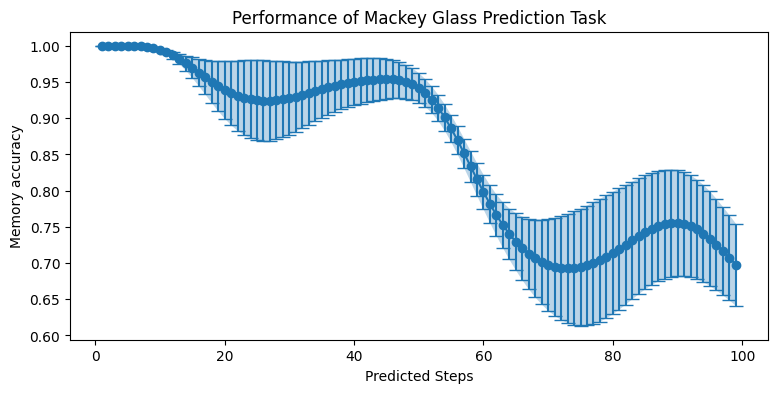

In [14]:
#Plot results
plt.figure(figsize=(9, 4))
x_data = prediction_steps
y_data = ma_list

mean = np.mean(y_data, axis=0)
std = np.std(y_data, axis=0)
plt.fill_between(x_data, mean - std, mean + std, alpha=0.3)
plt.errorbar(x_data, mean, yerr=std, fmt='o', linestyle='-', capsize=5)
plt.title('Performance of Mackey Glass Prediction Task')
plt.xlabel('Predicted Steps')
plt.ylabel('Memory accuracy')